In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

Using TensorFlow backend.


# Importando dados

In [4]:
circular_database = pd.read_csv('./data/processed/circular_database.csv', index_col='Unnamed: 0')
circular_database['avg_temperature'] = circular_database[['max_temperature','min_temperature']].mean(axis=1)
circular_database['delta_temperature'] = circular_database['max_temperature'] - circular_database['min_temperature']
circular_database.drop(columns=['max_temperature','min_temperature'], inplace=True)
circular_database.sample(5)

,week,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,...,month_8,month_9,month_10,month_11,month_12,precipitation,8012,8022,avg_temperature,delta_temperature
2017-06-23,25,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.0,5005.0,4177.0,18.45,8.7
2014-06-30,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,3661.0,2941.0,17.05,9.9
2014-07-30,31,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.0,2882.0,2752.0,17.50,10.6
2017-01-09,2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,11.0,2531.0,2161.0,25.65,9.5
2016-11-11,45,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0.0,4615.0,3776.0,25.50,14.2


# Regressor linear

Coefficients: 
                              0
week                 48.236617
weekday_0          1368.990933
weekday_1          1665.492891
weekday_2          1710.412274
weekday_3          1557.098184
weekday_4           887.216280
weekday_5         -2981.881572
weekday_6         -4207.328989
month_1            -611.708191
month_2             869.635802
month_3            1564.217732
month_4             867.876072
month_5            1036.799323
month_6             213.825200
month_7           -1305.579365
month_8             515.438279
month_9              16.280406
month_10           -189.617193
month_11           -667.905021
month_12          -2309.263044
precipitation        -1.923358
avg_temperature     -23.384219
delta_temperature    17.692013 

Mean squared error:	3139517.86
RMS:	1771.87
Variance score:	0.65


Text(0, 0.5, 'Eq')

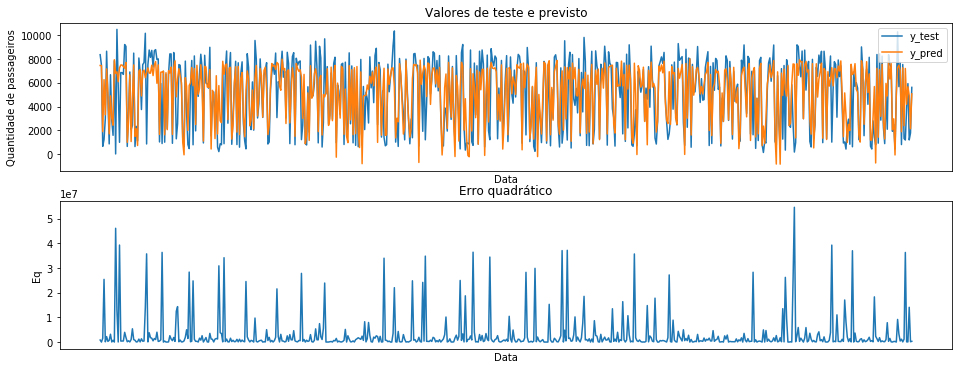

In [5]:
X = circular_database.drop(columns=['8012','8022'])
y = circular_database[['8012','8022']].sum(axis=1)
#create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

##Results
# The coefficients
print('Coefficients: \n', pd.DataFrame(regr.coef_, index=X.columns), '\n')
# The mean squared error
print("Mean squared error:\t%.2f" % mean_squared_error(y_test, y_pred))
# RMS
print("RMS:\t%.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score (1 is perfect prediction)
print('Variance score:\t%.2f' % r2_score(y_test, y_pred))
# Plot outputs
df = pd.DataFrame(index=y_test.index, columns=['y_test', 'y_pred'])
df['y_test'] = y_test
df['y_pred'] = y_pred
df.sort_index()

plt.figure(figsize=(16,6))

ax0 = plt.subplot(211)
plt.title('Valores de teste e previsto')
plt.plot(df.index, df['y_test'], df.index, df['y_pred'])
plt.xticks(())
plt.xlabel('Data')
plt.ylabel('Quantidade de passageiros')
plt.legend(['y_test', 'y_pred'])

plt.subplot(212, sharex=ax0)
plt.title('Erro quadrático')
plt.plot(df.index, np.square(df['y_test']-df['y_pred']))
plt.xticks(())
plt.xlabel('Data')
plt.ylabel('Eq')

# Definindo primeira rede neural

Train on 1701 samples, validate on 189 samples
Epoch 1/10000
1701/1701 [==============================] - 2s 972us/step - loss: 35921178.7031 - mean_squared_error: 35921178.7031 - mean_absolute_percentage_error: 99.9397 - val_loss: 32941556.6349 - val_mean_squared_error: 32941556.6349 - val_mean_absolute_percentage_error: 99.9133
Epoch 2/10000
1701/1701 [==============================] - 0s 70us/step - loss: 35909520.7290 - mean_squared_error: 35909520.7290 - mean_absolute_percentage_error: 99.8642 - val_loss: 32934485.1111 - val_mean_squared_error: 32934485.1111 - val_mean_absolute_percentage_error: 99.8784
Epoch 3/10000
1701/1701 [==============================] - 0s 65us/step - loss: 35903600.0047 - mean_squared_error: 35903600.0047 - mean_absolute_percentage_error: 99.8220 - val_loss: 32929605.7143 - val_mean_squared_error: 32929605.7143 - val_mean_absolute_percentage_error: 99.8547
Epoch 4/10000
1701/1701 [==============================] - 0s 62us/step - loss: 35898846.1799 - mean

Epoch 30/10000
1701/1701 [==============================] - 0s 60us/step - loss: 35807732.1293 - mean_squared_error: 35807732.1293 - mean_absolute_percentage_error: 99.4246 - val_loss: 32839855.6190 - val_mean_squared_error: 32839855.6190 - val_mean_absolute_percentage_error: 99.4266
Epoch 31/10000
1701/1701 [==============================] - 0s 78us/step - loss: 35804364.1364 - mean_squared_error: 35804364.1364 - mean_absolute_percentage_error: 99.4146 - val_loss: 32836657.8836 - val_mean_squared_error: 32836657.8836 - val_mean_absolute_percentage_error: 99.4114
Epoch 32/10000
1701/1701 [==============================] - 0s 79us/step - loss: 35800998.2293 - mean_squared_error: 35800998.2293 - mean_absolute_percentage_error: 99.4014 - val_loss: 32833495.4392 - val_mean_squared_error: 32833495.4392 - val_mean_absolute_percentage_error: 99.3963
Epoch 33/10000
1701/1701 [==============================] - 0s 76us/step - loss: 35797626.7678 - mean_squared_error: 35797626.7678 - mean_absolut

Epoch 59/10000
1701/1701 [==============================] - 0s 58us/step - loss: 35711022.1517 - mean_squared_error: 35711022.1517 - mean_absolute_percentage_error: 99.1256 - val_loss: 32748485.7460 - val_mean_squared_error: 32748485.7460 - val_mean_absolute_percentage_error: 98.9904
Epoch 60/10000
1701/1701 [==============================] - 0s 55us/step - loss: 35707692.1611 - mean_squared_error: 35707692.1611 - mean_absolute_percentage_error: 99.1161 - val_loss: 32745374.3810 - val_mean_squared_error: 32745374.3810 - val_mean_absolute_percentage_error: 98.9755
Epoch 61/10000
1701/1701 [==============================] - 0s 54us/step - loss: 35704387.9342 - mean_squared_error: 35704387.9342 - mean_absolute_percentage_error: 99.1053 - val_loss: 32742242.7407 - val_mean_squared_error: 32742242.7407 - val_mean_absolute_percentage_error: 98.9605
Epoch 62/10000
1701/1701 [==============================] - 0s 60us/step - loss: 35701079.2499 - mean_squared_error: 35701079.2499 - mean_absolut

Epoch 88/10000
1701/1701 [==============================] - 0s 61us/step - loss: 35614846.3539 - mean_squared_error: 35614846.3539 - mean_absolute_percentage_error: 98.8472 - val_loss: 32657635.1429 - val_mean_squared_error: 32657635.1429 - val_mean_absolute_percentage_error: 98.5558
Epoch 89/10000
1701/1701 [==============================] - 0s 57us/step - loss: 35611509.6508 - mean_squared_error: 35611509.6508 - mean_absolute_percentage_error: 98.8362 - val_loss: 32654515.4392 - val_mean_squared_error: 32654515.4392 - val_mean_absolute_percentage_error: 98.5408
Epoch 90/10000
1701/1701 [==============================] - 0s 54us/step - loss: 35608198.4409 - mean_squared_error: 35608198.4409 - mean_absolute_percentage_error: 98.8302 - val_loss: 32651385.3651 - val_mean_squared_error: 32651385.3651 - val_mean_absolute_percentage_error: 98.5259
Epoch 91/10000
1701/1701 [==============================] - 0s 60us/step - loss: 35604878.7972 - mean_squared_error: 35604878.7972 - mean_absolut

Epoch 117/10000
1701/1701 [==============================] - 0s 60us/step - loss: 35519012.8019 - mean_squared_error: 35519012.8019 - mean_absolute_percentage_error: 98.5708 - val_loss: 32567145.6190 - val_mean_squared_error: 32567145.6190 - val_mean_absolute_percentage_error: 98.1221
Epoch 118/10000
1701/1701 [==============================] - 0s 54us/step - loss: 35515702.1235 - mean_squared_error: 35515702.1235 - mean_absolute_percentage_error: 98.5616 - val_loss: 32564015.9788 - val_mean_squared_error: 32564015.9788 - val_mean_absolute_percentage_error: 98.1071
Epoch 119/10000
1701/1701 [==============================] - 0s 53us/step - loss: 35512402.5279 - mean_squared_error: 35512402.5279 - mean_absolute_percentage_error: 98.5503 - val_loss: 32560924.3069 - val_mean_squared_error: 32560924.3069 - val_mean_absolute_percentage_error: 98.0922
Epoch 120/10000
1701/1701 [==============================] - 0s 61us/step - loss: 35509096.6608 - mean_squared_error: 35509096.6608 - mean_abs

Epoch 146/10000
1701/1701 [==============================] - 0s 59us/step - loss: 35423323.8965 - mean_squared_error: 35423323.8965 - mean_absolute_percentage_error: 98.2941 - val_loss: 32476780.4656 - val_mean_squared_error: 32476780.4656 - val_mean_absolute_percentage_error: 97.6882
Epoch 147/10000
1701/1701 [==============================] - 0s 56us/step - loss: 35420011.9153 - mean_squared_error: 35420011.9153 - mean_absolute_percentage_error: 98.2827 - val_loss: 32473644.1164 - val_mean_squared_error: 32473644.1164 - val_mean_absolute_percentage_error: 97.6731
Epoch 148/10000
1701/1701 [==============================] - 0s 55us/step - loss: 35416708.2493 - mean_squared_error: 35416708.2493 - mean_absolute_percentage_error: 98.2751 - val_loss: 32470516.7196 - val_mean_squared_error: 32470516.7196 - val_mean_absolute_percentage_error: 97.6580
Epoch 149/10000
1701/1701 [==============================] - 0s 53us/step - loss: 35413398.7866 - mean_squared_error: 35413398.7866 - mean_abs

Epoch 175/10000
1701/1701 [==============================] - 0s 57us/step - loss: 35327744.2504 - mean_squared_error: 35327744.2504 - mean_absolute_percentage_error: 98.0141 - val_loss: 32386505.2487 - val_mean_squared_error: 32386505.2487 - val_mean_absolute_percentage_error: 97.2538
Epoch 176/10000
1701/1701 [==============================] - 0s 59us/step - loss: 35324462.2551 - mean_squared_error: 35324462.2551 - mean_absolute_percentage_error: 98.0061 - val_loss: 32383418.5608 - val_mean_squared_error: 32383418.5608 - val_mean_absolute_percentage_error: 97.2390
Epoch 177/10000
1701/1701 [==============================] - 0s 54us/step - loss: 35321166.7866 - mean_squared_error: 35321166.7866 - mean_absolute_percentage_error: 97.9974 - val_loss: 32380306.5185 - val_mean_squared_error: 32380306.5185 - val_mean_absolute_percentage_error: 97.2240
Epoch 178/10000
1701/1701 [==============================] - 0s 62us/step - loss: 35317866.7255 - mean_squared_error: 35317866.7255 - mean_abs

Epoch 204/10000
1701/1701 [==============================] - 0s 57us/step - loss: 35232551.4051 - mean_squared_error: 35232551.4051 - mean_absolute_percentage_error: 97.7374 - val_loss: 32296631.5132 - val_mean_squared_error: 32296631.5132 - val_mean_absolute_percentage_error: 96.8206
Epoch 205/10000
1701/1701 [==============================] - 0s 60us/step - loss: 35229257.3545 - mean_squared_error: 35229257.3545 - mean_absolute_percentage_error: 97.7307 - val_loss: 32293522.8254 - val_mean_squared_error: 32293522.8254 - val_mean_absolute_percentage_error: 96.8056
Epoch 206/10000
1701/1701 [==============================] - 0s 54us/step - loss: 35225952.9030 - mean_squared_error: 35225952.9030 - mean_absolute_percentage_error: 97.7187 - val_loss: 32290417.0582 - val_mean_squared_error: 32290417.0582 - val_mean_absolute_percentage_error: 96.7906
Epoch 207/10000
1701/1701 [==============================] - 0s 54us/step - loss: 35222653.3733 - mean_squared_error: 35222653.3733 - mean_abs

Epoch 233/10000
1701/1701 [==============================] - 0s 55us/step - loss: 35137341.4062 - mean_squared_error: 35137341.4062 - mean_absolute_percentage_error: 97.4700 - val_loss: 32206754.2963 - val_mean_squared_error: 32206754.2963 - val_mean_absolute_percentage_error: 96.3865
Epoch 234/10000
1701/1701 [==============================] - 0s 55us/step - loss: 35134067.8142 - mean_squared_error: 35134067.8142 - mean_absolute_percentage_error: 97.4604 - val_loss: 32203642.2540 - val_mean_squared_error: 32203642.2540 - val_mean_absolute_percentage_error: 96.3714
Epoch 235/10000
1701/1701 [==============================] - 0s 56us/step - loss: 35130784.5444 - mean_squared_error: 35130784.5444 - mean_absolute_percentage_error: 97.4538 - val_loss: 32200559.1958 - val_mean_squared_error: 32200559.1958 - val_mean_absolute_percentage_error: 96.3565
Epoch 236/10000
1701/1701 [==============================] - 0s 58us/step - loss: 35127519.2710 - mean_squared_error: 35127519.2710 - mean_abs

Epoch 262/10000
1701/1701 [==============================] - 0s 56us/step - loss: 35042411.7366 - mean_squared_error: 35042411.7366 - mean_absolute_percentage_error: 97.2179 - val_loss: 32117129.4815 - val_mean_squared_error: 32117129.4815 - val_mean_absolute_percentage_error: 95.9527
Epoch 263/10000
1701/1701 [==============================] - 0s 58us/step - loss: 35039137.4627 - mean_squared_error: 35039137.4627 - mean_absolute_percentage_error: 97.2096 - val_loss: 32114019.1005 - val_mean_squared_error: 32114019.1005 - val_mean_absolute_percentage_error: 95.9377
Epoch 264/10000
1701/1701 [==============================] - 0s 58us/step - loss: 35035857.2769 - mean_squared_error: 35035857.2769 - mean_absolute_percentage_error: 97.2018 - val_loss: 32110953.7672 - val_mean_squared_error: 32110953.7672 - val_mean_absolute_percentage_error: 95.9228
Epoch 265/10000
1701/1701 [==============================] - 0s 56us/step - loss: 35032576.1811 - mean_squared_error: 35032576.1811 - mean_abs

Epoch 291/10000
1701/1701 [==============================] - 0s 60us/step - loss: 34947626.5467 - mean_squared_error: 34947626.5467 - mean_absolute_percentage_error: 96.9714 - val_loss: 32027671.3439 - val_mean_squared_error: 32027671.3439 - val_mean_absolute_percentage_error: 95.5190
Epoch 292/10000
1701/1701 [==============================] - 0s 59us/step - loss: 34944365.5473 - mean_squared_error: 34944365.5473 - mean_absolute_percentage_error: 96.9636 - val_loss: 32024603.6402 - val_mean_squared_error: 32024603.6402 - val_mean_absolute_percentage_error: 95.5041
Epoch 293/10000
1701/1701 [==============================] - 0s 53us/step - loss: 34941109.8554 - mean_squared_error: 34941109.8554 - mean_absolute_percentage_error: 96.9545 - val_loss: 32021511.9365 - val_mean_squared_error: 32021511.9365 - val_mean_absolute_percentage_error: 95.4891
Epoch 294/10000
1701/1701 [==============================] - 0s 61us/step - loss: 34937824.4186 - mean_squared_error: 34937824.4186 - mean_abs

Epoch 320/10000
1701/1701 [==============================] - 0s 62us/step - loss: 34853057.4474 - mean_squared_error: 34853057.4474 - mean_absolute_percentage_error: 96.7321 - val_loss: 31938431.2063 - val_mean_squared_error: 31938431.2063 - val_mean_absolute_percentage_error: 95.0854
Epoch 321/10000
1701/1701 [==============================] - 0s 53us/step - loss: 34849807.0805 - mean_squared_error: 34849807.0805 - mean_absolute_percentage_error: 96.7245 - val_loss: 31935322.8254 - val_mean_squared_error: 31935322.8254 - val_mean_absolute_percentage_error: 95.0703
Epoch 322/10000
1701/1701 [==============================] - 0s 58us/step - loss: 34846530.7454 - mean_squared_error: 34846530.7454 - mean_absolute_percentage_error: 96.7154 - val_loss: 31932259.1217 - val_mean_squared_error: 31932259.1217 - val_mean_absolute_percentage_error: 95.0554
Epoch 323/10000
1701/1701 [==============================] - 0s 55us/step - loss: 34843274.4221 - mean_squared_error: 34843274.4221 - mean_abs

Epoch 349/10000
1701/1701 [==============================] - 0s 57us/step - loss: 34758592.3304 - mean_squared_error: 34758592.3304 - mean_absolute_percentage_error: 96.4944 - val_loss: 31849262.6984 - val_mean_squared_error: 31849262.6984 - val_mean_absolute_percentage_error: 94.6514
Epoch 350/10000
1701/1701 [==============================] - 0s 59us/step - loss: 34755348.6114 - mean_squared_error: 34755348.6114 - mean_absolute_percentage_error: 96.4870 - val_loss: 31846209.6720 - val_mean_squared_error: 31846209.6720 - val_mean_absolute_percentage_error: 94.6365
Epoch 351/10000
1701/1701 [==============================] - 0s 55us/step - loss: 34752099.4733 - mean_squared_error: 34752099.4733 - mean_absolute_percentage_error: 96.4786 - val_loss: 31843143.3228 - val_mean_squared_error: 31843143.3228 - val_mean_absolute_percentage_error: 94.6216
Epoch 352/10000
1701/1701 [==============================] - 0s 63us/step - loss: 34748848.7031 - mean_squared_error: 34748848.7031 - mean_abs

Epoch 378/10000
1701/1701 [==============================] - 0s 56us/step - loss: 34664332.4174 - mean_squared_error: 34664332.4174 - mean_absolute_percentage_error: 96.2581 - val_loss: 31760308.5291 - val_mean_squared_error: 31760308.5291 - val_mean_absolute_percentage_error: 94.2176
Epoch 379/10000
1701/1701 [==============================] - 0s 58us/step - loss: 34661091.1770 - mean_squared_error: 34661091.1770 - mean_absolute_percentage_error: 96.2506 - val_loss: 31757273.1640 - val_mean_squared_error: 31757273.1640 - val_mean_absolute_percentage_error: 94.2027
Epoch 380/10000
1701/1701 [==============================] - 0s 52us/step - loss: 34657837.0394 - mean_squared_error: 34657837.0394 - mean_absolute_percentage_error: 96.2452 - val_loss: 31754181.7989 - val_mean_squared_error: 31754181.7989 - val_mean_absolute_percentage_error: 94.1876
Epoch 381/10000
1701/1701 [==============================] - 0s 58us/step - loss: 34654581.6720 - mean_squared_error: 34654581.6720 - mean_abs

Epoch 407/10000
1701/1701 [==============================] - 0s 56us/step - loss: 34570227.8613 - mean_squared_error: 34570227.8613 - mean_absolute_percentage_error: 96.0269 - val_loss: 31671523.3439 - val_mean_squared_error: 31671523.3439 - val_mean_absolute_percentage_error: 93.7837
Epoch 408/10000
1701/1701 [==============================] - 0s 54us/step - loss: 34566967.4709 - mean_squared_error: 34566967.4709 - mean_absolute_percentage_error: 96.0186 - val_loss: 31668469.6402 - val_mean_squared_error: 31668469.6402 - val_mean_absolute_percentage_error: 93.7688
Epoch 409/10000
1701/1701 [==============================] - 0s 57us/step - loss: 34563730.9865 - mean_squared_error: 34563730.9865 - mean_absolute_percentage_error: 96.0126 - val_loss: 31665416.2751 - val_mean_squared_error: 31665416.2751 - val_mean_absolute_percentage_error: 93.7538
Epoch 410/10000
1701/1701 [==============================] - 0s 59us/step - loss: 34560487.4803 - mean_squared_error: 34560487.4803 - mean_abs

Epoch 436/10000
1701/1701 [==============================] - 0s 65us/step - loss: 34476369.5591 - mean_squared_error: 34476369.5591 - mean_absolute_percentage_error: 95.8094 - val_loss: 31582973.2063 - val_mean_squared_error: 31582973.2063 - val_mean_absolute_percentage_error: 93.3501
Epoch 437/10000
1701/1701 [==============================] - 0s 55us/step - loss: 34473138.1046 - mean_squared_error: 34473138.1046 - mean_absolute_percentage_error: 95.8016 - val_loss: 31579957.5661 - val_mean_squared_error: 31579957.5661 - val_mean_absolute_percentage_error: 93.3353
Epoch 438/10000
1701/1701 [==============================] - 0s 55us/step - loss: 34469909.1052 - mean_squared_error: 34469909.1052 - mean_absolute_percentage_error: 95.7940 - val_loss: 31576906.8466 - val_mean_squared_error: 31576906.8466 - val_mean_absolute_percentage_error: 93.3204
Epoch 439/10000
1701/1701 [==============================] - 0s 60us/step - loss: 34466676.7525 - mean_squared_error: 34466676.7525 - mean_abs

Epoch 465/10000
1701/1701 [==============================] - 0s 59us/step - loss: 34382655.2722 - mean_squared_error: 34382655.2722 - mean_absolute_percentage_error: 95.5883 - val_loss: 31494571.7460 - val_mean_squared_error: 31494571.7460 - val_mean_absolute_percentage_error: 92.9164
Epoch 466/10000
1701/1701 [==============================] - 0s 57us/step - loss: 34379432.4092 - mean_squared_error: 34379432.4092 - mean_absolute_percentage_error: 95.5794 - val_loss: 31491554.0741 - val_mean_squared_error: 31491554.0741 - val_mean_absolute_percentage_error: 92.9016
Epoch 467/10000
1701/1701 [==============================] - 0s 59us/step - loss: 34376193.9424 - mean_squared_error: 34376193.9424 - mean_absolute_percentage_error: 95.5731 - val_loss: 31488506.3704 - val_mean_squared_error: 31488506.3704 - val_mean_absolute_percentage_error: 92.8866
Epoch 468/10000
1701/1701 [==============================] - 0s 57us/step - loss: 34372947.0335 - mean_squared_error: 34372947.0335 - mean_abs

Epoch 494/10000
1701/1701 [==============================] - 0s 59us/step - loss: 34289085.0676 - mean_squared_error: 34289085.0676 - mean_absolute_percentage_error: 95.3667 - val_loss: 31406347.3016 - val_mean_squared_error: 31406347.3016 - val_mean_absolute_percentage_error: 92.4827
Epoch 495/10000
1701/1701 [==============================] - 0s 55us/step - loss: 34285841.8036 - mean_squared_error: 34285841.8036 - mean_absolute_percentage_error: 95.3588 - val_loss: 31403278.2116 - val_mean_squared_error: 31403278.2116 - val_mean_absolute_percentage_error: 92.4676
Epoch 496/10000
1701/1701 [==============================] - 0s 55us/step - loss: 34282623.5861 - mean_squared_error: 34282623.5861 - mean_absolute_percentage_error: 95.3523 - val_loss: 31400218.5079 - val_mean_squared_error: 31400218.5079 - val_mean_absolute_percentage_error: 92.4526
Epoch 497/10000
1701/1701 [==============================] - 0s 60us/step - loss: 34279379.1975 - mean_squared_error: 34279379.1975 - mean_abs

Epoch 523/10000
1701/1701 [==============================] - 0s 61us/step - loss: 34195676.9547 - mean_squared_error: 34195676.9547 - mean_absolute_percentage_error: 95.1529 - val_loss: 31318239.7778 - val_mean_squared_error: 31318239.7778 - val_mean_absolute_percentage_error: 92.0488
Epoch 524/10000
1701/1701 [==============================] - 0s 58us/step - loss: 34192458.6008 - mean_squared_error: 34192458.6008 - mean_absolute_percentage_error: 95.1474 - val_loss: 31315206.7196 - val_mean_squared_error: 31315206.7196 - val_mean_absolute_percentage_error: 92.0338
Epoch 525/10000
1701/1701 [==============================] - 0s 55us/step - loss: 34189233.3616 - mean_squared_error: 34189233.3616 - mean_absolute_percentage_error: 95.1386 - val_loss: 31312164.0000 - val_mean_squared_error: 31312164.0000 - val_mean_absolute_percentage_error: 92.0188
Epoch 526/10000
1701/1701 [==============================] - 0s 60us/step - loss: 34186015.0617 - mean_squared_error: 34186015.0617 - mean_abs

Epoch 552/10000
1701/1701 [==============================] - 0s 55us/step - loss: 34102366.4550 - mean_squared_error: 34102366.4550 - mean_absolute_percentage_error: 94.9401 - val_loss: 31230268.2222 - val_mean_squared_error: 31230268.2222 - val_mean_absolute_percentage_error: 91.6146
Epoch 553/10000
1701/1701 [==============================] - 0s 58us/step - loss: 34099159.5838 - mean_squared_error: 34099159.5838 - mean_absolute_percentage_error: 94.9329 - val_loss: 31227223.5661 - val_mean_squared_error: 31227223.5661 - val_mean_absolute_percentage_error: 91.5996
Epoch 554/10000
1701/1701 [==============================] - 0s 56us/step - loss: 34095939.5168 - mean_squared_error: 34095939.5168 - mean_absolute_percentage_error: 94.9248 - val_loss: 31224199.1852 - val_mean_squared_error: 31224199.1852 - val_mean_absolute_percentage_error: 91.5846
Epoch 555/10000
1701/1701 [==============================] - 0s 55us/step - loss: 34092735.7575 - mean_squared_error: 34092735.7575 - mean_abs

Epoch 581/10000
1701/1701 [==============================] - 0s 60us/step - loss: 34009366.7160 - mean_squared_error: 34009366.7160 - mean_absolute_percentage_error: 94.7260 - val_loss: 31142574.0847 - val_mean_squared_error: 31142574.0847 - val_mean_absolute_percentage_error: 91.1810
Epoch 582/10000
1701/1701 [==============================] - 0s 59us/step - loss: 34006154.9700 - mean_squared_error: 34006154.9700 - mean_absolute_percentage_error: 94.7195 - val_loss: 31139551.0582 - val_mean_squared_error: 31139551.0582 - val_mean_absolute_percentage_error: 91.1660
Epoch 583/10000
1701/1701 [==============================] - 0s 56us/step - loss: 34002953.9118 - mean_squared_error: 34002953.9118 - mean_absolute_percentage_error: 94.7134 - val_loss: 31136534.0635 - val_mean_squared_error: 31136534.0635 - val_mean_absolute_percentage_error: 91.1511
Epoch 584/10000
1701/1701 [==============================] - 0s 53us/step - loss: 33999754.6079 - mean_squared_error: 33999754.6079 - mean_abs

Epoch 610/10000
1701/1701 [==============================] - 0s 78us/step - loss: 33916577.6167 - mean_squared_error: 33916577.6167 - mean_absolute_percentage_error: 94.5140 - val_loss: 31055104.6561 - val_mean_squared_error: 31055104.6561 - val_mean_absolute_percentage_error: 90.7476
Epoch 611/10000
1701/1701 [==============================] - 0s 62us/step - loss: 33913378.5714 - mean_squared_error: 33913378.5714 - mean_absolute_percentage_error: 94.5079 - val_loss: 31052083.5979 - val_mean_squared_error: 31052083.5979 - val_mean_absolute_percentage_error: 90.7326
Epoch 612/10000
1701/1701 [==============================] - 0s 54us/step - loss: 33910188.1905 - mean_squared_error: 33910188.1905 - mean_absolute_percentage_error: 94.4976 - val_loss: 31049066.6032 - val_mean_squared_error: 31049066.6032 - val_mean_absolute_percentage_error: 90.7177
Epoch 613/10000
1701/1701 [==============================] - 0s 60us/step - loss: 33907006.0435 - mean_squared_error: 33907006.0435 - mean_abs

Epoch 639/10000
1701/1701 [==============================] - 0s 60us/step - loss: 33823872.6208 - mean_squared_error: 33823872.6208 - mean_absolute_percentage_error: 94.3032 - val_loss: 30967695.8095 - val_mean_squared_error: 30967695.8095 - val_mean_absolute_percentage_error: 90.3137
Epoch 640/10000
1701/1701 [==============================] - 0s 59us/step - loss: 33820654.4362 - mean_squared_error: 33820654.4362 - mean_absolute_percentage_error: 94.2966 - val_loss: 30964673.0899 - val_mean_squared_error: 30964673.0899 - val_mean_absolute_percentage_error: 90.2986
Epoch 641/10000
1701/1701 [==============================] - 0s 54us/step - loss: 33817468.6396 - mean_squared_error: 33817468.6396 - mean_absolute_percentage_error: 94.2888 - val_loss: 30961655.4180 - val_mean_squared_error: 30961655.4180 - val_mean_absolute_percentage_error: 90.2836
Epoch 642/10000
1701/1701 [==============================] - 0s 58us/step - loss: 33814287.9483 - mean_squared_error: 33814287.9483 - mean_abs

Epoch 668/10000
1701/1701 [==============================] - 0s 58us/step - loss: 33731396.4609 - mean_squared_error: 33731396.4609 - mean_absolute_percentage_error: 94.0946 - val_loss: 30880542.0423 - val_mean_squared_error: 30880542.0423 - val_mean_absolute_percentage_error: 89.8801
Epoch 669/10000
1701/1701 [==============================] - 0s 57us/step - loss: 33728201.4685 - mean_squared_error: 33728201.4685 - mean_absolute_percentage_error: 94.0864 - val_loss: 30877553.3545 - val_mean_squared_error: 30877553.3545 - val_mean_absolute_percentage_error: 89.8652
Epoch 670/10000
1701/1701 [==============================] - 0s 60us/step - loss: 33725040.5291 - mean_squared_error: 33725040.5291 - mean_absolute_percentage_error: 94.0800 - val_loss: 30874544.9735 - val_mean_squared_error: 30874544.9735 - val_mean_absolute_percentage_error: 89.8502
Epoch 671/10000
1701/1701 [==============================] - 0s 60us/step - loss: 33721855.6008 - mean_squared_error: 33721855.6008 - mean_abs

Epoch 697/10000
1701/1701 [==============================] - 0s 57us/step - loss: 33639121.9941 - mean_squared_error: 33639121.9941 - mean_absolute_percentage_error: 93.8855 - val_loss: 30793577.9048 - val_mean_squared_error: 30793577.9048 - val_mean_absolute_percentage_error: 89.4466
Epoch 698/10000
1701/1701 [==============================] - 0s 55us/step - loss: 33635935.4180 - mean_squared_error: 33635935.4180 - mean_absolute_percentage_error: 93.8786 - val_loss: 30790590.5714 - val_mean_squared_error: 30790590.5714 - val_mean_absolute_percentage_error: 89.4317
Epoch 699/10000
1701/1701 [==============================] - 0s 58us/step - loss: 33632760.3269 - mean_squared_error: 33632760.3269 - mean_absolute_percentage_error: 93.8741 - val_loss: 30787590.1905 - val_mean_squared_error: 30787590.1905 - val_mean_absolute_percentage_error: 89.4167
Epoch 700/10000
1701/1701 [==============================] - 0s 58us/step - loss: 33629563.9575 - mean_squared_error: 33629563.9575 - mean_abs

Epoch 726/10000
1701/1701 [==============================] - 0s 58us/step - loss: 33546918.1446 - mean_squared_error: 33546918.1446 - mean_absolute_percentage_error: 93.6823 - val_loss: 30706704.7196 - val_mean_squared_error: 30706704.7196 - val_mean_absolute_percentage_error: 89.0127
Epoch 727/10000
1701/1701 [==============================] - 0s 54us/step - loss: 33543738.0223 - mean_squared_error: 33543738.0223 - mean_absolute_percentage_error: 93.6765 - val_loss: 30703718.7090 - val_mean_squared_error: 30703718.7090 - val_mean_absolute_percentage_error: 88.9978
Epoch 728/10000
1701/1701 [==============================] - 0s 55us/step - loss: 33540568.9665 - mean_squared_error: 33540568.9665 - mean_absolute_percentage_error: 93.6680 - val_loss: 30700707.6508 - val_mean_squared_error: 30700707.6508 - val_mean_absolute_percentage_error: 88.9828
Epoch 729/10000
1701/1701 [==============================] - 0s 58us/step - loss: 33537384.6608 - mean_squared_error: 33537384.6608 - mean_abs

Epoch 755/10000
1701/1701 [==============================] - 0s 54us/step - loss: 33454960.0941 - mean_squared_error: 33454960.0941 - mean_absolute_percentage_error: 93.4793 - val_loss: 30620055.2910 - val_mean_squared_error: 30620055.2910 - val_mean_absolute_percentage_error: 88.5791
Epoch 756/10000
1701/1701 [==============================] - 0s 54us/step - loss: 33451786.7842 - mean_squared_error: 33451786.7842 - mean_absolute_percentage_error: 93.4746 - val_loss: 30617066.6032 - val_mean_squared_error: 30617066.6032 - val_mean_absolute_percentage_error: 88.5641
Epoch 757/10000
1701/1701 [==============================] - 0s 58us/step - loss: 33448602.8642 - mean_squared_error: 33448602.8642 - mean_absolute_percentage_error: 93.4658 - val_loss: 30614055.5450 - val_mean_squared_error: 30614055.5450 - val_mean_absolute_percentage_error: 88.5491
Epoch 758/10000
1701/1701 [==============================] - 0s 57us/step - loss: 33445410.2563 - mean_squared_error: 33445410.2563 - mean_abs

Epoch 784/10000
1701/1701 [==============================] - 0s 61us/step - loss: 33363173.1370 - mean_squared_error: 33363173.1370 - mean_absolute_percentage_error: 93.2759 - val_loss: 30533577.1217 - val_mean_squared_error: 30533577.1217 - val_mean_absolute_percentage_error: 88.1455
Epoch 785/10000
1701/1701 [==============================] - 0s 57us/step - loss: 33360019.9436 - mean_squared_error: 33360019.9436 - mean_absolute_percentage_error: 93.2698 - val_loss: 30530609.7566 - val_mean_squared_error: 30530609.7566 - val_mean_absolute_percentage_error: 88.1306
Epoch 786/10000
1701/1701 [==============================] - 0s 56us/step - loss: 33356863.6531 - mean_squared_error: 33356863.6531 - mean_absolute_percentage_error: 93.2659 - val_loss: 30527639.4392 - val_mean_squared_error: 30527639.4392 - val_mean_absolute_percentage_error: 88.1157
Epoch 787/10000
1701/1701 [==============================] - 0s 54us/step - loss: 33353712.5644 - mean_squared_error: 33353712.5644 - mean_abs

Epoch 813/10000
1701/1701 [==============================] - 0s 58us/step - loss: 33271540.2986 - mean_squared_error: 33271540.2986 - mean_absolute_percentage_error: 93.0748 - val_loss: 30447263.3545 - val_mean_squared_error: 30447263.3545 - val_mean_absolute_percentage_error: 87.7118
Epoch 814/10000
1701/1701 [==============================] - 0s 56us/step - loss: 33268378.6373 - mean_squared_error: 33268378.6373 - mean_absolute_percentage_error: 93.0680 - val_loss: 30444296.3598 - val_mean_squared_error: 30444296.3598 - val_mean_absolute_percentage_error: 87.6969
Epoch 815/10000
1701/1701 [==============================] - 0s 54us/step - loss: 33265227.0159 - mean_squared_error: 33265227.0159 - mean_absolute_percentage_error: 93.0605 - val_loss: 30441344.3175 - val_mean_squared_error: 30441344.3175 - val_mean_absolute_percentage_error: 87.6820
Epoch 816/10000
1701/1701 [==============================] - 0s 59us/step - loss: 33262096.9500 - mean_squared_error: 33262096.9500 - mean_abs

Epoch 842/10000
1701/1701 [==============================] - 0s 62us/step - loss: 33180133.1805 - mean_squared_error: 33180133.1805 - mean_absolute_percentage_error: 92.8742 - val_loss: 30361175.5556 - val_mean_squared_error: 30361175.5556 - val_mean_absolute_percentage_error: 87.2783
Epoch 843/10000
1701/1701 [==============================] - 0s 56us/step - loss: 33176986.4303 - mean_squared_error: 33176986.4303 - mean_absolute_percentage_error: 92.8652 - val_loss: 30358214.5608 - val_mean_squared_error: 30358214.5608 - val_mean_absolute_percentage_error: 87.2634
Epoch 844/10000
1701/1701 [==============================] - 0s 59us/step - loss: 33173842.8195 - mean_squared_error: 33173842.8195 - mean_absolute_percentage_error: 92.8604 - val_loss: 30355246.8254 - val_mean_squared_error: 30355246.8254 - val_mean_absolute_percentage_error: 87.2484
Epoch 845/10000
1701/1701 [==============================] - 0s 58us/step - loss: 33170700.8348 - mean_squared_error: 33170700.8348 - mean_abs

Epoch 871/10000
1701/1701 [==============================] - 0s 69us/step - loss: 33088828.7807 - mean_squared_error: 33088828.7807 - mean_absolute_percentage_error: 92.6728 - val_loss: 30275177.0476 - val_mean_squared_error: 30275177.0476 - val_mean_absolute_percentage_error: 86.8445
Epoch 872/10000
1701/1701 [==============================] - 0s 61us/step - loss: 33085673.8765 - mean_squared_error: 33085673.8765 - mean_absolute_percentage_error: 92.6682 - val_loss: 30272236.3915 - val_mean_squared_error: 30272236.3915 - val_mean_absolute_percentage_error: 86.8296
Epoch 873/10000
1701/1701 [==============================] - 0s 59us/step - loss: 33082520.8748 - mean_squared_error: 33082520.8748 - mean_absolute_percentage_error: 92.6598 - val_loss: 30269242.9947 - val_mean_squared_error: 30269242.9947 - val_mean_absolute_percentage_error: 86.8145
Epoch 874/10000
1701/1701 [==============================] - 0s 58us/step - loss: 33079355.6167 - mean_squared_error: 33079355.6167 - mean_abs

Epoch 900/10000
1701/1701 [==============================] - 0s 58us/step - loss: 32997826.1376 - mean_squared_error: 32997826.1376 - mean_absolute_percentage_error: 92.4763 - val_loss: 30189490.3915 - val_mean_squared_error: 30189490.3915 - val_mean_absolute_percentage_error: 86.4381
Epoch 901/10000
1701/1701 [==============================] - 0s 60us/step - loss: 32994673.2851 - mean_squared_error: 32994673.2851 - mean_absolute_percentage_error: 92.4673 - val_loss: 30186504.9947 - val_mean_squared_error: 30186504.9947 - val_mean_absolute_percentage_error: 86.4242
Epoch 902/10000
1701/1701 [==============================] - 0s 55us/step - loss: 32991545.7831 - mean_squared_error: 32991545.7831 - mean_absolute_percentage_error: 92.4620 - val_loss: 30183595.3228 - val_mean_squared_error: 30183595.3228 - val_mean_absolute_percentage_error: 86.4107
Epoch 903/10000
1701/1701 [==============================] - 0s 57us/step - loss: 32988433.4274 - mean_squared_error: 32988433.4274 - mean_abs

Epoch 929/10000
1701/1701 [==============================] - 0s 56us/step - loss: 32906802.2457 - mean_squared_error: 32906802.2457 - mean_absolute_percentage_error: 92.2777 - val_loss: 30103789.1429 - val_mean_squared_error: 30103789.1429 - val_mean_absolute_percentage_error: 86.0513
Epoch 930/10000
1701/1701 [==============================] - 0s 55us/step - loss: 32903672.6820 - mean_squared_error: 32903672.6820 - mean_absolute_percentage_error: 92.2718 - val_loss: 30100843.1005 - val_mean_squared_error: 30100843.1005 - val_mean_absolute_percentage_error: 86.0387
Epoch 931/10000
1701/1701 [==============================] - 0s 57us/step - loss: 32900545.4086 - mean_squared_error: 32900545.4086 - mean_absolute_percentage_error: 92.2617 - val_loss: 30097896.7513 - val_mean_squared_error: 30097896.7513 - val_mean_absolute_percentage_error: 86.0261
Epoch 932/10000
1701/1701 [==============================] - 0s 58us/step - loss: 32897412.0094 - mean_squared_error: 32897412.0094 - mean_abs

Epoch 958/10000
1701/1701 [==============================] - 0s 56us/step - loss: 32816109.9106 - mean_squared_error: 32816109.9106 - mean_absolute_percentage_error: 92.0765 - val_loss: 30018414.7302 - val_mean_squared_error: 30018414.7302 - val_mean_absolute_percentage_error: 85.6857
Epoch 959/10000
1701/1701 [==============================] - 0s 58us/step - loss: 32812999.6214 - mean_squared_error: 32812999.6214 - mean_absolute_percentage_error: 92.0700 - val_loss: 30015486.3810 - val_mean_squared_error: 30015486.3810 - val_mean_absolute_percentage_error: 85.6731
Epoch 960/10000
1701/1701 [==============================] - 0s 60us/step - loss: 32809871.7043 - mean_squared_error: 32809871.7043 - mean_absolute_percentage_error: 92.0643 - val_loss: 30012519.3228 - val_mean_squared_error: 30012519.3228 - val_mean_absolute_percentage_error: 85.6604
Epoch 961/10000
1701/1701 [==============================] - 0s 56us/step - loss: 32806754.3374 - mean_squared_error: 32806754.3374 - mean_abs

Epoch 987/10000
1701/1701 [==============================] - 0s 53us/step - loss: 32725595.8330 - mean_squared_error: 32725595.8330 - mean_absolute_percentage_error: 91.8794 - val_loss: 29933215.9471 - val_mean_squared_error: 29933215.9471 - val_mean_absolute_percentage_error: 85.3200
Epoch 988/10000
1701/1701 [==============================] - 0s 60us/step - loss: 32722480.6690 - mean_squared_error: 32722480.6690 - mean_absolute_percentage_error: 91.8722 - val_loss: 29930271.9365 - val_mean_squared_error: 29930271.9365 - val_mean_absolute_percentage_error: 85.3074
Epoch 989/10000
1701/1701 [==============================] - 0s 56us/step - loss: 32719364.4891 - mean_squared_error: 32719364.4891 - mean_absolute_percentage_error: 91.8642 - val_loss: 29927317.5873 - val_mean_squared_error: 29927317.5873 - val_mean_absolute_percentage_error: 85.2947
Epoch 990/10000
1701/1701 [==============================] - 0s 54us/step - loss: 32716247.2287 - mean_squared_error: 32716247.2287 - mean_abs

Epoch 1016/10000
1701/1701 [==============================] - 0s 57us/step - loss: 32635121.9306 - mean_squared_error: 32635121.9306 - mean_absolute_percentage_error: 91.6826 - val_loss: 29848081.5026 - val_mean_squared_error: 29848081.5026 - val_mean_absolute_percentage_error: 84.9621
Epoch 1017/10000
1701/1701 [==============================] - 0s 57us/step - loss: 32632023.3933 - mean_squared_error: 32632023.3933 - mean_absolute_percentage_error: 91.6742 - val_loss: 29845127.4603 - val_mean_squared_error: 29845127.4603 - val_mean_absolute_percentage_error: 84.9504
Epoch 1018/10000
1701/1701 [==============================] - 0s 56us/step - loss: 32628907.3768 - mean_squared_error: 32628907.3768 - mean_absolute_percentage_error: 91.6663 - val_loss: 29842187.0794 - val_mean_squared_error: 29842187.0794 - val_mean_absolute_percentage_error: 84.9388
Epoch 1019/10000
1701/1701 [==============================] - 0s 57us/step - loss: 32625791.5109 - mean_squared_error: 32625791.5109 - mean

1701/1701 [==============================] - 0s 57us/step - loss: 32548043.1652 - mean_squared_error: 32548043.1652 - mean_absolute_percentage_error: 91.4931 - val_loss: 29766108.7302 - val_mean_squared_error: 29766108.7302 - val_mean_absolute_percentage_error: 84.6380
Epoch 1045/10000
1701/1701 [==============================] - 0s 56us/step - loss: 32544944.0541 - mean_squared_error: 32544944.0541 - mean_absolute_percentage_error: 91.4856 - val_loss: 29763172.0106 - val_mean_squared_error: 29763172.0106 - val_mean_absolute_percentage_error: 84.6264
Epoch 1046/10000
1701/1701 [==============================] - 0s 54us/step - loss: 32541840.2957 - mean_squared_error: 32541840.2957 - mean_absolute_percentage_error: 91.4816 - val_loss: 29760276.6772 - val_mean_squared_error: 29760276.6772 - val_mean_absolute_percentage_error: 84.6149
Epoch 1047/10000
1701/1701 [==============================] - 0s 59us/step - loss: 32538756.7196 - mean_squared_error: 32538756.7196 - mean_absolute_percent

Epoch 1073/10000
1701/1701 [==============================] - 0s 55us/step - loss: 32458033.9389 - mean_squared_error: 32458033.9389 - mean_absolute_percentage_error: 91.3032 - val_loss: 29681417.3333 - val_mean_squared_error: 29681417.3333 - val_mean_absolute_percentage_error: 84.3025
Epoch 1074/10000
1701/1701 [==============================] - 0s 56us/step - loss: 32454936.3762 - mean_squared_error: 32454936.3762 - mean_absolute_percentage_error: 91.2933 - val_loss: 29678475.9048 - val_mean_squared_error: 29678475.9048 - val_mean_absolute_percentage_error: 84.2913
Epoch 1075/10000
1701/1701 [==============================] - 0s 58us/step - loss: 32451826.3445 - mean_squared_error: 32451826.3445 - mean_absolute_percentage_error: 91.2877 - val_loss: 29675554.5397 - val_mean_squared_error: 29675554.5397 - val_mean_absolute_percentage_error: 84.2807
Epoch 1076/10000
1701/1701 [==============================] - 0s 55us/step - loss: 32448729.3898 - mean_squared_error: 32448729.3898 - mean

1701/1701 [==============================] - 0s 71us/step - loss: 32371420.9982 - mean_squared_error: 32371420.9982 - mean_absolute_percentage_error: 91.1148 - val_loss: 29599922.0106 - val_mean_squared_error: 29599922.0106 - val_mean_absolute_percentage_error: 84.0058
Epoch 1102/10000
1701/1701 [==============================] - 0s 55us/step - loss: 32368335.7931 - mean_squared_error: 32368335.7931 - mean_absolute_percentage_error: 91.1085 - val_loss: 29596996.9524 - val_mean_squared_error: 29596996.9524 - val_mean_absolute_percentage_error: 83.9952
Epoch 1103/10000
1701/1701 [==============================] - 0s 61us/step - loss: 32365225.2005 - mean_squared_error: 32365225.2005 - mean_absolute_percentage_error: 91.1007 - val_loss: 29594103.9577 - val_mean_squared_error: 29594103.9577 - val_mean_absolute_percentage_error: 83.9847
Epoch 1104/10000
1701/1701 [==============================] - 0s 63us/step - loss: 32362145.6555 - mean_squared_error: 32362145.6555 - mean_absolute_percent

Epoch 1130/10000
1701/1701 [==============================] - 0s 61us/step - loss: 32281624.8217 - mean_squared_error: 32281624.8217 - mean_absolute_percentage_error: 90.9226 - val_loss: 29515436.4868 - val_mean_squared_error: 29515436.4868 - val_mean_absolute_percentage_error: 83.6982
Epoch 1131/10000
1701/1701 [==============================] - 0s 57us/step - loss: 32278568.4962 - mean_squared_error: 32278568.4962 - mean_absolute_percentage_error: 90.9149 - val_loss: 29512562.4127 - val_mean_squared_error: 29512562.4127 - val_mean_absolute_percentage_error: 83.6877
Epoch 1132/10000
1701/1701 [==============================] - 0s 60us/step - loss: 32275466.0059 - mean_squared_error: 32275466.0059 - mean_absolute_percentage_error: 90.9108 - val_loss: 29509640.7407 - val_mean_squared_error: 29509640.7407 - val_mean_absolute_percentage_error: 83.6770
Epoch 1133/10000
1701/1701 [==============================] - 0s 59us/step - loss: 32272376.4444 - mean_squared_error: 32272376.4444 - mean

1701/1701 [==============================] - 0s 75us/step - loss: 32195171.1299 - mean_squared_error: 32195171.1299 - mean_absolute_percentage_error: 90.7358 - val_loss: 29434121.3757 - val_mean_squared_error: 29434121.3757 - val_mean_absolute_percentage_error: 83.4014
Epoch 1159/10000
1701/1701 [==============================] - 0s 51us/step - loss: 32192096.2399 - mean_squared_error: 32192096.2399 - mean_absolute_percentage_error: 90.7312 - val_loss: 29431209.9788 - val_mean_squared_error: 29431209.9788 - val_mean_absolute_percentage_error: 83.3908
Epoch 1160/10000
1701/1701 [==============================] - 0s 60us/step - loss: 32189007.9765 - mean_squared_error: 32189007.9765 - mean_absolute_percentage_error: 90.7251 - val_loss: 29428315.3228 - val_mean_squared_error: 29428315.3228 - val_mean_absolute_percentage_error: 83.3802
Epoch 1161/10000
1701/1701 [==============================] - 0s 56us/step - loss: 32185921.4239 - mean_squared_error: 32185921.4239 - mean_absolute_percent

Epoch 1187/10000
1701/1701 [==============================] - 0s 64us/step - loss: 32105908.7090 - mean_squared_error: 32105908.7090 - mean_absolute_percentage_error: 90.5446 - val_loss: 29350146.2857 - val_mean_squared_error: 29350146.2857 - val_mean_absolute_percentage_error: 83.0944
Epoch 1188/10000
1701/1701 [==============================] - 0s 58us/step - loss: 32102843.5708 - mean_squared_error: 32102843.5708 - mean_absolute_percentage_error: 90.5401 - val_loss: 29347297.6296 - val_mean_squared_error: 29347297.6296 - val_mean_absolute_percentage_error: 83.0839
Epoch 1189/10000
1701/1701 [==============================] - 0s 55us/step - loss: 32099778.0129 - mean_squared_error: 32099778.0129 - mean_absolute_percentage_error: 90.5319 - val_loss: 29344378.6032 - val_mean_squared_error: 29344378.6032 - val_mean_absolute_percentage_error: 83.0733
Epoch 1190/10000
1701/1701 [==============================] - 0s 55us/step - loss: 32096692.8254 - mean_squared_error: 32096692.8254 - mean

1701/1701 [==============================] - 0s 71us/step - loss: 32019730.0829 - mean_squared_error: 32019730.0829 - mean_absolute_percentage_error: 90.3598 - val_loss: 29269117.2063 - val_mean_squared_error: 29269117.2063 - val_mean_absolute_percentage_error: 82.7975
Epoch 1216/10000
1701/1701 [==============================] - 0s 63us/step - loss: 32016680.3081 - mean_squared_error: 32016680.3081 - mean_absolute_percentage_error: 90.3554 - val_loss: 29266253.1640 - val_mean_squared_error: 29266253.1640 - val_mean_absolute_percentage_error: 82.7870
Epoch 1217/10000
1701/1701 [==============================] - 0s 57us/step - loss: 32013617.4615 - mean_squared_error: 32013617.4615 - mean_absolute_percentage_error: 90.3475 - val_loss: 29263357.4286 - val_mean_squared_error: 29263357.4286 - val_mean_absolute_percentage_error: 82.7764
Epoch 1218/10000
1701/1701 [==============================] - 0s 59us/step - loss: 32010560.3457 - mean_squared_error: 32010560.3457 - mean_absolute_percent

Epoch 1244/10000
1701/1701 [==============================] - 0s 60us/step - loss: 31930791.0523 - mean_squared_error: 31930791.0523 - mean_absolute_percentage_error: 90.1676 - val_loss: 29185505.8095 - val_mean_squared_error: 29185505.8095 - val_mean_absolute_percentage_error: 82.4905
Epoch 1245/10000
1701/1701 [==============================] - 0s 60us/step - loss: 31927736.0165 - mean_squared_error: 31927736.0165 - mean_absolute_percentage_error: 90.1607 - val_loss: 29182608.7831 - val_mean_squared_error: 29182608.7831 - val_mean_absolute_percentage_error: 82.4799
Epoch 1246/10000
1701/1701 [==============================] - 0s 54us/step - loss: 31924656.1246 - mean_squared_error: 31924656.1246 - mean_absolute_percentage_error: 90.1540 - val_loss: 29179730.7090 - val_mean_squared_error: 29179730.7090 - val_mean_absolute_percentage_error: 82.4693
Epoch 1247/10000
1701/1701 [==============================] - 0s 60us/step - loss: 31921592.9218 - mean_squared_error: 31921592.9218 - mean

1701/1701 [==============================] - 0s 55us/step - loss: 31844988.4797 - mean_squared_error: 31844988.4797 - mean_absolute_percentage_error: 89.9826 - val_loss: 29104823.0053 - val_mean_squared_error: 29104823.0053 - val_mean_absolute_percentage_error: 82.1937
Epoch 1273/10000
1701/1701 [==============================] - 0s 61us/step - loss: 31841915.4615 - mean_squared_error: 31841915.4615 - mean_absolute_percentage_error: 89.9768 - val_loss: 29101928.9630 - val_mean_squared_error: 29101928.9630 - val_mean_absolute_percentage_error: 82.1830
Epoch 1274/10000
1701/1701 [==============================] - 0s 53us/step - loss: 31838835.2169 - mean_squared_error: 31838835.2169 - mean_absolute_percentage_error: 89.9708 - val_loss: 29099030.9206 - val_mean_squared_error: 29099030.9206 - val_mean_absolute_percentage_error: 82.1724
Epoch 1275/10000
1701/1701 [==============================] - 0s 57us/step - loss: 31835785.3521 - mean_squared_error: 31835785.3521 - mean_absolute_percent

Epoch 1301/10000
1701/1701 [==============================] - 0s 63us/step - loss: 31756289.6767 - mean_squared_error: 31756289.6767 - mean_absolute_percentage_error: 89.8027 - val_loss: 29021429.1746 - val_mean_squared_error: 29021429.1746 - val_mean_absolute_percentage_error: 81.8863
Epoch 1302/10000
1701/1701 [==============================] - 0s 56us/step - loss: 31753229.8413 - mean_squared_error: 31753229.8413 - mean_absolute_percentage_error: 89.7996 - val_loss: 29018549.8413 - val_mean_squared_error: 29018549.8413 - val_mean_absolute_percentage_error: 81.8756
Epoch 1303/10000
1701/1701 [==============================] - 0s 59us/step - loss: 31750170.9089 - mean_squared_error: 31750170.9089 - mean_absolute_percentage_error: 89.7902 - val_loss: 29015676.4762 - val_mean_squared_error: 29015676.4762 - val_mean_absolute_percentage_error: 81.8650
Epoch 1304/10000
1701/1701 [==============================] - 0s 55us/step - loss: 31747126.1023 - mean_squared_error: 31747126.1023 - mean

1701/1701 [==============================] - 0s 70us/step - loss: 31670870.5679 - mean_squared_error: 31670870.5679 - mean_absolute_percentage_error: 89.6375 - val_loss: 28941139.7884 - val_mean_squared_error: 28941139.7884 - val_mean_absolute_percentage_error: 81.5897
Epoch 1330/10000
1701/1701 [==============================] - 0s 51us/step - loss: 31667836.3892 - mean_squared_error: 31667836.3892 - mean_absolute_percentage_error: 89.6318 - val_loss: 28938310.1164 - val_mean_squared_error: 28938310.1164 - val_mean_absolute_percentage_error: 81.5792
Epoch 1331/10000
1701/1701 [==============================] - 0s 57us/step - loss: 31664801.8789 - mean_squared_error: 31664801.8789 - mean_absolute_percentage_error: 89.6264 - val_loss: 28935450.1058 - val_mean_squared_error: 28935450.1058 - val_mean_absolute_percentage_error: 81.5686
Epoch 1332/10000
1701/1701 [==============================] - 0s 55us/step - loss: 31661736.1105 - mean_squared_error: 31661736.1105 - mean_absolute_percent

Epoch 1358/10000
1701/1701 [==============================] - 0s 56us/step - loss: 31582572.4491 - mean_squared_error: 31582572.4491 - mean_absolute_percentage_error: 89.4719 - val_loss: 28858167.4074 - val_mean_squared_error: 28858167.4074 - val_mean_absolute_percentage_error: 81.2825
Epoch 1359/10000
1701/1701 [==============================] - 0s 55us/step - loss: 31579536.6373 - mean_squared_error: 31579536.6373 - mean_absolute_percentage_error: 89.4655 - val_loss: 28855287.6720 - val_mean_squared_error: 28855287.6720 - val_mean_absolute_percentage_error: 81.2719
Epoch 1360/10000
1701/1701 [==============================] - 0s 56us/step - loss: 31576497.4556 - mean_squared_error: 31576497.4556 - mean_absolute_percentage_error: 89.4578 - val_loss: 28852454.6772 - val_mean_squared_error: 28852454.6772 - val_mean_absolute_percentage_error: 81.2614
Epoch 1361/10000
1701/1701 [==============================] - 0s 59us/step - loss: 31573471.8542 - mean_squared_error: 31573471.8542 - mean

1701/1701 [==============================] - 0s 62us/step - loss: 31497544.3422 - mean_squared_error: 31497544.3422 - mean_absolute_percentage_error: 89.3109 - val_loss: 28778245.6508 - val_mean_squared_error: 28778245.6508 - val_mean_absolute_percentage_error: 80.9861
Epoch 1387/10000
1701/1701 [==============================] - 0s 55us/step - loss: 31494512.0423 - mean_squared_error: 31494512.0423 - mean_absolute_percentage_error: 89.3080 - val_loss: 28775402.6243 - val_mean_squared_error: 28775402.6243 - val_mean_absolute_percentage_error: 80.9755
Epoch 1388/10000
1701/1701 [==============================] - 0s 64us/step - loss: 31491476.7419 - mean_squared_error: 31491476.7419 - mean_absolute_percentage_error: 89.2994 - val_loss: 28772541.6296 - val_mean_squared_error: 28772541.6296 - val_mean_absolute_percentage_error: 80.9649
Epoch 1389/10000
1701/1701 [==============================] - 0s 60us/step - loss: 31488452.2916 - mean_squared_error: 31488452.2916 - mean_absolute_percent

Epoch 1415/10000
1701/1701 [==============================] - 0s 61us/step - loss: 31409655.7695 - mean_squared_error: 31409655.7695 - mean_absolute_percentage_error: 89.1514 - val_loss: 28695666.6561 - val_mean_squared_error: 28695666.6561 - val_mean_absolute_percentage_error: 80.6791
Epoch 1416/10000
1701/1701 [==============================] - 0s 54us/step - loss: 31406641.8389 - mean_squared_error: 31406641.8389 - mean_absolute_percentage_error: 89.1439 - val_loss: 28692841.9365 - val_mean_squared_error: 28692841.9365 - val_mean_absolute_percentage_error: 80.6686
Epoch 1417/10000
1701/1701 [==============================] - 0s 59us/step - loss: 31403609.9530 - mean_squared_error: 31403609.9530 - mean_absolute_percentage_error: 89.1408 - val_loss: 28689982.6032 - val_mean_squared_error: 28689982.6032 - val_mean_absolute_percentage_error: 80.6580
Epoch 1418/10000
1701/1701 [==============================] - 0s 57us/step - loss: 31400582.5491 - mean_squared_error: 31400582.5491 - mean

1701/1701 [==============================] - 0s 64us/step - loss: 31324936.6161 - mean_squared_error: 31324936.6161 - mean_absolute_percentage_error: 88.9984 - val_loss: 28616091.6402 - val_mean_squared_error: 28616091.6402 - val_mean_absolute_percentage_error: 80.3827
Epoch 1444/10000
1701/1701 [==============================] - 0s 54us/step - loss: 31321937.5591 - mean_squared_error: 31321937.5591 - mean_absolute_percentage_error: 88.9915 - val_loss: 28613251.5979 - val_mean_squared_error: 28613251.5979 - val_mean_absolute_percentage_error: 80.3722
Epoch 1445/10000
1701/1701 [==============================] - 0s 55us/step - loss: 31318907.0382 - mean_squared_error: 31318907.0382 - mean_absolute_percentage_error: 88.9862 - val_loss: 28610419.9259 - val_mean_squared_error: 28610419.9259 - val_mean_absolute_percentage_error: 80.3616
Epoch 1446/10000
1701/1701 [==============================] - 0s 59us/step - loss: 31315880.6408 - mean_squared_error: 31315880.6408 - mean_absolute_percent

Epoch 1472/10000
1701/1701 [==============================] - 0s 55us/step - loss: 31237386.3104 - mean_squared_error: 31237386.3104 - mean_absolute_percentage_error: 88.8404 - val_loss: 28533838.5820 - val_mean_squared_error: 28533838.5820 - val_mean_absolute_percentage_error: 80.0758
Epoch 1473/10000
1701/1701 [==============================] - 0s 53us/step - loss: 31234372.4703 - mean_squared_error: 31234372.4703 - mean_absolute_percentage_error: 88.8357 - val_loss: 28531004.5714 - val_mean_squared_error: 28531004.5714 - val_mean_absolute_percentage_error: 80.0652
Epoch 1474/10000
1701/1701 [==============================] - 0s 54us/step - loss: 31231346.6079 - mean_squared_error: 31231346.6079 - mean_absolute_percentage_error: 88.8316 - val_loss: 28528149.4815 - val_mean_squared_error: 28528149.4815 - val_mean_absolute_percentage_error: 80.0545
Epoch 1475/10000
1701/1701 [==============================] - 0s 59us/step - loss: 31228321.9212 - mean_squared_error: 31228321.9212 - mean

1701/1701 [==============================] - 0s 65us/step - loss: 31152921.1052 - mean_squared_error: 31152921.1052 - mean_absolute_percentage_error: 88.6937 - val_loss: 28454504.1481 - val_mean_squared_error: 28454504.1481 - val_mean_absolute_percentage_error: 79.7790
Epoch 1501/10000
1701/1701 [==============================] - 0s 57us/step - loss: 31149908.5879 - mean_squared_error: 31149908.5879 - mean_absolute_percentage_error: 88.6879 - val_loss: 28451658.4444 - val_mean_squared_error: 28451658.4444 - val_mean_absolute_percentage_error: 79.7684
Epoch 1502/10000
1701/1701 [==============================] - 0s 54us/step - loss: 31146878.6220 - mean_squared_error: 31146878.6220 - mean_absolute_percentage_error: 88.6827 - val_loss: 28448810.7407 - val_mean_squared_error: 28448810.7407 - val_mean_absolute_percentage_error: 79.7577
Epoch 1503/10000
1701/1701 [==============================] - 0s 58us/step - loss: 31143856.2646 - mean_squared_error: 31143856.2646 - mean_absolute_percent

1701/1701 [==============================] - 0s 70us/step - loss: 31068648.5173 - mean_squared_error: 31068648.5173 - mean_absolute_percentage_error: 88.5446 - val_loss: 28375346.4233 - val_mean_squared_error: 28375346.4233 - val_mean_absolute_percentage_error: 79.4824
Epoch 1529/10000
1701/1701 [==============================] - 0s 56us/step - loss: 31065633.2463 - mean_squared_error: 31065633.2463 - mean_absolute_percentage_error: 88.5421 - val_loss: 28372539.0265 - val_mean_squared_error: 28372539.0265 - val_mean_absolute_percentage_error: 79.4718
Epoch 1530/10000
1701/1701 [==============================] - 0s 58us/step - loss: 31062618.2222 - mean_squared_error: 31062618.2222 - mean_absolute_percentage_error: 88.5338 - val_loss: 28369702.3069 - val_mean_squared_error: 28369702.3069 - val_mean_absolute_percentage_error: 79.4612
Epoch 1531/10000
1701/1701 [==============================] - 0s 56us/step - loss: 31059614.0858 - mean_squared_error: 31059614.0858 - mean_absolute_percent

Epoch 1557/10000
1701/1701 [==============================] - 0s 59us/step - loss: 30981589.9659 - mean_squared_error: 30981589.9659 - mean_absolute_percentage_error: 88.3978 - val_loss: 28293596.9947 - val_mean_squared_error: 28293596.9947 - val_mean_absolute_percentage_error: 79.1754
Epoch 1558/10000
1701/1701 [==============================] - 0s 59us/step - loss: 30978594.1282 - mean_squared_error: 30978594.1282 - mean_absolute_percentage_error: 88.3939 - val_loss: 28290780.6772 - val_mean_squared_error: 28290780.6772 - val_mean_absolute_percentage_error: 79.1648
Epoch 1559/10000
1701/1701 [==============================] - 0s 55us/step - loss: 30975591.8307 - mean_squared_error: 30975591.8307 - mean_absolute_percentage_error: 88.3869 - val_loss: 28287956.2963 - val_mean_squared_error: 28287956.2963 - val_mean_absolute_percentage_error: 79.1541
Epoch 1560/10000
1701/1701 [==============================] - 0s 56us/step - loss: 30972581.4227 - mean_squared_error: 30972581.4227 - mean

1701/1701 [==============================] - 0s 68us/step - loss: 30897665.4827 - mean_squared_error: 30897665.4827 - mean_absolute_percentage_error: 88.2608 - val_loss: 28214809.6402 - val_mean_squared_error: 28214809.6402 - val_mean_absolute_percentage_error: 78.8788
Epoch 1586/10000
1701/1701 [==============================] - 0s 64us/step - loss: 30894676.7831 - mean_squared_error: 30894676.7831 - mean_absolute_percentage_error: 88.2553 - val_loss: 28211998.5820 - val_mean_squared_error: 28211998.5820 - val_mean_absolute_percentage_error: 78.8683
Epoch 1587/10000
1701/1701 [==============================] - 0s 54us/step - loss: 30891671.4591 - mean_squared_error: 30891671.4591 - mean_absolute_percentage_error: 88.2516 - val_loss: 28209153.8307 - val_mean_squared_error: 28209153.8307 - val_mean_absolute_percentage_error: 78.8575
Epoch 1588/10000
1701/1701 [==============================] - 0s 57us/step - loss: 30888643.2028 - mean_squared_error: 30888643.2028 - mean_absolute_percent

Epoch 1614/10000
1701/1701 [==============================] - 0s 57us/step - loss: 30810861.0018 - mean_squared_error: 30810861.0018 - mean_absolute_percentage_error: 88.1234 - val_loss: 28133313.8095 - val_mean_squared_error: 28133313.8095 - val_mean_absolute_percentage_error: 78.5715
Epoch 1615/10000
1701/1701 [==============================] - 0s 55us/step - loss: 30807872.3751 - mean_squared_error: 30807872.3751 - mean_absolute_percentage_error: 88.1158 - val_loss: 28130530.1376 - val_mean_squared_error: 28130530.1376 - val_mean_absolute_percentage_error: 78.5610
Epoch 1616/10000
1701/1701 [==============================] - 0s 56us/step - loss: 30804902.4821 - mean_squared_error: 30804902.4821 - mean_absolute_percentage_error: 88.1109 - val_loss: 28127734.1270 - val_mean_squared_error: 28127734.1270 - val_mean_absolute_percentage_error: 78.5504
Epoch 1617/10000
1701/1701 [==============================] - 0s 58us/step - loss: 30801917.6555 - mean_squared_error: 30801917.6555 - mean

1701/1701 [==============================] - 0s 68us/step - loss: 30727349.4556 - mean_squared_error: 30727349.4556 - mean_absolute_percentage_error: 87.9912 - val_loss: 28054935.8413 - val_mean_squared_error: 28054935.8413 - val_mean_absolute_percentage_error: 78.2753
Epoch 1643/10000
1701/1701 [==============================] - 0s 63us/step - loss: 30724380.9688 - mean_squared_error: 30724380.9688 - mean_absolute_percentage_error: 87.9851 - val_loss: 28052136.1693 - val_mean_squared_error: 28052136.1693 - val_mean_absolute_percentage_error: 78.2647
Epoch 1644/10000
1701/1701 [==============================] - 0s 58us/step - loss: 30721408.5703 - mean_squared_error: 30721408.5703 - mean_absolute_percentage_error: 87.9784 - val_loss: 28049349.7884 - val_mean_squared_error: 28049349.7884 - val_mean_absolute_percentage_error: 78.2542
Epoch 1645/10000
1701/1701 [==============================] - 0s 54us/step - loss: 30718435.5497 - mean_squared_error: 30718435.5497 - mean_absolute_percent

Epoch 1671/10000
1701/1701 [==============================] - 0s 58us/step - loss: 30640991.5814 - mean_squared_error: 30640991.5814 - mean_absolute_percentage_error: 87.8534 - val_loss: 27973871.7989 - val_mean_squared_error: 27973871.7989 - val_mean_absolute_percentage_error: 77.9683
Epoch 1672/10000
1701/1701 [==============================] - 0s 57us/step - loss: 30637988.9594 - mean_squared_error: 30637988.9594 - mean_absolute_percentage_error: 87.8508 - val_loss: 27971052.7725 - val_mean_squared_error: 27971052.7725 - val_mean_absolute_percentage_error: 77.9576
Epoch 1673/10000
1701/1701 [==============================] - 0s 62us/step - loss: 30635011.9142 - mean_squared_error: 30635011.9142 - mean_absolute_percentage_error: 87.8456 - val_loss: 27968280.4233 - val_mean_squared_error: 27968280.4233 - val_mean_absolute_percentage_error: 77.9471
Epoch 1674/10000
1701/1701 [==============================] - 0s 59us/step - loss: 30632040.8477 - mean_squared_error: 30632040.8477 - mean

1701/1701 [==============================] - 0s 60us/step - loss: 30557628.8454 - mean_squared_error: 30557628.8454 - mean_absolute_percentage_error: 87.7269 - val_loss: 27895661.3333 - val_mean_squared_error: 27895661.3333 - val_mean_absolute_percentage_error: 77.6715
Epoch 1700/10000
1701/1701 [==============================] - 0s 58us/step - loss: 30554684.3551 - mean_squared_error: 30554684.3551 - mean_absolute_percentage_error: 87.7192 - val_loss: 27892903.3228 - val_mean_squared_error: 27892903.3228 - val_mean_absolute_percentage_error: 77.6610
Epoch 1701/10000
1701/1701 [==============================] - 0s 59us/step - loss: 30551711.3510 - mean_squared_error: 30551711.3510 - mean_absolute_percentage_error: 87.7166 - val_loss: 27890100.9735 - val_mean_squared_error: 27890100.9735 - val_mean_absolute_percentage_error: 77.6503
Epoch 1702/10000
1701/1701 [==============================] - 0s 55us/step - loss: 30548743.5826 - mean_squared_error: 30548743.5826 - mean_absolute_percent

Epoch 1728/10000
1701/1701 [==============================] - 0s 61us/step - loss: 30471624.7901 - mean_squared_error: 30471624.7901 - mean_absolute_percentage_error: 87.5943 - val_loss: 27814951.3228 - val_mean_squared_error: 27814951.3228 - val_mean_absolute_percentage_error: 77.3645
Epoch 1729/10000
1701/1701 [==============================] - 0s 58us/step - loss: 30468652.0679 - mean_squared_error: 30468652.0679 - mean_absolute_percentage_error: 87.5876 - val_loss: 27812136.6032 - val_mean_squared_error: 27812136.6032 - val_mean_absolute_percentage_error: 77.3538
Epoch 1730/10000
1701/1701 [==============================] - 0s 56us/step - loss: 30465695.5509 - mean_squared_error: 30465695.5509 - mean_absolute_percentage_error: 87.5863 - val_loss: 27809413.6402 - val_mean_squared_error: 27809413.6402 - val_mean_absolute_percentage_error: 77.3434
Epoch 1731/10000
1701/1701 [==============================] - 0s 60us/step - loss: 30462746.1211 - mean_squared_error: 30462746.1211 - mean

1701/1701 [==============================] - 0s 65us/step - loss: 30388705.9130 - mean_squared_error: 30388705.9130 - mean_absolute_percentage_error: 87.4684 - val_loss: 27737163.5979 - val_mean_squared_error: 27737163.5979 - val_mean_absolute_percentage_error: 77.0680
Epoch 1757/10000
1701/1701 [==============================] - 0s 59us/step - loss: 30385745.5591 - mean_squared_error: 30385745.5591 - mean_absolute_percentage_error: 87.4663 - val_loss: 27734388.8783 - val_mean_squared_error: 27734388.8783 - val_mean_absolute_percentage_error: 77.0574
Epoch 1758/10000
1701/1701 [==============================] - 0s 54us/step - loss: 30382770.1634 - mean_squared_error: 30382770.1634 - mean_absolute_percentage_error: 87.4600 - val_loss: 27731580.1905 - val_mean_squared_error: 27731580.1905 - val_mean_absolute_percentage_error: 77.0467
Epoch 1759/10000
1701/1701 [==============================] - 0s 57us/step - loss: 30379812.8019 - mean_squared_error: 30379812.8019 - mean_absolute_percent

Epoch 1785/10000
1701/1701 [==============================] - 0s 63us/step - loss: 30302948.8266 - mean_squared_error: 30302948.8266 - mean_absolute_percentage_error: 87.3499 - val_loss: 27656751.8624 - val_mean_squared_error: 27656751.8624 - val_mean_absolute_percentage_error: 76.7609
Epoch 1786/10000
1701/1701 [==============================] - 0s 63us/step - loss: 30300017.5661 - mean_squared_error: 30300017.5661 - mean_absolute_percentage_error: 87.3467 - val_loss: 27653965.8201 - val_mean_squared_error: 27653965.8201 - val_mean_absolute_percentage_error: 76.7503
Epoch 1787/10000
1701/1701 [==============================] - 0s 55us/step - loss: 30297041.6179 - mean_squared_error: 30297041.6179 - mean_absolute_percentage_error: 87.3398 - val_loss: 27651183.1005 - val_mean_squared_error: 27651183.1005 - val_mean_absolute_percentage_error: 76.7396
Epoch 1788/10000
1701/1701 [==============================] - 0s 54us/step - loss: 30294092.3128 - mean_squared_error: 30294092.3128 - mean

1701/1701 [==============================] - 0s 61us/step - loss: 30220434.7584 - mean_squared_error: 30220434.7584 - mean_absolute_percentage_error: 87.2350 - val_loss: 27579307.4921 - val_mean_squared_error: 27579307.4921 - val_mean_absolute_percentage_error: 76.4645
Epoch 1814/10000
1701/1701 [==============================] - 0s 54us/step - loss: 30217466.2575 - mean_squared_error: 30217466.2575 - mean_absolute_percentage_error: 87.2326 - val_loss: 27576527.1111 - val_mean_squared_error: 27576527.1111 - val_mean_absolute_percentage_error: 76.4538
Epoch 1815/10000
1701/1701 [==============================] - 0s 54us/step - loss: 30214502.3727 - mean_squared_error: 30214502.3727 - mean_absolute_percentage_error: 87.2288 - val_loss: 27573754.1164 - val_mean_squared_error: 27573754.1164 - val_mean_absolute_percentage_error: 76.4432
Epoch 1816/10000
1701/1701 [==============================] - 0s 60us/step - loss: 30211541.6578 - mean_squared_error: 30211541.6578 - mean_absolute_percent

Epoch 1842/10000
1701/1701 [==============================] - 0s 56us/step - loss: 30135083.5873 - mean_squared_error: 30135083.5873 - mean_absolute_percentage_error: 87.1243 - val_loss: 27499295.1111 - val_mean_squared_error: 27499295.1111 - val_mean_absolute_percentage_error: 76.1576
Epoch 1843/10000
1701/1701 [==============================] - 0s 57us/step - loss: 30132142.7607 - mean_squared_error: 30132142.7607 - mean_absolute_percentage_error: 87.1220 - val_loss: 27496533.7460 - val_mean_squared_error: 27496533.7460 - val_mean_absolute_percentage_error: 76.1470
Epoch 1844/10000
1701/1701 [==============================] - 0s 57us/step - loss: 30129198.5655 - mean_squared_error: 30129198.5655 - mean_absolute_percentage_error: 87.1174 - val_loss: 27493767.7354 - val_mean_squared_error: 27493767.7354 - val_mean_absolute_percentage_error: 76.1364
Epoch 1845/10000
1701/1701 [==============================] - 0s 56us/step - loss: 30126256.2975 - mean_squared_error: 30126256.2975 - mean

1701/1701 [==============================] - 0s 57us/step - loss: 30052839.6496 - mean_squared_error: 30052839.6496 - mean_absolute_percentage_error: 87.0192 - val_loss: 27422159.3862 - val_mean_squared_error: 27422159.3862 - val_mean_absolute_percentage_error: 75.8611
Epoch 1871/10000
1701/1701 [==============================] - 0s 58us/step - loss: 30049915.8025 - mean_squared_error: 30049915.8025 - mean_absolute_percentage_error: 87.0185 - val_loss: 27419415.4074 - val_mean_squared_error: 27419415.4074 - val_mean_absolute_percentage_error: 75.8506
Epoch 1872/10000
1701/1701 [==============================] - 0s 56us/step - loss: 30046994.9818 - mean_squared_error: 30046994.9818 - mean_absolute_percentage_error: 87.0157 - val_loss: 27416693.0899 - val_mean_squared_error: 27416693.0899 - val_mean_absolute_percentage_error: 75.8401
Epoch 1873/10000
1701/1701 [==============================] - 0s 55us/step - loss: 30044084.4021 - mean_squared_error: 30044084.4021 - mean_absolute_percent

Epoch 1899/10000
1701/1701 [==============================] - 0s 72us/step - loss: 29967862.5256 - mean_squared_error: 29967862.5256 - mean_absolute_percentage_error: 86.9202 - val_loss: 27342483.4074 - val_mean_squared_error: 27342483.4074 - val_mean_absolute_percentage_error: 75.5542
Epoch 1900/10000
1701/1701 [==============================] - 0s 62us/step - loss: 29964929.2840 - mean_squared_error: 29964929.2840 - mean_absolute_percentage_error: 86.9141 - val_loss: 27339751.3651 - val_mean_squared_error: 27339751.3651 - val_mean_absolute_percentage_error: 75.5437
Epoch 1901/10000
1701/1701 [==============================] - 0s 60us/step - loss: 29961994.3445 - mean_squared_error: 29961994.3445 - mean_absolute_percentage_error: 86.9142 - val_loss: 27336992.0635 - val_mean_squared_error: 27336992.0635 - val_mean_absolute_percentage_error: 75.5330
Epoch 1902/10000
1701/1701 [==============================] - 0s 61us/step - loss: 29959061.6108 - mean_squared_error: 29959061.6108 - mean

1701/1701 [==============================] - 0s 68us/step - loss: 29886070.7690 - mean_squared_error: 29886070.7690 - mean_absolute_percentage_error: 86.8267 - val_loss: 27265797.1005 - val_mean_squared_error: 27265797.1005 - val_mean_absolute_percentage_error: 75.2582
Epoch 1928/10000
1701/1701 [==============================] - 0s 57us/step - loss: 29883151.6414 - mean_squared_error: 29883151.6414 - mean_absolute_percentage_error: 86.8241 - val_loss: 27263090.4762 - val_mean_squared_error: 27263090.4762 - val_mean_absolute_percentage_error: 75.2477
Epoch 1929/10000
1701/1701 [==============================] - 0s 57us/step - loss: 29880230.7008 - mean_squared_error: 29880230.7008 - mean_absolute_percentage_error: 86.8210 - val_loss: 27260366.1270 - val_mean_squared_error: 27260366.1270 - val_mean_absolute_percentage_error: 75.2372
Epoch 1930/10000
1701/1701 [==============================] - 0s 56us/step - loss: 29877314.3045 - mean_squared_error: 29877314.3045 - mean_absolute_percent

Epoch 1956/10000
1701/1701 [==============================] - 0s 63us/step - loss: 29801385.7449 - mean_squared_error: 29801385.7449 - mean_absolute_percentage_error: 86.7341 - val_loss: 27186438.0741 - val_mean_squared_error: 27186438.0741 - val_mean_absolute_percentage_error: 74.9614
Epoch 1957/10000
1701/1701 [==============================] - 0s 64us/step - loss: 29798451.1511 - mean_squared_error: 29798451.1511 - mean_absolute_percentage_error: 86.7315 - val_loss: 27183711.7249 - val_mean_squared_error: 27183711.7249 - val_mean_absolute_percentage_error: 74.9520
Epoch 1958/10000
1701/1701 [==============================] - 0s 60us/step - loss: 29795537.6132 - mean_squared_error: 29795537.6132 - mean_absolute_percentage_error: 86.7282 - val_loss: 27180961.0370 - val_mean_squared_error: 27180961.0370 - val_mean_absolute_percentage_error: 74.9424
Epoch 1959/10000
1701/1701 [==============================] - 0s 61us/step - loss: 29792608.0888 - mean_squared_error: 29792608.0888 - mean

1701/1701 [==============================] - 0s 71us/step - loss: 29719739.5273 - mean_squared_error: 29719739.5273 - mean_absolute_percentage_error: 86.6479 - val_loss: 27109922.6561 - val_mean_squared_error: 27109922.6561 - val_mean_absolute_percentage_error: 74.6951
Epoch 1985/10000
1701/1701 [==============================] - 0s 51us/step - loss: 29716808.5456 - mean_squared_error: 29716808.5456 - mean_absolute_percentage_error: 86.6483 - val_loss: 27107181.9683 - val_mean_squared_error: 27107181.9683 - val_mean_absolute_percentage_error: 74.6855
Epoch 1986/10000
1701/1701 [==============================] - 0s 59us/step - loss: 29713879.0147 - mean_squared_error: 29713879.0147 - mean_absolute_percentage_error: 86.6441 - val_loss: 27104449.6190 - val_mean_squared_error: 27104449.6190 - val_mean_absolute_percentage_error: 74.6760
Epoch 1987/10000
1701/1701 [==============================] - 0s 60us/step - loss: 29710973.1005 - mean_squared_error: 29710973.1005 - mean_absolute_percent

Epoch 2013/10000
1701/1701 [==============================] - 0s 62us/step - loss: 29635412.2093 - mean_squared_error: 29635412.2093 - mean_absolute_percentage_error: 86.5716 - val_loss: 27030924.3069 - val_mean_squared_error: 27030924.3069 - val_mean_absolute_percentage_error: 74.4195
Epoch 2014/10000
1701/1701 [==============================] - 0s 63us/step - loss: 29632492.7748 - mean_squared_error: 29632492.7748 - mean_absolute_percentage_error: 86.5676 - val_loss: 27028156.5714 - val_mean_squared_error: 27028156.5714 - val_mean_absolute_percentage_error: 74.4099
Epoch 2015/10000
1701/1701 [==============================] - 0s 56us/step - loss: 29629575.4827 - mean_squared_error: 29629575.4827 - mean_absolute_percentage_error: 86.5652 - val_loss: 27025459.5450 - val_mean_squared_error: 27025459.5450 - val_mean_absolute_percentage_error: 74.4004
Epoch 2016/10000
1701/1701 [==============================] - 0s 55us/step - loss: 29626675.4168 - mean_squared_error: 29626675.4168 - mean

1701/1701 [==============================] - 0s 72us/step - loss: 29554171.1675 - mean_squared_error: 29554171.1675 - mean_absolute_percentage_error: 86.5010 - val_loss: 26954800.9524 - val_mean_squared_error: 26954800.9524 - val_mean_absolute_percentage_error: 74.1580
Epoch 2042/10000
1701/1701 [==============================] - 0s 60us/step - loss: 29551268.4397 - mean_squared_error: 29551268.4397 - mean_absolute_percentage_error: 86.4989 - val_loss: 26952059.2487 - val_mean_squared_error: 26952059.2487 - val_mean_absolute_percentage_error: 74.1492
Epoch 2043/10000
1701/1701 [==============================] - 0s 55us/step - loss: 29548363.9636 - mean_squared_error: 29548363.9636 - mean_absolute_percentage_error: 86.4951 - val_loss: 26949362.8995 - val_mean_squared_error: 26949362.8995 - val_mean_absolute_percentage_error: 74.1408
Epoch 2044/10000
1701/1701 [==============================] - 0s 57us/step - loss: 29545476.8277 - mean_squared_error: 29545476.8277 - mean_absolute_percent

Epoch 2070/10000
1701/1701 [==============================] - 0s 56us/step - loss: 29470172.2634 - mean_squared_error: 29470172.2634 - mean_absolute_percentage_error: 86.4325 - val_loss: 26876107.5238 - val_mean_squared_error: 26876107.5238 - val_mean_absolute_percentage_error: 73.9121
Epoch 2071/10000
1701/1701 [==============================] - 0s 56us/step - loss: 29467286.1399 - mean_squared_error: 29467286.1399 - mean_absolute_percentage_error: 86.4289 - val_loss: 26873396.1905 - val_mean_squared_error: 26873396.1905 - val_mean_absolute_percentage_error: 73.9036
Epoch 2072/10000
1701/1701 [==============================] - 0s 58us/step - loss: 29464405.1440 - mean_squared_error: 29464405.1440 - mean_absolute_percentage_error: 86.4254 - val_loss: 26870681.1323 - val_mean_squared_error: 26870681.1323 - val_mean_absolute_percentage_error: 73.8951
Epoch 2073/10000
1701/1701 [==============================] - 0s 56us/step - loss: 29461525.3433 - mean_squared_error: 29461525.3433 - mean

1701/1701 [==============================] - 0s 71us/step - loss: 29389348.4303 - mean_squared_error: 29389348.4303 - mean_absolute_percentage_error: 86.3722 - val_loss: 26800374.2328 - val_mean_squared_error: 26800374.2328 - val_mean_absolute_percentage_error: 73.6751
Epoch 2099/10000
1701/1701 [==============================] - 0s 53us/step - loss: 29386458.5844 - mean_squared_error: 29386458.5844 - mean_absolute_percentage_error: 86.3713 - val_loss: 26797706.8995 - val_mean_squared_error: 26797706.8995 - val_mean_absolute_percentage_error: 73.6667
Epoch 2100/10000
1701/1701 [==============================] - 0s 57us/step - loss: 29383584.5597 - mean_squared_error: 29383584.5597 - mean_absolute_percentage_error: 86.3677 - val_loss: 26794989.5661 - val_mean_squared_error: 26794989.5661 - val_mean_absolute_percentage_error: 73.6582
Epoch 2101/10000
1701/1701 [==============================] - 0s 57us/step - loss: 29380707.3275 - mean_squared_error: 29380707.3275 - mean_absolute_percent

Epoch 2127/10000
1701/1701 [==============================] - 0s 59us/step - loss: 29305692.1376 - mean_squared_error: 29305692.1376 - mean_absolute_percentage_error: 86.3199 - val_loss: 26722054.5291 - val_mean_squared_error: 26722054.5291 - val_mean_absolute_percentage_error: 73.4295
Epoch 2128/10000
1701/1701 [==============================] - 0s 55us/step - loss: 29302826.2481 - mean_squared_error: 29302826.2481 - mean_absolute_percentage_error: 86.3176 - val_loss: 26719355.8730 - val_mean_squared_error: 26719355.8730 - val_mean_absolute_percentage_error: 73.4210
Epoch 2129/10000
1701/1701 [==============================] - 0s 63us/step - loss: 29299960.1293 - mean_squared_error: 29299960.1293 - mean_absolute_percentage_error: 86.3164 - val_loss: 26716694.4762 - val_mean_squared_error: 26716694.4762 - val_mean_absolute_percentage_error: 73.4126
Epoch 2130/10000
1701/1701 [==============================] - 0s 63us/step - loss: 29297090.6761 - mean_squared_error: 29297090.6761 - mean

1701/1701 [==============================] - 0s 63us/step - loss: 29225090.8207 - mean_squared_error: 29225090.8207 - mean_absolute_percentage_error: 86.2786 - val_loss: 26646569.2063 - val_mean_squared_error: 26646569.2063 - val_mean_absolute_percentage_error: 73.1991
Epoch 2156/10000
1701/1701 [==============================] - 0s 55us/step - loss: 29222207.8989 - mean_squared_error: 29222207.8989 - mean_absolute_percentage_error: 86.2784 - val_loss: 26643887.1323 - val_mean_squared_error: 26643887.1323 - val_mean_absolute_percentage_error: 73.1911
Epoch 2157/10000
1701/1701 [==============================] - 0s 58us/step - loss: 29219346.1799 - mean_squared_error: 29219346.1799 - mean_absolute_percentage_error: 86.2744 - val_loss: 26641215.7989 - val_mean_squared_error: 26641215.7989 - val_mean_absolute_percentage_error: 73.1832
Epoch 2158/10000
1701/1701 [==============================] - 0s 57us/step - loss: 29216468.8254 - mean_squared_error: 29216468.8254 - mean_absolute_percent

Epoch 2184/10000
1701/1701 [==============================] - 0s 64us/step - loss: 29141823.1299 - mean_squared_error: 29141823.1299 - mean_absolute_percentage_error: 86.2419 - val_loss: 26568614.4868 - val_mean_squared_error: 26568614.4868 - val_mean_absolute_percentage_error: 72.9765
Epoch 2185/10000
1701/1701 [==============================] - 0s 55us/step - loss: 29138947.1958 - mean_squared_error: 29138947.1958 - mean_absolute_percentage_error: 86.2389 - val_loss: 26565927.1534 - val_mean_squared_error: 26565927.1534 - val_mean_absolute_percentage_error: 72.9690
Epoch 2186/10000
1701/1701 [==============================] - 0s 52us/step - loss: 29136060.8842 - mean_squared_error: 29136060.8842 - mean_absolute_percentage_error: 86.2366 - val_loss: 26563231.7566 - val_mean_squared_error: 26563231.7566 - val_mean_absolute_percentage_error: 72.9615
Epoch 2187/10000
1701/1701 [==============================] - 0s 60us/step - loss: 29133172.1940 - mean_squared_error: 29133172.1940 - mean

1701/1701 [==============================] - 0s 74us/step - loss: 29061520.8272 - mean_squared_error: 29061520.8272 - mean_absolute_percentage_error: 86.2132 - val_loss: 26493434.3915 - val_mean_squared_error: 26493434.3915 - val_mean_absolute_percentage_error: 72.7839
Epoch 2213/10000
1701/1701 [==============================] - 0s 53us/step - loss: 29058673.7496 - mean_squared_error: 29058673.7496 - mean_absolute_percentage_error: 86.2123 - val_loss: 26490771.7354 - val_mean_squared_error: 26490771.7354 - val_mean_absolute_percentage_error: 72.7774
Epoch 2214/10000
1701/1701 [==============================] - 0s 60us/step - loss: 29055817.3333 - mean_squared_error: 29055817.3333 - mean_absolute_percentage_error: 86.2135 - val_loss: 26488119.7566 - val_mean_squared_error: 26488119.7566 - val_mean_absolute_percentage_error: 72.7709
Epoch 2215/10000
1701/1701 [==============================] - 0s 59us/step - loss: 29052949.7008 - mean_squared_error: 29052949.7008 - mean_absolute_percent

Epoch 2241/10000
1701/1701 [==============================] - 0s 55us/step - loss: 28978651.1828 - mean_squared_error: 28978651.1828 - mean_absolute_percentage_error: 86.1916 - val_loss: 26415885.1217 - val_mean_squared_error: 26415885.1217 - val_mean_absolute_percentage_error: 72.5947
Epoch 2242/10000
1701/1701 [==============================] - 0s 59us/step - loss: 28975804.7760 - mean_squared_error: 28975804.7760 - mean_absolute_percentage_error: 86.1904 - val_loss: 26413205.0794 - val_mean_squared_error: 26413205.0794 - val_mean_absolute_percentage_error: 72.5882
Epoch 2243/10000
1701/1701 [==============================] - 0s 56us/step - loss: 28972948.9735 - mean_squared_error: 28972948.9735 - mean_absolute_percentage_error: 86.1897 - val_loss: 26410531.0688 - val_mean_squared_error: 26410531.0688 - val_mean_absolute_percentage_error: 72.5816
Epoch 2244/10000
1701/1701 [==============================] - 0s 64us/step - loss: 28970078.4092 - mean_squared_error: 28970078.4092 - mean

1701/1701 [==============================] - 0s 62us/step - loss: 28898738.3210 - mean_squared_error: 28898738.3210 - mean_absolute_percentage_error: 86.1771 - val_loss: 26341090.1058 - val_mean_squared_error: 26341090.1058 - val_mean_absolute_percentage_error: 72.4207
Epoch 2270/10000
1701/1701 [==============================] - 0s 54us/step - loss: 28895888.8007 - mean_squared_error: 28895888.8007 - mean_absolute_percentage_error: 86.1733 - val_loss: 26338408.7407 - val_mean_squared_error: 26338408.7407 - val_mean_absolute_percentage_error: 72.4151
Epoch 2271/10000
1701/1701 [==============================] - 0s 58us/step - loss: 28893026.9171 - mean_squared_error: 28893026.9171 - mean_absolute_percentage_error: 86.1726 - val_loss: 26335750.7619 - val_mean_squared_error: 26335750.7619 - val_mean_absolute_percentage_error: 72.4095
Epoch 2272/10000
1701/1701 [==============================] - 0s 60us/step - loss: 28890169.2028 - mean_squared_error: 28890169.2028 - mean_absolute_percent

Epoch 2298/10000
1701/1701 [==============================] - 0s 60us/step - loss: 28816077.3451 - mean_squared_error: 28816077.3451 - mean_absolute_percentage_error: 86.1643 - val_loss: 26263740.7090 - val_mean_squared_error: 26263740.7090 - val_mean_absolute_percentage_error: 72.2602
Epoch 2299/10000
1701/1701 [==============================] - 0s 59us/step - loss: 28813237.5708 - mean_squared_error: 28813237.5708 - mean_absolute_percentage_error: 86.1660 - val_loss: 26261077.0053 - val_mean_squared_error: 26261077.0053 - val_mean_absolute_percentage_error: 72.2551
Epoch 2300/10000
1701/1701 [==============================] - 0s 56us/step - loss: 28810389.5603 - mean_squared_error: 28810389.5603 - mean_absolute_percentage_error: 86.1654 - val_loss: 26258392.6243 - val_mean_squared_error: 26258392.6243 - val_mean_absolute_percentage_error: 72.2499
Epoch 2301/10000
1701/1701 [==============================] - 0s 54us/step - loss: 28807554.3327 - mean_squared_error: 28807554.3327 - mean

1701/1701 [==============================] - 0s 60us/step - loss: 28736387.1064 - mean_squared_error: 28736387.1064 - mean_absolute_percentage_error: 86.1578 - val_loss: 26189197.9365 - val_mean_squared_error: 26189197.9365 - val_mean_absolute_percentage_error: 72.1162
Epoch 2327/10000
1701/1701 [==============================] - 0s 58us/step - loss: 28733540.1728 - mean_squared_error: 28733540.1728 - mean_absolute_percentage_error: 86.1590 - val_loss: 26186527.5873 - val_mean_squared_error: 26186527.5873 - val_mean_absolute_percentage_error: 72.1110
Epoch 2328/10000
1701/1701 [==============================] - 0s 55us/step - loss: 28730707.5073 - mean_squared_error: 28730707.5073 - mean_absolute_percentage_error: 86.1576 - val_loss: 26183857.5132 - val_mean_squared_error: 26183857.5132 - val_mean_absolute_percentage_error: 72.1058
Epoch 2329/10000
1701/1701 [==============================] - 0s 56us/step - loss: 28727859.0747 - mean_squared_error: 28727859.0747 - mean_absolute_percent

Epoch 2355/10000
1701/1701 [==============================] - 0s 54us/step - loss: 28654147.4250 - mean_squared_error: 28654147.4250 - mean_absolute_percentage_error: 86.1589 - val_loss: 26112232.5714 - val_mean_squared_error: 26112232.5714 - val_mean_absolute_percentage_error: 71.9671
Epoch 2356/10000
1701/1701 [==============================] - 0s 57us/step - loss: 28651313.0653 - mean_squared_error: 28651313.0653 - mean_absolute_percentage_error: 86.1571 - val_loss: 26109589.2381 - val_mean_squared_error: 26109589.2381 - val_mean_absolute_percentage_error: 71.9620
Epoch 2357/10000
1701/1701 [==============================] - 0s 55us/step - loss: 28648482.1329 - mean_squared_error: 28648482.1329 - mean_absolute_percentage_error: 86.1570 - val_loss: 26106978.5820 - val_mean_squared_error: 26106978.5820 - val_mean_absolute_percentage_error: 71.9569
Epoch 2358/10000
1701/1701 [==============================] - 0s 59us/step - loss: 28645641.8812 - mean_squared_error: 28645641.8812 - mean

1701/1701 [==============================] - 0s 69us/step - loss: 28574940.5714 - mean_squared_error: 28574940.5714 - mean_absolute_percentage_error: 86.1658 - val_loss: 26038153.9259 - val_mean_squared_error: 26038153.9259 - val_mean_absolute_percentage_error: 71.8233
Epoch 2384/10000
1701/1701 [==============================] - 0s 55us/step - loss: 28572104.0964 - mean_squared_error: 28572104.0964 - mean_absolute_percentage_error: 86.1674 - val_loss: 26035490.5608 - val_mean_squared_error: 26035490.5608 - val_mean_absolute_percentage_error: 71.8181
Epoch 2385/10000
1701/1701 [==============================] - 0s 57us/step - loss: 28569259.0476 - mean_squared_error: 28569259.0476 - mean_absolute_percentage_error: 86.1679 - val_loss: 26032845.1958 - val_mean_squared_error: 26032845.1958 - val_mean_absolute_percentage_error: 71.8130
Epoch 2386/10000
1701/1701 [==============================] - 0s 55us/step - loss: 28566426.3175 - mean_squared_error: 28566426.3175 - mean_absolute_percent

Epoch 2412/10000
1701/1701 [==============================] - 0s 58us/step - loss: 28493018.6388 - mean_squared_error: 28493018.6388 - mean_absolute_percentage_error: 86.1847 - val_loss: 25961546.5608 - val_mean_squared_error: 25961546.5608 - val_mean_absolute_percentage_error: 71.6742
Epoch 2413/10000
1701/1701 [==============================] - 0s 55us/step - loss: 28490225.3639 - mean_squared_error: 28490225.3639 - mean_absolute_percentage_error: 86.1833 - val_loss: 25958933.9048 - val_mean_squared_error: 25958933.9048 - val_mean_absolute_percentage_error: 71.6691
Epoch 2414/10000
1701/1701 [==============================] - 0s 59us/step - loss: 28487405.0135 - mean_squared_error: 28487405.0135 - mean_absolute_percentage_error: 86.1875 - val_loss: 25956286.2328 - val_mean_squared_error: 25956286.2328 - val_mean_absolute_percentage_error: 71.6640
Epoch 2415/10000
1701/1701 [==============================] - 0s 56us/step - loss: 28484577.7260 - mean_squared_error: 28484577.7260 - mean

1701/1701 [==============================] - 0s 59us/step - loss: 28414104.3715 - mean_squared_error: 28414104.3715 - mean_absolute_percentage_error: 86.2104 - val_loss: 25887747.2381 - val_mean_squared_error: 25887747.2381 - val_mean_absolute_percentage_error: 71.5412
Epoch 2441/10000
1701/1701 [==============================] - 0s 54us/step - loss: 28411281.6790 - mean_squared_error: 28411281.6790 - mean_absolute_percentage_error: 86.2118 - val_loss: 25885129.2275 - val_mean_squared_error: 25885129.2275 - val_mean_absolute_percentage_error: 71.5365
Epoch 2442/10000
1701/1701 [==============================] - 0s 60us/step - loss: 28408466.0976 - mean_squared_error: 28408466.0976 - mean_absolute_percentage_error: 86.2100 - val_loss: 25882474.4762 - val_mean_squared_error: 25882474.4762 - val_mean_absolute_percentage_error: 71.5318
Epoch 2443/10000
1701/1701 [==============================] - 0s 63us/step - loss: 28405640.6349 - mean_squared_error: 28405640.6349 - mean_absolute_percent

Epoch 2469/10000
1701/1701 [==============================] - 0s 58us/step - loss: 28332552.1258 - mean_squared_error: 28332552.1258 - mean_absolute_percentage_error: 86.2432 - val_loss: 25811517.2593 - val_mean_squared_error: 25811517.2593 - val_mean_absolute_percentage_error: 71.4092
Epoch 2470/10000
1701/1701 [==============================] - 0s 58us/step - loss: 28329752.2916 - mean_squared_error: 28329752.2916 - mean_absolute_percentage_error: 86.2429 - val_loss: 25808881.5238 - val_mean_squared_error: 25808881.5238 - val_mean_absolute_percentage_error: 71.4049
Epoch 2471/10000
1701/1701 [==============================] - 0s 54us/step - loss: 28326912.6820 - mean_squared_error: 28326912.6820 - mean_absolute_percentage_error: 86.2465 - val_loss: 25806250.8677 - val_mean_squared_error: 25806250.8677 - val_mean_absolute_percentage_error: 71.4007
Epoch 2472/10000
1701/1701 [==============================] - 0s 56us/step - loss: 28324093.8648 - mean_squared_error: 28324093.8648 - mean

1701/1701 [==============================] - 0s 84us/step - loss: 28254001.6108 - mean_squared_error: 28254001.6108 - mean_absolute_percentage_error: 86.2883 - val_loss: 25738082.2751 - val_mean_squared_error: 25738082.2751 - val_mean_absolute_percentage_error: 71.2896
Epoch 2498/10000
1701/1701 [==============================] - 0s 55us/step - loss: 28251204.8654 - mean_squared_error: 28251204.8654 - mean_absolute_percentage_error: 86.2909 - val_loss: 25735447.8942 - val_mean_squared_error: 25735447.8942 - val_mean_absolute_percentage_error: 71.2853
Epoch 2499/10000
1701/1701 [==============================] - 0s 55us/step - loss: 28248389.1311 - mean_squared_error: 28248389.1311 - mean_absolute_percentage_error: 86.2904 - val_loss: 25732837.5450 - val_mean_squared_error: 25732837.5450 - val_mean_absolute_percentage_error: 71.2811
Epoch 2500/10000
1701/1701 [==============================] - 0s 56us/step - loss: 28245565.6667 - mean_squared_error: 28245565.6667 - mean_absolute_percent

Epoch 2526/10000
1701/1701 [==============================] - 0s 64us/step - loss: 28172752.4186 - mean_squared_error: 28172752.4186 - mean_absolute_percentage_error: 86.3425 - val_loss: 25662155.8942 - val_mean_squared_error: 25662155.8942 - val_mean_absolute_percentage_error: 71.1763
Epoch 2527/10000
1701/1701 [==============================] - 0s 53us/step - loss: 28169944.9618 - mean_squared_error: 28169944.9618 - mean_absolute_percentage_error: 86.3474 - val_loss: 25659503.8519 - val_mean_squared_error: 25659503.8519 - val_mean_absolute_percentage_error: 71.1729
Epoch 2528/10000
1701/1701 [==============================] - 0s 62us/step - loss: 28167129.8330 - mean_squared_error: 28167129.8330 - mean_absolute_percentage_error: 86.3472 - val_loss: 25656872.8254 - val_mean_squared_error: 25656872.8254 - val_mean_absolute_percentage_error: 71.1694
Epoch 2529/10000
1701/1701 [==============================] - 0s 60us/step - loss: 28164329.0347 - mean_squared_error: 28164329.0347 - mean

1701/1701 [==============================] - 0s 57us/step - loss: 28094376.2422 - mean_squared_error: 28094376.2422 - mean_absolute_percentage_error: 86.4018 - val_loss: 25588904.4444 - val_mean_squared_error: 25588904.4444 - val_mean_absolute_percentage_error: 71.0828
Epoch 2555/10000
1701/1701 [==============================] - 0s 59us/step - loss: 28091589.7660 - mean_squared_error: 28091589.7660 - mean_absolute_percentage_error: 86.4062 - val_loss: 25586261.7566 - val_mean_squared_error: 25586261.7566 - val_mean_absolute_percentage_error: 71.0802
Epoch 2556/10000
1701/1701 [==============================] - 0s 59us/step - loss: 28088792.1728 - mean_squared_error: 28088792.1728 - mean_absolute_percentage_error: 86.4077 - val_loss: 25583682.3915 - val_mean_squared_error: 25583682.3915 - val_mean_absolute_percentage_error: 71.0776
Epoch 2557/10000
1701/1701 [==============================] - 0s 61us/step - loss: 28086008.6608 - mean_squared_error: 28086008.6608 - mean_absolute_percent

Epoch 2583/10000
1701/1701 [==============================] - 0s 79us/step - loss: 28013664.4633 - mean_squared_error: 28013664.4633 - mean_absolute_percentage_error: 86.4714 - val_loss: 25513477.8836 - val_mean_squared_error: 25513477.8836 - val_mean_absolute_percentage_error: 71.0073
Epoch 2584/10000
1701/1701 [==============================] - 0s 56us/step - loss: 28010874.7972 - mean_squared_error: 28010874.7972 - mean_absolute_percentage_error: 86.4773 - val_loss: 25510868.5503 - val_mean_squared_error: 25510868.5503 - val_mean_absolute_percentage_error: 71.0046
Epoch 2585/10000
1701/1701 [==============================] - 0s 55us/step - loss: 28008098.8113 - mean_squared_error: 28008098.8113 - mean_absolute_percentage_error: 86.4800 - val_loss: 25508264.8783 - val_mean_squared_error: 25508264.8783 - val_mean_absolute_percentage_error: 71.0020
Epoch 2586/10000
1701/1701 [==============================] - 0s 58us/step - loss: 28005313.1299 - mean_squared_error: 28005313.1299 - mean

1701/1701 [==============================] - 0s 59us/step - loss: 27935707.6049 - mean_squared_error: 27935707.6049 - mean_absolute_percentage_error: 86.5454 - val_loss: 25440633.8836 - val_mean_squared_error: 25440633.8836 - val_mean_absolute_percentage_error: 70.9341
Epoch 2612/10000
1701/1701 [==============================] - 0s 56us/step - loss: 27932935.1052 - mean_squared_error: 27932935.1052 - mean_absolute_percentage_error: 86.5492 - val_loss: 25438058.5503 - val_mean_squared_error: 25438058.5503 - val_mean_absolute_percentage_error: 70.9316
Epoch 2613/10000
1701/1701 [==============================] - 0s 55us/step - loss: 27930166.4409 - mean_squared_error: 27930166.4409 - mean_absolute_percentage_error: 86.5483 - val_loss: 25435467.1852 - val_mean_squared_error: 25435467.1852 - val_mean_absolute_percentage_error: 70.9290
Epoch 2614/10000
1701/1701 [==============================] - 0s 55us/step - loss: 27927398.1728 - mean_squared_error: 27927398.1728 - mean_absolute_percent

Epoch 2640/10000
1701/1701 [==============================] - 0s 69us/step - loss: 27855184.0412 - mean_squared_error: 27855184.0412 - mean_absolute_percentage_error: 86.6272 - val_loss: 25365420.5503 - val_mean_squared_error: 25365420.5503 - val_mean_absolute_percentage_error: 70.8585
Epoch 2641/10000
1701/1701 [==============================] - 0s 62us/step - loss: 27852413.2063 - mean_squared_error: 27852413.2063 - mean_absolute_percentage_error: 86.6293 - val_loss: 25362820.1693 - val_mean_squared_error: 25362820.1693 - val_mean_absolute_percentage_error: 70.8559
Epoch 2642/10000
1701/1701 [==============================] - 0s 61us/step - loss: 27849632.3657 - mean_squared_error: 27849632.3657 - mean_absolute_percentage_error: 86.6336 - val_loss: 25360234.8042 - val_mean_squared_error: 25360234.8042 - val_mean_absolute_percentage_error: 70.8533
Epoch 2643/10000
1701/1701 [==============================] - 0s 56us/step - loss: 27846867.1817 - mean_squared_error: 27846867.1817 - mean

1701/1701 [==============================] - 0s 65us/step - loss: 27777573.7566 - mean_squared_error: 27777573.7566 - mean_absolute_percentage_error: 86.7125 - val_loss: 25292953.8730 - val_mean_squared_error: 25292953.8730 - val_mean_absolute_percentage_error: 70.7931
Epoch 2669/10000
1701/1701 [==============================] - 0s 55us/step - loss: 27774806.8924 - mean_squared_error: 27774806.8924 - mean_absolute_percentage_error: 86.7166 - val_loss: 25290326.8148 - val_mean_squared_error: 25290326.8148 - val_mean_absolute_percentage_error: 70.7908
Epoch 2670/10000
1701/1701 [==============================] - 0s 58us/step - loss: 27772018.4433 - mean_squared_error: 27772018.4433 - mean_absolute_percentage_error: 86.7184 - val_loss: 25287747.4815 - val_mean_squared_error: 25287747.4815 - val_mean_absolute_percentage_error: 70.7886
Epoch 2671/10000
1701/1701 [==============================] - 0s 60us/step - loss: 27769257.6484 - mean_squared_error: 27769257.6484 - mean_absolute_percent

Epoch 2697/10000
1701/1701 [==============================] - 0s 60us/step - loss: 27697424.4089 - mean_squared_error: 27697424.4089 - mean_absolute_percentage_error: 86.8136 - val_loss: 25218080.8783 - val_mean_squared_error: 25218080.8783 - val_mean_absolute_percentage_error: 70.7289
Epoch 2698/10000
1701/1701 [==============================] - 0s 54us/step - loss: 27694678.0976 - mean_squared_error: 27694678.0976 - mean_absolute_percentage_error: 86.8175 - val_loss: 25215543.2063 - val_mean_squared_error: 25215543.2063 - val_mean_absolute_percentage_error: 70.7268
Epoch 2699/10000
1701/1701 [==============================] - 0s 56us/step - loss: 27691928.7960 - mean_squared_error: 27691928.7960 - mean_absolute_percentage_error: 86.8221 - val_loss: 25212954.1799 - val_mean_squared_error: 25212954.1799 - val_mean_absolute_percentage_error: 70.7245
Epoch 2700/10000
1701/1701 [==============================] - 0s 54us/step - loss: 27689158.0082 - mean_squared_error: 27689158.0082 - mean

1701/1701 [==============================] - 0s 55us/step - loss: 27620177.3804 - mean_squared_error: 27620177.3804 - mean_absolute_percentage_error: 86.9175 - val_loss: 25145954.2328 - val_mean_squared_error: 25145954.2328 - val_mean_absolute_percentage_error: 70.6736
Epoch 2726/10000
1701/1701 [==============================] - 0s 62us/step - loss: 27617426.3551 - mean_squared_error: 27617426.3551 - mean_absolute_percentage_error: 86.9208 - val_loss: 25143391.2063 - val_mean_squared_error: 25143391.2063 - val_mean_absolute_percentage_error: 70.6718
Epoch 2727/10000
1701/1701 [==============================] - 0s 62us/step - loss: 27614688.9971 - mean_squared_error: 27614688.9971 - mean_absolute_percentage_error: 86.9211 - val_loss: 25140846.9206 - val_mean_squared_error: 25140846.9206 - val_mean_absolute_percentage_error: 70.6702
Epoch 2728/10000
1701/1701 [==============================] - 0s 57us/step - loss: 27611935.9059 - mean_squared_error: 27611935.9059 - mean_absolute_percent

1701/1701 [==============================] - 0s 62us/step - loss: 27543113.9118 - mean_squared_error: 27543113.9118 - mean_absolute_percentage_error: 87.0197 - val_loss: 25074016.9418 - val_mean_squared_error: 25074016.9418 - val_mean_absolute_percentage_error: 70.6328
Epoch 2754/10000
1701/1701 [==============================] - 0s 59us/step - loss: 27540354.4856 - mean_squared_error: 27540354.4856 - mean_absolute_percentage_error: 87.0260 - val_loss: 25071454.2540 - val_mean_squared_error: 25071454.2540 - val_mean_absolute_percentage_error: 70.6314
Epoch 2755/10000
1701/1701 [==============================] - 0s 60us/step - loss: 27537615.8683 - mean_squared_error: 27537615.8683 - mean_absolute_percentage_error: 87.0258 - val_loss: 25068897.2275 - val_mean_squared_error: 25068897.2275 - val_mean_absolute_percentage_error: 70.6300
Epoch 2756/10000
1701/1701 [==============================] - 0s 56us/step - loss: 27534869.4297 - mean_squared_error: 27534869.4297 - mean_absolute_percent

Epoch 2782/10000
1701/1701 [==============================] - 0s 62us/step - loss: 27463513.6390 - mean_squared_error: 27463513.6390 - mean_absolute_percentage_error: 87.1309 - val_loss: 24999719.0265 - val_mean_squared_error: 24999719.0265 - val_mean_absolute_percentage_error: 70.5992
Epoch 2783/10000
1701/1701 [==============================] - 0s 54us/step - loss: 27460759.1217 - mean_squared_error: 27460759.1217 - mean_absolute_percentage_error: 87.1370 - val_loss: 24997157.9683 - val_mean_squared_error: 24997157.9683 - val_mean_absolute_percentage_error: 70.5982
Epoch 2784/10000
1701/1701 [==============================] - 0s 64us/step - loss: 27458025.9200 - mean_squared_error: 27458025.9200 - mean_absolute_percentage_error: 87.1400 - val_loss: 24994591.6190 - val_mean_squared_error: 24994591.6190 - val_mean_absolute_percentage_error: 70.5971
Epoch 2785/10000
1701/1701 [==============================] - 0s 55us/step - loss: 27455287.0265 - mean_squared_error: 27455287.0265 - mean

1701/1701 [==============================] - 0s 62us/step - loss: 27386780.0165 - mean_squared_error: 27386780.0165 - mean_absolute_percentage_error: 87.2428 - val_loss: 24928097.7354 - val_mean_squared_error: 24928097.7354 - val_mean_absolute_percentage_error: 70.5788
Epoch 2811/10000
1701/1701 [==============================] - 0s 56us/step - loss: 27384035.3122 - mean_squared_error: 27384035.3122 - mean_absolute_percentage_error: 87.2465 - val_loss: 24925535.6931 - val_mean_squared_error: 24925535.6931 - val_mean_absolute_percentage_error: 70.5782
Epoch 2812/10000
1701/1701 [==============================] - 0s 59us/step - loss: 27381289.1852 - mean_squared_error: 27381289.1852 - mean_absolute_percentage_error: 87.2520 - val_loss: 24922989.3439 - val_mean_squared_error: 24922989.3439 - val_mean_absolute_percentage_error: 70.5775
Epoch 2813/10000
1701/1701 [==============================] - 0s 58us/step - loss: 27378541.6443 - mean_squared_error: 27378541.6443 - mean_absolute_percent

Epoch 2839/10000
1701/1701 [==============================] - 0s 55us/step - loss: 27307453.2698 - mean_squared_error: 27307453.2698 - mean_absolute_percentage_error: 87.3660 - val_loss: 24854097.6931 - val_mean_squared_error: 24854097.6931 - val_mean_absolute_percentage_error: 70.5592
Epoch 2840/10000
1701/1701 [==============================] - 0s 54us/step - loss: 27304708.9430 - mean_squared_error: 27304708.9430 - mean_absolute_percentage_error: 87.3695 - val_loss: 24851540.6984 - val_mean_squared_error: 24851540.6984 - val_mean_absolute_percentage_error: 70.5586
Epoch 2841/10000
1701/1701 [==============================] - 0s 61us/step - loss: 27301972.0282 - mean_squared_error: 27301972.0282 - mean_absolute_percentage_error: 87.3763 - val_loss: 24848957.9788 - val_mean_squared_error: 24848957.9788 - val_mean_absolute_percentage_error: 70.5579
Epoch 2842/10000
1701/1701 [==============================] - 0s 57us/step - loss: 27299243.9953 - mean_squared_error: 27299243.9953 - mean

1701/1701 [==============================] - 0s 58us/step - loss: 27230987.8401 - mean_squared_error: 27230987.8401 - mean_absolute_percentage_error: 87.4905 - val_loss: 24782753.7566 - val_mean_squared_error: 24782753.7566 - val_mean_absolute_percentage_error: 70.5403
Epoch 2868/10000
1701/1701 [==============================] - 0s 55us/step - loss: 27228263.3004 - mean_squared_error: 27228263.3004 - mean_absolute_percentage_error: 87.4949 - val_loss: 24780204.0212 - val_mean_squared_error: 24780204.0212 - val_mean_absolute_percentage_error: 70.5396
Epoch 2869/10000
1701/1701 [==============================] - 0s 56us/step - loss: 27225542.8148 - mean_squared_error: 27225542.8148 - mean_absolute_percentage_error: 87.4994 - val_loss: 24777676.6561 - val_mean_squared_error: 24777676.6561 - val_mean_absolute_percentage_error: 70.5390
Epoch 2870/10000
1701/1701 [==============================] - 0s 56us/step - loss: 27222837.0288 - mean_squared_error: 27222837.0288 - mean_absolute_percent

Epoch 2896/10000
1701/1701 [==============================] - 0s 62us/step - loss: 27152040.8277 - mean_squared_error: 27152040.8277 - mean_absolute_percentage_error: 87.6247 - val_loss: 24709117.0688 - val_mean_squared_error: 24709117.0688 - val_mean_absolute_percentage_error: 70.5207
Epoch 2897/10000
1701/1701 [==============================] - 0s 73us/step - loss: 27149308.4985 - mean_squared_error: 27149308.4985 - mean_absolute_percentage_error: 87.6295 - val_loss: 24706546.3810 - val_mean_squared_error: 24706546.3810 - val_mean_absolute_percentage_error: 70.5200
Epoch 2898/10000
1701/1701 [==============================] - 0s 65us/step - loss: 27146592.9982 - mean_squared_error: 27146592.9982 - mean_absolute_percentage_error: 87.6344 - val_loss: 24704014.6772 - val_mean_squared_error: 24704014.6772 - val_mean_absolute_percentage_error: 70.5193
Epoch 2899/10000
1701/1701 [==============================] - 0s 65us/step - loss: 27143889.5961 - mean_squared_error: 27143889.5961 - mean

1701/1701 [==============================] - 0s 78us/step - loss: 27075938.4356 - mean_squared_error: 27075938.4356 - mean_absolute_percentage_error: 87.7630 - val_loss: 24638141.4392 - val_mean_squared_error: 24638141.4392 - val_mean_absolute_percentage_error: 70.5018
Epoch 2925/10000
1701/1701 [==============================] - 0s 57us/step - loss: 27073236.0188 - mean_squared_error: 27073236.0188 - mean_absolute_percentage_error: 87.7686 - val_loss: 24635619.1217 - val_mean_squared_error: 24635619.1217 - val_mean_absolute_percentage_error: 70.5011
Epoch 2926/10000
1701/1701 [==============================] - 0s 57us/step - loss: 27070528.3998 - mean_squared_error: 27070528.3998 - mean_absolute_percentage_error: 87.7712 - val_loss: 24633084.7407 - val_mean_squared_error: 24633084.7407 - val_mean_absolute_percentage_error: 70.5004
Epoch 2927/10000
1701/1701 [==============================] - 0s 57us/step - loss: 27067805.0594 - mean_squared_error: 27067805.0594 - mean_absolute_percent

Epoch 2953/10000
1701/1701 [==============================] - 0s 70us/step - loss: 26997381.3239 - mean_squared_error: 26997381.3239 - mean_absolute_percentage_error: 87.9079 - val_loss: 24564860.1693 - val_mean_squared_error: 24564860.1693 - val_mean_absolute_percentage_error: 70.4988
Epoch 2954/10000
1701/1701 [==============================] - 0s 68us/step - loss: 26994670.3022 - mean_squared_error: 26994670.3022 - mean_absolute_percentage_error: 87.9151 - val_loss: 24562343.1746 - val_mean_squared_error: 24562343.1746 - val_mean_absolute_percentage_error: 70.4992
Epoch 2955/10000
1701/1701 [==============================] - 0s 63us/step - loss: 26991968.5691 - mean_squared_error: 26991968.5691 - mean_absolute_percentage_error: 87.9187 - val_loss: 24559830.7937 - val_mean_squared_error: 24559830.7937 - val_mean_absolute_percentage_error: 70.4996
Epoch 2956/10000
1701/1701 [==============================] - 0s 78us/step - loss: 26989253.7566 - mean_squared_error: 26989253.7566 - mean

1701/1701 [==============================] - 0s 59us/step - loss: 26921637.1652 - mean_squared_error: 26921637.1652 - mean_absolute_percentage_error: 88.0557 - val_loss: 24494248.5714 - val_mean_squared_error: 24494248.5714 - val_mean_absolute_percentage_error: 70.5100
Epoch 2982/10000
1701/1701 [==============================] - 0s 54us/step - loss: 26918939.0370 - mean_squared_error: 26918939.0370 - mean_absolute_percentage_error: 88.0604 - val_loss: 24491705.8519 - val_mean_squared_error: 24491705.8519 - val_mean_absolute_percentage_error: 70.5104
Epoch 2983/10000
1701/1701 [==============================] - 0s 59us/step - loss: 26916225.9941 - mean_squared_error: 26916225.9941 - mean_absolute_percentage_error: 88.0682 - val_loss: 24489209.5026 - val_mean_squared_error: 24489209.5026 - val_mean_absolute_percentage_error: 70.5108
Epoch 2984/10000
1701/1701 [==============================] - 0s 54us/step - loss: 26913519.6073 - mean_squared_error: 26913519.6073 - mean_absolute_percent

Epoch 3010/10000
1701/1701 [==============================] - 0s 62us/step - loss: 26843344.8019 - mean_squared_error: 26843344.8019 - mean_absolute_percentage_error: 88.2118 - val_loss: 24421249.5767 - val_mean_squared_error: 24421249.5767 - val_mean_absolute_percentage_error: 70.5216
Epoch 3011/10000
1701/1701 [==============================] - 0s 58us/step - loss: 26840640.8642 - mean_squared_error: 26840640.8642 - mean_absolute_percentage_error: 88.2181 - val_loss: 24418744.2116 - val_mean_squared_error: 24418744.2116 - val_mean_absolute_percentage_error: 70.5220
Epoch 3012/10000
1701/1701 [==============================] - 0s 54us/step - loss: 26837943.8757 - mean_squared_error: 26837943.8757 - mean_absolute_percentage_error: 88.2235 - val_loss: 24416208.5079 - val_mean_squared_error: 24416208.5079 - val_mean_absolute_percentage_error: 70.5224
Epoch 3013/10000
1701/1701 [==============================] - 0s 56us/step - loss: 26835260.2798 - mean_squared_error: 26835260.2798 - mean

1701/1701 [==============================] - 0s 66us/step - loss: 26767968.3762 - mean_squared_error: 26767968.3762 - mean_absolute_percentage_error: 88.3690 - val_loss: 24351003.6402 - val_mean_squared_error: 24351003.6402 - val_mean_absolute_percentage_error: 70.5328
Epoch 3039/10000
1701/1701 [==============================] - 0s 58us/step - loss: 26765271.9036 - mean_squared_error: 26765271.9036 - mean_absolute_percentage_error: 88.3745 - val_loss: 24348493.6296 - val_mean_squared_error: 24348493.6296 - val_mean_absolute_percentage_error: 70.5332
Epoch 3040/10000
1701/1701 [==============================] - 0s 57us/step - loss: 26762564.5738 - mean_squared_error: 26762564.5738 - mean_absolute_percentage_error: 88.3793 - val_loss: 24345936.5397 - val_mean_squared_error: 24345936.5397 - val_mean_absolute_percentage_error: 70.5336
Epoch 3041/10000
1701/1701 [==============================] - 0s 55us/step - loss: 26759852.7149 - mean_squared_error: 26759852.7149 - mean_absolute_percent

Epoch 3067/10000
1701/1701 [==============================] - 0s 61us/step - loss: 26690071.0194 - mean_squared_error: 26690071.0194 - mean_absolute_percentage_error: 88.5383 - val_loss: 24278383.3545 - val_mean_squared_error: 24278383.3545 - val_mean_absolute_percentage_error: 70.5444
Epoch 3068/10000
1701/1701 [==============================] - 0s 57us/step - loss: 26687380.9183 - mean_squared_error: 26687380.9183 - mean_absolute_percentage_error: 88.5455 - val_loss: 24275889.6825 - val_mean_squared_error: 24275889.6825 - val_mean_absolute_percentage_error: 70.5448
Epoch 3069/10000
1701/1701 [==============================] - 0s 56us/step - loss: 26684696.5444 - mean_squared_error: 26684696.5444 - mean_absolute_percentage_error: 88.5484 - val_loss: 24273382.9947 - val_mean_squared_error: 24273382.9947 - val_mean_absolute_percentage_error: 70.5452
Epoch 3070/10000
1701/1701 [==============================] - 0s 58us/step - loss: 26682014.0564 - mean_squared_error: 26682014.0564 - mean

1701/1701 [==============================] - 0s 61us/step - loss: 26615015.8660 - mean_squared_error: 26615015.8660 - mean_absolute_percentage_error: 88.7044 - val_loss: 24208458.8042 - val_mean_squared_error: 24208458.8042 - val_mean_absolute_percentage_error: 70.5677
Epoch 3096/10000
1701/1701 [==============================] - 0s 54us/step - loss: 26612333.3086 - mean_squared_error: 26612333.3086 - mean_absolute_percentage_error: 88.7103 - val_loss: 24205959.4392 - val_mean_squared_error: 24205959.4392 - val_mean_absolute_percentage_error: 70.5688
Epoch 3097/10000
1701/1701 [==============================] - 0s 56us/step - loss: 26609661.0894 - mean_squared_error: 26609661.0894 - mean_absolute_percentage_error: 88.7182 - val_loss: 24203475.0582 - val_mean_squared_error: 24203475.0582 - val_mean_absolute_percentage_error: 70.5699
Epoch 3098/10000
1701/1701 [==============================] - 0s 59us/step - loss: 26606997.2322 - mean_squared_error: 26606997.2322 - mean_absolute_percent

Epoch 3124/10000
1701/1701 [==============================] - 0s 60us/step - loss: 26537335.5914 - mean_squared_error: 26537335.5914 - mean_absolute_percentage_error: 88.8837 - val_loss: 24136087.7143 - val_mean_squared_error: 24136087.7143 - val_mean_absolute_percentage_error: 70.6007
Epoch 3125/10000
1701/1701 [==============================] - 0s 58us/step - loss: 26534683.1746 - mean_squared_error: 26534683.1746 - mean_absolute_percentage_error: 88.8888 - val_loss: 24133628.7196 - val_mean_squared_error: 24133628.7196 - val_mean_absolute_percentage_error: 70.6021
Epoch 3126/10000
1701/1701 [==============================] - 0s 55us/step - loss: 26532021.6379 - mean_squared_error: 26532021.6379 - mean_absolute_percentage_error: 88.8940 - val_loss: 24131143.3862 - val_mean_squared_error: 24131143.3862 - val_mean_absolute_percentage_error: 70.6036
Epoch 3127/10000
1701/1701 [==============================] - 0s 59us/step - loss: 26529354.3280 - mean_squared_error: 26529354.3280 - mean

1701/1701 [==============================] - 0s 83us/step - loss: 26462722.9935 - mean_squared_error: 26462722.9935 - mean_absolute_percentage_error: 89.0549 - val_loss: 24066574.8889 - val_mean_squared_error: 24066574.8889 - val_mean_absolute_percentage_error: 70.6405
Epoch 3153/10000
1701/1701 [==============================] - 0s 59us/step - loss: 26460046.9947 - mean_squared_error: 26460046.9947 - mean_absolute_percentage_error: 89.0639 - val_loss: 24064091.2169 - val_mean_squared_error: 24064091.2169 - val_mean_absolute_percentage_error: 70.6419
Epoch 3154/10000
1701/1701 [==============================] - 0s 54us/step - loss: 26457369.1287 - mean_squared_error: 26457369.1287 - mean_absolute_percentage_error: 89.0687 - val_loss: 24061607.2063 - val_mean_squared_error: 24061607.2063 - val_mean_absolute_percentage_error: 70.6433
Epoch 3155/10000
1701/1701 [==============================] - 0s 56us/step - loss: 26454705.6061 - mean_squared_error: 26454705.6061 - mean_absolute_percent

Epoch 3181/10000
1701/1701 [==============================] - 0s 66us/step - loss: 26385499.0617 - mean_squared_error: 26385499.0617 - mean_absolute_percentage_error: 89.2451 - val_loss: 23994664.6032 - val_mean_squared_error: 23994664.6032 - val_mean_absolute_percentage_error: 70.6846
Epoch 3182/10000
1701/1701 [==============================] - 0s 58us/step - loss: 26382853.4603 - mean_squared_error: 26382853.4603 - mean_absolute_percentage_error: 89.2530 - val_loss: 23992216.9947 - val_mean_squared_error: 23992216.9947 - val_mean_absolute_percentage_error: 70.6863
Epoch 3183/10000
1701/1701 [==============================] - 0s 56us/step - loss: 26380204.2951 - mean_squared_error: 26380204.2951 - mean_absolute_percentage_error: 89.2590 - val_loss: 23989728.5820 - val_mean_squared_error: 23989728.5820 - val_mean_absolute_percentage_error: 70.6881
Epoch 3184/10000
1701/1701 [==============================] - 0s 56us/step - loss: 26377543.5861 - mean_squared_error: 26377543.5861 - mean

1701/1701 [==============================] - 0s 71us/step - loss: 26311043.7108 - mean_squared_error: 26311043.7108 - mean_absolute_percentage_error: 89.4350 - val_loss: 23925325.2804 - val_mean_squared_error: 23925325.2804 - val_mean_absolute_percentage_error: 70.7337
Epoch 3210/10000
1701/1701 [==============================] - 0s 60us/step - loss: 26308377.6108 - mean_squared_error: 26308377.6108 - mean_absolute_percentage_error: 89.4435 - val_loss: 23922830.2540 - val_mean_squared_error: 23922830.2540 - val_mean_absolute_percentage_error: 70.7355
Epoch 3211/10000
1701/1701 [==============================] - 0s 58us/step - loss: 26305707.3486 - mean_squared_error: 26305707.3486 - mean_absolute_percentage_error: 89.4480 - val_loss: 23920351.5661 - val_mean_squared_error: 23920351.5661 - val_mean_absolute_percentage_error: 70.7373
Epoch 3212/10000
1701/1701 [==============================] - 0s 55us/step - loss: 26303042.4727 - mean_squared_error: 26303042.4727 - mean_absolute_percent

Epoch 3238/10000
1701/1701 [==============================] - 0s 61us/step - loss: 26234254.2128 - mean_squared_error: 26234254.2128 - mean_absolute_percentage_error: 89.6338 - val_loss: 23853829.7989 - val_mean_squared_error: 23853829.7989 - val_mean_absolute_percentage_error: 70.7845
Epoch 3239/10000
1701/1701 [==============================] - 0s 58us/step - loss: 26231598.9489 - mean_squared_error: 26231598.9489 - mean_absolute_percentage_error: 89.6384 - val_loss: 23851378.4339 - val_mean_squared_error: 23851378.4339 - val_mean_absolute_percentage_error: 70.7863
Epoch 3240/10000
1701/1701 [==============================] - 0s 55us/step - loss: 26228960.5362 - mean_squared_error: 26228960.5362 - mean_absolute_percentage_error: 89.6449 - val_loss: 23848905.7460 - val_mean_squared_error: 23848905.7460 - val_mean_absolute_percentage_error: 70.7881
Epoch 3241/10000
1701/1701 [==============================] - 0s 56us/step - loss: 26226287.4580 - mean_squared_error: 26226287.4580 - mean

1701/1701 [==============================] - 0s 64us/step - loss: 26160164.0270 - mean_squared_error: 26160164.0270 - mean_absolute_percentage_error: 89.8254 - val_loss: 23784863.7989 - val_mean_squared_error: 23784863.7989 - val_mean_absolute_percentage_error: 70.8337
Epoch 3267/10000
1701/1701 [==============================] - 0s 62us/step - loss: 26157522.4039 - mean_squared_error: 26157522.4039 - mean_absolute_percentage_error: 89.8312 - val_loss: 23782406.8360 - val_mean_squared_error: 23782406.8360 - val_mean_absolute_percentage_error: 70.8354
Epoch 3268/10000
1701/1701 [==============================] - 0s 55us/step - loss: 26154904.8430 - mean_squared_error: 26154904.8430 - mean_absolute_percentage_error: 89.8388 - val_loss: 23779957.4709 - val_mean_squared_error: 23779957.4709 - val_mean_absolute_percentage_error: 70.8372
Epoch 3269/10000
1701/1701 [==============================] - 0s 63us/step - loss: 26152264.6279 - mean_squared_error: 26152264.6279 - mean_absolute_percent

Epoch 3295/10000
1701/1701 [==============================] - 0s 56us/step - loss: 26083655.6379 - mean_squared_error: 26083655.6379 - mean_absolute_percentage_error: 90.0275 - val_loss: 23713644.8995 - val_mean_squared_error: 23713644.8995 - val_mean_absolute_percentage_error: 70.8845
Epoch 3296/10000
1701/1701 [==============================] - 0s 53us/step - loss: 26081008.2522 - mean_squared_error: 26081008.2522 - mean_absolute_percentage_error: 90.0352 - val_loss: 23711186.8889 - val_mean_squared_error: 23711186.8889 - val_mean_absolute_percentage_error: 70.8863
Epoch 3297/10000
1701/1701 [==============================] - 0s 55us/step - loss: 26078376.5385 - mean_squared_error: 26078376.5385 - mean_absolute_percentage_error: 90.0407 - val_loss: 23708743.5556 - val_mean_squared_error: 23708743.5556 - val_mean_absolute_percentage_error: 70.8880
Epoch 3298/10000
1701/1701 [==============================] - 0s 59us/step - loss: 26075741.3075 - mean_squared_error: 26075741.3075 - mean

1701/1701 [==============================] - 0s 72us/step - loss: 26009877.3239 - mean_squared_error: 26009877.3239 - mean_absolute_percentage_error: 90.2231 - val_loss: 23644995.3016 - val_mean_squared_error: 23644995.3016 - val_mean_absolute_percentage_error: 70.9359
Epoch 3324/10000
1701/1701 [==============================] - 0s 58us/step - loss: 26007257.3498 - mean_squared_error: 26007257.3498 - mean_absolute_percentage_error: 90.2311 - val_loss: 23642546.2434 - val_mean_squared_error: 23642546.2434 - val_mean_absolute_percentage_error: 70.9380
Epoch 3325/10000
1701/1701 [==============================] - 0s 57us/step - loss: 26004629.6725 - mean_squared_error: 26004629.6725 - mean_absolute_percentage_error: 90.2398 - val_loss: 23640094.5714 - val_mean_squared_error: 23640094.5714 - val_mean_absolute_percentage_error: 70.9401
Epoch 3326/10000
1701/1701 [==============================] - 0s 62us/step - loss: 26002011.1193 - mean_squared_error: 26002011.1193 - mean_absolute_percent

Epoch 3352/10000
1701/1701 [==============================] - 0s 58us/step - loss: 25933652.0423 - mean_squared_error: 25933652.0423 - mean_absolute_percentage_error: 90.4307 - val_loss: 23574071.6614 - val_mean_squared_error: 23574071.6614 - val_mean_absolute_percentage_error: 70.9960
Epoch 3353/10000
1701/1701 [==============================] - 0s 55us/step - loss: 25931040.4527 - mean_squared_error: 25931040.4527 - mean_absolute_percentage_error: 90.4381 - val_loss: 23571636.3598 - val_mean_squared_error: 23571636.3598 - val_mean_absolute_percentage_error: 70.9981
Epoch 3354/10000
1701/1701 [==============================] - 0s 56us/step - loss: 25928417.7754 - mean_squared_error: 25928417.7754 - mean_absolute_percentage_error: 90.4436 - val_loss: 23569219.6402 - val_mean_squared_error: 23569219.6402 - val_mean_absolute_percentage_error: 71.0001
Epoch 3355/10000
1701/1701 [==============================] - 0s 58us/step - loss: 25925800.8136 - mean_squared_error: 25925800.8136 - mean

1701/1701 [==============================] - 0s 64us/step - loss: 25860374.6102 - mean_squared_error: 25860374.6102 - mean_absolute_percentage_error: 90.6335 - val_loss: 23505903.1746 - val_mean_squared_error: 23505903.1746 - val_mean_absolute_percentage_error: 71.0539
Epoch 3381/10000
1701/1701 [==============================] - 0s 57us/step - loss: 25857758.2281 - mean_squared_error: 25857758.2281 - mean_absolute_percentage_error: 90.6395 - val_loss: 23503466.1799 - val_mean_squared_error: 23503466.1799 - val_mean_absolute_percentage_error: 71.0560
Epoch 3382/10000
1701/1701 [==============================] - 0s 62us/step - loss: 25855154.4480 - mean_squared_error: 25855154.4480 - mean_absolute_percentage_error: 90.6474 - val_loss: 23501026.1376 - val_mean_squared_error: 23501026.1376 - val_mean_absolute_percentage_error: 71.0581
Epoch 3383/10000
1701/1701 [==============================] - 0s 59us/step - loss: 25852513.4239 - mean_squared_error: 25852513.4239 - mean_absolute_percent

Epoch 3409/10000
1701/1701 [==============================] - 0s 57us/step - loss: 25784535.2099 - mean_squared_error: 25784535.2099 - mean_absolute_percentage_error: 90.8434 - val_loss: 23435360.2751 - val_mean_squared_error: 23435360.2751 - val_mean_absolute_percentage_error: 71.1140
Epoch 3410/10000
1701/1701 [==============================] - 0s 55us/step - loss: 25781901.6649 - mean_squared_error: 25781901.6649 - mean_absolute_percentage_error: 90.8504 - val_loss: 23432914.2328 - val_mean_squared_error: 23432914.2328 - val_mean_absolute_percentage_error: 71.1161
Epoch 3411/10000
1701/1701 [==============================] - 0s 58us/step - loss: 25779276.1058 - mean_squared_error: 25779276.1058 - mean_absolute_percentage_error: 90.8559 - val_loss: 23430450.1587 - val_mean_squared_error: 23430450.1587 - val_mean_absolute_percentage_error: 71.1182
Epoch 3412/10000
1701/1701 [==============================] - 0s 59us/step - loss: 25776645.1229 - mean_squared_error: 25776645.1229 - mean

1701/1701 [==============================] - 0s 76us/step - loss: 25711484.0270 - mean_squared_error: 25711484.0270 - mean_absolute_percentage_error: 91.0492 - val_loss: 23367422.7090 - val_mean_squared_error: 23367422.7090 - val_mean_absolute_percentage_error: 71.1720
Epoch 3438/10000
1701/1701 [==============================] - 0s 59us/step - loss: 25708874.9112 - mean_squared_error: 25708874.9112 - mean_absolute_percentage_error: 91.0590 - val_loss: 23365007.3757 - val_mean_squared_error: 23365007.3757 - val_mean_absolute_percentage_error: 71.1740
Epoch 3439/10000
1701/1701 [==============================] - 0s 54us/step - loss: 25706285.7719 - mean_squared_error: 25706285.7719 - mean_absolute_percentage_error: 91.0647 - val_loss: 23362587.0265 - val_mean_squared_error: 23362587.0265 - val_mean_absolute_percentage_error: 71.1761
Epoch 3440/10000
1701/1701 [==============================] - 0s 57us/step - loss: 25703684.2328 - mean_squared_error: 25703684.2328 - mean_absolute_percent

Epoch 3466/10000
1701/1701 [==============================] - 0s 56us/step - loss: 25635999.4921 - mean_squared_error: 25635999.4921 - mean_absolute_percentage_error: 91.2703 - val_loss: 23297230.1164 - val_mean_squared_error: 23297230.1164 - val_mean_absolute_percentage_error: 71.2320
Epoch 3467/10000
1701/1701 [==============================] - 0s 58us/step - loss: 25633387.9389 - mean_squared_error: 25633387.9389 - mean_absolute_percentage_error: 91.2749 - val_loss: 23294792.1058 - val_mean_squared_error: 23294792.1058 - val_mean_absolute_percentage_error: 71.2341
Epoch 3468/10000
1701/1701 [==============================] - 0s 58us/step - loss: 25630783.2557 - mean_squared_error: 25630783.2557 - mean_absolute_percentage_error: 91.2846 - val_loss: 23292410.4339 - val_mean_squared_error: 23292410.4339 - val_mean_absolute_percentage_error: 71.2362
Epoch 3469/10000
1701/1701 [==============================] - 0s 54us/step - loss: 25628189.7090 - mean_squared_error: 25628189.7090 - mean

1701/1701 [==============================] - 0s 64us/step - loss: 25563310.6620 - mean_squared_error: 25563310.6620 - mean_absolute_percentage_error: 91.4840 - val_loss: 23229654.2751 - val_mean_squared_error: 23229654.2751 - val_mean_absolute_percentage_error: 71.2948
Epoch 3495/10000
1701/1701 [==============================] - 0s 56us/step - loss: 25560712.9841 - mean_squared_error: 25560712.9841 - mean_absolute_percentage_error: 91.4905 - val_loss: 23227236.8783 - val_mean_squared_error: 23227236.8783 - val_mean_absolute_percentage_error: 71.2972
Epoch 3496/10000
1701/1701 [==============================] - 0s 54us/step - loss: 25558120.3316 - mean_squared_error: 25558120.3316 - mean_absolute_percentage_error: 91.4962 - val_loss: 23224837.8836 - val_mean_squared_error: 23224837.8836 - val_mean_absolute_percentage_error: 71.2995
Epoch 3497/10000
1701/1701 [==============================] - 0s 59us/step - loss: 25555536.7596 - mean_squared_error: 25555536.7596 - mean_absolute_percent

Epoch 3523/10000
1701/1701 [==============================] - 0s 59us/step - loss: 25488137.4885 - mean_squared_error: 25488137.4885 - mean_absolute_percentage_error: 91.7065 - val_loss: 23159776.2963 - val_mean_squared_error: 23159776.2963 - val_mean_absolute_percentage_error: 71.3640
Epoch 3524/10000
1701/1701 [==============================] - 0s 60us/step - loss: 25485543.1540 - mean_squared_error: 25485543.1540 - mean_absolute_percentage_error: 91.7159 - val_loss: 23157349.6085 - val_mean_squared_error: 23157349.6085 - val_mean_absolute_percentage_error: 71.3667
Epoch 3525/10000
1701/1701 [==============================] - 0s 57us/step - loss: 25482959.2593 - mean_squared_error: 25482959.2593 - mean_absolute_percentage_error: 91.7223 - val_loss: 23154982.6138 - val_mean_squared_error: 23154982.6138 - val_mean_absolute_percentage_error: 71.3694
Epoch 3526/10000
1701/1701 [==============================] - 0s 56us/step - loss: 25480368.3163 - mean_squared_error: 25480368.3163 - mean

1701/1701 [==============================] - 0s 62us/step - loss: 25415740.7278 - mean_squared_error: 25415740.7278 - mean_absolute_percentage_error: 91.9254 - val_loss: 23092504.4233 - val_mean_squared_error: 23092504.4233 - val_mean_absolute_percentage_error: 71.4389
Epoch 3552/10000
1701/1701 [==============================] - 0s 56us/step - loss: 25413155.9342 - mean_squared_error: 25413155.9342 - mean_absolute_percentage_error: 91.9306 - val_loss: 23090107.7354 - val_mean_squared_error: 23090107.7354 - val_mean_absolute_percentage_error: 71.4415
Epoch 3553/10000
1701/1701 [==============================] - 0s 60us/step - loss: 25410581.6132 - mean_squared_error: 25410581.6132 - mean_absolute_percentage_error: 91.9394 - val_loss: 23087694.7090 - val_mean_squared_error: 23087694.7090 - val_mean_absolute_percentage_error: 71.4442
Epoch 3554/10000
1701/1701 [==============================] - 0s 56us/step - loss: 25408001.7002 - mean_squared_error: 25408001.7002 - mean_absolute_percent

Epoch 3580/10000
1701/1701 [==============================] - 0s 62us/step - loss: 25340973.5897 - mean_squared_error: 25340973.5897 - mean_absolute_percentage_error: 92.1516 - val_loss: 23023031.8624 - val_mean_squared_error: 23023031.8624 - val_mean_absolute_percentage_error: 71.5163
Epoch 3581/10000
1701/1701 [==============================] - 0s 61us/step - loss: 25338381.2052 - mean_squared_error: 25338381.2052 - mean_absolute_percentage_error: 92.1602 - val_loss: 23020621.5132 - val_mean_squared_error: 23020621.5132 - val_mean_absolute_percentage_error: 71.5190
Epoch 3582/10000
1701/1701 [==============================] - 0s 55us/step - loss: 25335796.3845 - mean_squared_error: 25335796.3845 - mean_absolute_percentage_error: 92.1686 - val_loss: 23018205.1323 - val_mean_squared_error: 23018205.1323 - val_mean_absolute_percentage_error: 71.5217
Epoch 3583/10000
1701/1701 [==============================] - 0s 62us/step - loss: 25333210.7090 - mean_squared_error: 25333210.7090 - mean

1701/1701 [==============================] - 0s 74us/step - loss: 25268976.2704 - mean_squared_error: 25268976.2704 - mean_absolute_percentage_error: 92.3731 - val_loss: 22956148.3915 - val_mean_squared_error: 22956148.3915 - val_mean_absolute_percentage_error: 71.5911
Epoch 3609/10000
1701/1701 [==============================] - 0s 68us/step - loss: 25266409.2675 - mean_squared_error: 25266409.2675 - mean_absolute_percentage_error: 92.3825 - val_loss: 22953757.3651 - val_mean_squared_error: 22953757.3651 - val_mean_absolute_percentage_error: 71.5938
Epoch 3610/10000
1701/1701 [==============================] - 0s 54us/step - loss: 25263838.2973 - mean_squared_error: 25263838.2973 - mean_absolute_percentage_error: 92.3911 - val_loss: 22951367.6931 - val_mean_squared_error: 22951367.6931 - val_mean_absolute_percentage_error: 71.5965
Epoch 3611/10000
1701/1701 [==============================] - 0s 61us/step - loss: 25261296.2163 - mean_squared_error: 25261296.2163 - mean_absolute_percent

Epoch 3637/10000
1701/1701 [==============================] - 0s 56us/step - loss: 25194490.2892 - mean_squared_error: 25194490.2892 - mean_absolute_percentage_error: 92.6049 - val_loss: 22886956.1058 - val_mean_squared_error: 22886956.1058 - val_mean_absolute_percentage_error: 71.6686
Epoch 3638/10000
1701/1701 [==============================] - 0s 57us/step - loss: 25191924.1834 - mean_squared_error: 25191924.1834 - mean_absolute_percentage_error: 92.6135 - val_loss: 22884572.4339 - val_mean_squared_error: 22884572.4339 - val_mean_absolute_percentage_error: 71.6713
Epoch 3639/10000
1701/1701 [==============================] - 0s 56us/step - loss: 25189363.3815 - mean_squared_error: 25189363.3815 - mean_absolute_percentage_error: 92.6210 - val_loss: 22882181.4074 - val_mean_squared_error: 22882181.4074 - val_mean_absolute_percentage_error: 71.6740
Epoch 3640/10000
1701/1701 [==============================] - 0s 56us/step - loss: 25186777.6837 - mean_squared_error: 25186777.6837 - mean

1701/1701 [==============================] - 0s 61us/step - loss: 25122702.2481 - mean_squared_error: 25122702.2481 - mean_absolute_percentage_error: 92.8305 - val_loss: 22820286.5397 - val_mean_squared_error: 22820286.5397 - val_mean_absolute_percentage_error: 71.7435
Epoch 3666/10000
1701/1701 [==============================] - 0s 53us/step - loss: 25120145.3439 - mean_squared_error: 25120145.3439 - mean_absolute_percentage_error: 92.8410 - val_loss: 22817915.5132 - val_mean_squared_error: 22817915.5132 - val_mean_absolute_percentage_error: 71.7462
Epoch 3667/10000
1701/1701 [==============================] - 0s 64us/step - loss: 25117581.9200 - mean_squared_error: 25117581.9200 - mean_absolute_percentage_error: 92.8467 - val_loss: 22815541.4709 - val_mean_squared_error: 22815541.4709 - val_mean_absolute_percentage_error: 71.7489
Epoch 3668/10000
1701/1701 [==============================] - 0s 61us/step - loss: 25115036.5291 - mean_squared_error: 25115036.5291 - mean_absolute_percent

Epoch 3694/10000
1701/1701 [==============================] - 0s 63us/step - loss: 25048609.5215 - mean_squared_error: 25048609.5215 - mean_absolute_percentage_error: 93.0678 - val_loss: 22751511.3333 - val_mean_squared_error: 22751511.3333 - val_mean_absolute_percentage_error: 71.8247
Epoch 3695/10000
1701/1701 [==============================] - 0s 56us/step - loss: 25046060.5491 - mean_squared_error: 25046060.5491 - mean_absolute_percentage_error: 93.0772 - val_loss: 22749142.9841 - val_mean_squared_error: 22749142.9841 - val_mean_absolute_percentage_error: 71.8277
Epoch 3696/10000
1701/1701 [==============================] - 0s 58us/step - loss: 25043520.4092 - mean_squared_error: 25043520.4092 - mean_absolute_percentage_error: 93.0848 - val_loss: 22746748.6032 - val_mean_squared_error: 22746748.6032 - val_mean_absolute_percentage_error: 71.8307
Epoch 3697/10000
1701/1701 [==============================] - 0s 60us/step - loss: 25040949.1899 - mean_squared_error: 25040949.1899 - mean

1701/1701 [==============================] - 0s 70us/step - loss: 24977189.1946 - mean_squared_error: 24977189.1946 - mean_absolute_percentage_error: 93.3005 - val_loss: 22685167.3651 - val_mean_squared_error: 22685167.3651 - val_mean_absolute_percentage_error: 71.9076
Epoch 3723/10000
1701/1701 [==============================] - 0s 59us/step - loss: 24974630.2687 - mean_squared_error: 24974630.2687 - mean_absolute_percentage_error: 93.3071 - val_loss: 22682799.3545 - val_mean_squared_error: 22682799.3545 - val_mean_absolute_percentage_error: 71.9106
Epoch 3724/10000
1701/1701 [==============================] - 0s 59us/step - loss: 24972101.3968 - mean_squared_error: 24972101.3968 - mean_absolute_percentage_error: 93.3177 - val_loss: 22680465.0370 - val_mean_squared_error: 22680465.0370 - val_mean_absolute_percentage_error: 71.9135
Epoch 3725/10000
1701/1701 [==============================] - 0s 60us/step - loss: 24969571.9976 - mean_squared_error: 24969571.9976 - mean_absolute_percent

Epoch 3751/10000
1701/1701 [==============================] - 0s 57us/step - loss: 24903446.0012 - mean_squared_error: 24903446.0012 - mean_absolute_percentage_error: 93.5425 - val_loss: 22616726.4974 - val_mean_squared_error: 22616726.4974 - val_mean_absolute_percentage_error: 71.9934
Epoch 3752/10000
1701/1701 [==============================] - 0s 54us/step - loss: 24900890.2199 - mean_squared_error: 24900890.2199 - mean_absolute_percentage_error: 93.5537 - val_loss: 22614366.4868 - val_mean_squared_error: 22614366.4868 - val_mean_absolute_percentage_error: 71.9963
Epoch 3753/10000
1701/1701 [==============================] - 0s 54us/step - loss: 24898342.4879 - mean_squared_error: 24898342.4879 - mean_absolute_percentage_error: 93.5603 - val_loss: 22612009.4603 - val_mean_squared_error: 22612009.4603 - val_mean_absolute_percentage_error: 71.9993
Epoch 3754/10000
1701/1701 [==============================] - 0s 58us/step - loss: 24895805.4791 - mean_squared_error: 24895805.4791 - mean

1701/1701 [==============================] - 0s 55us/step - loss: 24832416.7878 - mean_squared_error: 24832416.7878 - mean_absolute_percentage_error: 93.7828 - val_loss: 22550817.0582 - val_mean_squared_error: 22550817.0582 - val_mean_absolute_percentage_error: 72.0762
Epoch 3780/10000
1701/1701 [==============================] - 0s 53us/step - loss: 24829885.5732 - mean_squared_error: 24829885.5732 - mean_absolute_percentage_error: 93.7890 - val_loss: 22548476.6772 - val_mean_squared_error: 22548476.6772 - val_mean_absolute_percentage_error: 72.0791
Epoch 3781/10000
1701/1701 [==============================] - 0s 57us/step - loss: 24827366.9806 - mean_squared_error: 24827366.9806 - mean_absolute_percentage_error: 93.7989 - val_loss: 22546136.6667 - val_mean_squared_error: 22546136.6667 - val_mean_absolute_percentage_error: 72.0821
Epoch 3782/10000
1701/1701 [==============================] - 0s 55us/step - loss: 24824828.0988 - mean_squared_error: 24824828.0988 - mean_absolute_percent

Epoch 3808/10000
1701/1701 [==============================] - 0s 65us/step - loss: 24758946.3998 - mean_squared_error: 24758946.3998 - mean_absolute_percentage_error: 94.0339 - val_loss: 22482659.4497 - val_mean_squared_error: 22482659.4497 - val_mean_absolute_percentage_error: 72.1620
Epoch 3809/10000
1701/1701 [==============================] - 0s 54us/step - loss: 24756416.7443 - mean_squared_error: 24756416.7443 - mean_absolute_percentage_error: 94.0410 - val_loss: 22480314.7302 - val_mean_squared_error: 22480314.7302 - val_mean_absolute_percentage_error: 72.1649
Epoch 3810/10000
1701/1701 [==============================] - 0s 54us/step - loss: 24753894.8219 - mean_squared_error: 24753894.8219 - mean_absolute_percentage_error: 94.0509 - val_loss: 22477980.0741 - val_mean_squared_error: 22477980.0741 - val_mean_absolute_percentage_error: 72.1679
Epoch 3811/10000
1701/1701 [==============================] - 0s 57us/step - loss: 24751382.0188 - mean_squared_error: 24751382.0188 - mean

1701/1701 [==============================] - 0s 68us/step - loss: 24688429.1852 - mean_squared_error: 24688429.1852 - mean_absolute_percentage_error: 94.2756 - val_loss: 22417245.7672 - val_mean_squared_error: 22417245.7672 - val_mean_absolute_percentage_error: 72.2446
Epoch 3837/10000
1701/1701 [==============================] - 0s 61us/step - loss: 24685914.8924 - mean_squared_error: 24685914.8924 - mean_absolute_percentage_error: 94.2843 - val_loss: 22414909.3862 - val_mean_squared_error: 22414909.3862 - val_mean_absolute_percentage_error: 72.2475
Epoch 3838/10000
1701/1701 [==============================] - 0s 56us/step - loss: 24683405.7072 - mean_squared_error: 24683405.7072 - mean_absolute_percentage_error: 94.2927 - val_loss: 22412546.0212 - val_mean_squared_error: 22412546.0212 - val_mean_absolute_percentage_error: 72.2505
Epoch 3839/10000
1701/1701 [==============================] - 0s 54us/step - loss: 24680871.7437 - mean_squared_error: 24680871.7437 - mean_absolute_percent

Epoch 3865/10000
1701/1701 [==============================] - 0s 59us/step - loss: 24615345.3568 - mean_squared_error: 24615345.3568 - mean_absolute_percentage_error: 94.5285 - val_loss: 22349458.8995 - val_mean_squared_error: 22349458.8995 - val_mean_absolute_percentage_error: 72.3303
Epoch 3866/10000
1701/1701 [==============================] - 0s 54us/step - loss: 24612828.5973 - mean_squared_error: 24612828.5973 - mean_absolute_percentage_error: 94.5371 - val_loss: 22347111.1958 - val_mean_squared_error: 22347111.1958 - val_mean_absolute_percentage_error: 72.3333
Epoch 3867/10000
1701/1701 [==============================] - 0s 54us/step - loss: 24610290.1893 - mean_squared_error: 24610290.1893 - mean_absolute_percentage_error: 94.5471 - val_loss: 22344756.1376 - val_mean_squared_error: 22344756.1376 - val_mean_absolute_percentage_error: 72.3363
Epoch 3868/10000
1701/1701 [==============================] - 0s 59us/step - loss: 24607757.6308 - mean_squared_error: 24607757.6308 - mean

1701/1701 [==============================] - 0s 63us/step - loss: 24544951.6190 - mean_squared_error: 24544951.6190 - mean_absolute_percentage_error: 94.7739 - val_loss: 22284172.9947 - val_mean_squared_error: 22284172.9947 - val_mean_absolute_percentage_error: 72.4132
Epoch 3894/10000
1701/1701 [==============================] - 0s 57us/step - loss: 24542443.8601 - mean_squared_error: 24542443.8601 - mean_absolute_percentage_error: 94.7827 - val_loss: 22281851.6614 - val_mean_squared_error: 22281851.6614 - val_mean_absolute_percentage_error: 72.4161
Epoch 3895/10000
1701/1701 [==============================] - 0s 55us/step - loss: 24539948.6079 - mean_squared_error: 24539948.6079 - mean_absolute_percentage_error: 94.7919 - val_loss: 22279523.9577 - val_mean_squared_error: 22279523.9577 - val_mean_absolute_percentage_error: 72.4191
Epoch 3896/10000
1701/1701 [==============================] - 0s 55us/step - loss: 24537443.3945 - mean_squared_error: 24537443.3945 - mean_absolute_percent

Epoch 3922/10000
1701/1701 [==============================] - 0s 60us/step - loss: 24472243.5514 - mean_squared_error: 24472243.5514 - mean_absolute_percentage_error: 95.0308 - val_loss: 22216753.4815 - val_mean_squared_error: 22216753.4815 - val_mean_absolute_percentage_error: 72.4989
Epoch 3923/10000
1701/1701 [==============================] - 0s 58us/step - loss: 24469761.6884 - mean_squared_error: 24469761.6884 - mean_absolute_percentage_error: 95.0385 - val_loss: 22214446.4868 - val_mean_squared_error: 22214446.4868 - val_mean_absolute_percentage_error: 72.5019
Epoch 3924/10000
1701/1701 [==============================] - 0s 59us/step - loss: 24467244.0094 - mean_squared_error: 24467244.0094 - mean_absolute_percentage_error: 95.0502 - val_loss: 22212131.7989 - val_mean_squared_error: 22212131.7989 - val_mean_absolute_percentage_error: 72.5048
Epoch 3925/10000
1701/1701 [==============================] - 0s 61us/step - loss: 24464736.7878 - mean_squared_error: 24464736.7878 - mean

1701/1701 [==============================] - 0s 71us/step - loss: 24402191.0735 - mean_squared_error: 24402191.0735 - mean_absolute_percentage_error: 95.2790 - val_loss: 22151816.9947 - val_mean_squared_error: 22151816.9947 - val_mean_absolute_percentage_error: 72.5817
Epoch 3951/10000
1701/1701 [==============================] - 0s 52us/step - loss: 24399683.1041 - mean_squared_error: 24399683.1041 - mean_absolute_percentage_error: 95.2884 - val_loss: 22149489.9048 - val_mean_squared_error: 22149489.9048 - val_mean_absolute_percentage_error: 72.5847
Epoch 3952/10000
1701/1701 [==============================] - 0s 56us/step - loss: 24397199.4098 - mean_squared_error: 24397199.4098 - mean_absolute_percentage_error: 95.2972 - val_loss: 22147191.2804 - val_mean_squared_error: 22147191.2804 - val_mean_absolute_percentage_error: 72.5876
Epoch 3953/10000
1701/1701 [==============================] - 0s 55us/step - loss: 24394713.3592 - mean_squared_error: 24394713.3592 - mean_absolute_percent

Epoch 3979/10000
1701/1701 [==============================] - 0s 56us/step - loss: 24329807.8683 - mean_squared_error: 24329807.8683 - mean_absolute_percentage_error: 95.5403 - val_loss: 22084725.1111 - val_mean_squared_error: 22084725.1111 - val_mean_absolute_percentage_error: 72.6675
Epoch 3980/10000
1701/1701 [==============================] - 0s 55us/step - loss: 24327294.8783 - mean_squared_error: 24327294.8783 - mean_absolute_percentage_error: 95.5496 - val_loss: 22082383.0370 - val_mean_squared_error: 22082383.0370 - val_mean_absolute_percentage_error: 72.6705
Epoch 3981/10000
1701/1701 [==============================] - 0s 59us/step - loss: 24324803.1864 - mean_squared_error: 24324803.1864 - mean_absolute_percentage_error: 95.5575 - val_loss: 22080094.7196 - val_mean_squared_error: 22080094.7196 - val_mean_absolute_percentage_error: 72.6734
Epoch 3982/10000
1701/1701 [==============================] - 0s 55us/step - loss: 24322312.7925 - mean_squared_error: 24322312.7925 - mean

1701/1701 [==============================] - 0s 73us/step - loss: 24260121.3815 - mean_squared_error: 24260121.3815 - mean_absolute_percentage_error: 95.7955 - val_loss: 22020150.9630 - val_mean_squared_error: 22020150.9630 - val_mean_absolute_percentage_error: 72.7502
Epoch 4008/10000
1701/1701 [==============================] - 0s 54us/step - loss: 24257640.0870 - mean_squared_error: 24257640.0870 - mean_absolute_percentage_error: 95.8033 - val_loss: 22017832.2751 - val_mean_squared_error: 22017832.2751 - val_mean_absolute_percentage_error: 72.7532
Epoch 4009/10000
1701/1701 [==============================] - 0s 57us/step - loss: 24255149.8754 - mean_squared_error: 24255149.8754 - mean_absolute_percentage_error: 95.8135 - val_loss: 22015541.9259 - val_mean_squared_error: 22015541.9259 - val_mean_absolute_percentage_error: 72.7561
Epoch 4010/10000
1701/1701 [==============================] - 0s 55us/step - loss: 24252658.4303 - mean_squared_error: 24252658.4303 - mean_absolute_percent

Epoch 4036/10000
1701/1701 [==============================] - 0s 60us/step - loss: 24188108.0047 - mean_squared_error: 24188108.0047 - mean_absolute_percentage_error: 96.0580 - val_loss: 21953418.0952 - val_mean_squared_error: 21953418.0952 - val_mean_absolute_percentage_error: 72.8360
Epoch 4037/10000
1701/1701 [==============================] - 0s 59us/step - loss: 24185630.1605 - mean_squared_error: 24185630.1605 - mean_absolute_percentage_error: 96.0665 - val_loss: 21951133.1005 - val_mean_squared_error: 21951133.1005 - val_mean_absolute_percentage_error: 72.8389
Epoch 4038/10000
1701/1701 [==============================] - 0s 58us/step - loss: 24183161.7719 - mean_squared_error: 24183161.7719 - mean_absolute_percentage_error: 96.0765 - val_loss: 21948848.7831 - val_mean_squared_error: 21948848.7831 - val_mean_absolute_percentage_error: 72.8418
Epoch 4039/10000
1701/1701 [==============================] - 0s 58us/step - loss: 24180683.9518 - mean_squared_error: 24180683.9518 - mean

1701/1701 [==============================] - 0s 57us/step - loss: 24118743.2275 - mean_squared_error: 24118743.2275 - mean_absolute_percentage_error: 96.3152 - val_loss: 21889166.2857 - val_mean_squared_error: 21889166.2857 - val_mean_absolute_percentage_error: 72.9217
Epoch 4065/10000
1701/1701 [==============================] - 0s 55us/step - loss: 24116270.0905 - mean_squared_error: 24116270.0905 - mean_absolute_percentage_error: 96.3246 - val_loss: 21886887.2593 - val_mean_squared_error: 21886887.2593 - val_mean_absolute_percentage_error: 72.9249
Epoch 4066/10000
1701/1701 [==============================] - 0s 58us/step - loss: 24113792.5785 - mean_squared_error: 24113792.5785 - mean_absolute_percentage_error: 96.3333 - val_loss: 21884580.9101 - val_mean_squared_error: 21884580.9101 - val_mean_absolute_percentage_error: 72.9281
Epoch 4067/10000
1701/1701 [==============================] - 0s 60us/step - loss: 24111319.5932 - mean_squared_error: 24111319.5932 - mean_absolute_percent

Epoch 4093/10000
1701/1701 [==============================] - 0s 59us/step - loss: 24047103.4262 - mean_squared_error: 24047103.4262 - mean_absolute_percentage_error: 96.5800 - val_loss: 21822837.4815 - val_mean_squared_error: 21822837.4815 - val_mean_absolute_percentage_error: 73.0149
Epoch 4094/10000
1701/1701 [==============================] - 0s 54us/step - loss: 24044639.6626 - mean_squared_error: 24044639.6626 - mean_absolute_percentage_error: 96.5884 - val_loss: 21820530.1164 - val_mean_squared_error: 21820530.1164 - val_mean_absolute_percentage_error: 73.0181
Epoch 4095/10000
1701/1701 [==============================] - 0s 55us/step - loss: 24042184.0059 - mean_squared_error: 24042184.0059 - mean_absolute_percentage_error: 96.5982 - val_loss: 21818257.4603 - val_mean_squared_error: 21818257.4603 - val_mean_absolute_percentage_error: 73.0213
Epoch 4096/10000
1701/1701 [==============================] - 0s 58us/step - loss: 24039720.0259 - mean_squared_error: 24039720.0259 - mean

1701/1701 [==============================] - 0s 56us/step - loss: 23978115.9965 - mean_squared_error: 23978115.9965 - mean_absolute_percentage_error: 96.8377 - val_loss: 21758948.0423 - val_mean_squared_error: 21758948.0423 - val_mean_absolute_percentage_error: 73.1049
Epoch 4122/10000
1701/1701 [==============================] - 0s 54us/step - loss: 23975658.4168 - mean_squared_error: 23975658.4168 - mean_absolute_percentage_error: 96.8494 - val_loss: 21756664.6772 - val_mean_squared_error: 21756664.6772 - val_mean_absolute_percentage_error: 73.1081
Epoch 4123/10000
1701/1701 [==============================] - 0s 58us/step - loss: 23973214.0141 - mean_squared_error: 23973214.0141 - mean_absolute_percentage_error: 96.8587 - val_loss: 21754383.0053 - val_mean_squared_error: 21754383.0053 - val_mean_absolute_percentage_error: 73.1113
Epoch 4124/10000
1701/1701 [==============================] - 0s 54us/step - loss: 23970748.6055 - mean_squared_error: 23970748.6055 - mean_absolute_percent

Epoch 4150/10000
1701/1701 [==============================] - 0s 62us/step - loss: 23906851.8260 - mean_squared_error: 23906851.8260 - mean_absolute_percentage_error: 97.1090 - val_loss: 21692950.4550 - val_mean_squared_error: 21692950.4550 - val_mean_absolute_percentage_error: 73.1981
Epoch 4151/10000
1701/1701 [==============================] - 0s 59us/step - loss: 23904396.3245 - mean_squared_error: 23904396.3245 - mean_absolute_percentage_error: 97.1164 - val_loss: 21690683.2593 - val_mean_squared_error: 21690683.2593 - val_mean_absolute_percentage_error: 73.2013
Epoch 4152/10000
1701/1701 [==============================] - 0s 54us/step - loss: 23901927.0329 - mean_squared_error: 23901927.0329 - mean_absolute_percentage_error: 97.1236 - val_loss: 21688397.8942 - val_mean_squared_error: 21688397.8942 - val_mean_absolute_percentage_error: 73.2045
Epoch 4153/10000
1701/1701 [==============================] - 0s 59us/step - loss: 23899486.9206 - mean_squared_error: 23899486.9206 - mean

1701/1701 [==============================] - 0s 61us/step - loss: 23838183.1905 - mean_squared_error: 23838183.1905 - mean_absolute_percentage_error: 97.3673 - val_loss: 21629389.4921 - val_mean_squared_error: 21629389.4921 - val_mean_absolute_percentage_error: 73.2880
Epoch 4179/10000
1701/1701 [==============================] - 0s 56us/step - loss: 23835753.2945 - mean_squared_error: 23835753.2945 - mean_absolute_percentage_error: 97.3763 - val_loss: 21627150.4974 - val_mean_squared_error: 21627150.4974 - val_mean_absolute_percentage_error: 73.2912
Epoch 4180/10000
1701/1701 [==============================] - 0s 61us/step - loss: 23833299.7743 - mean_squared_error: 23833299.7743 - mean_absolute_percentage_error: 97.3850 - val_loss: 21624874.1164 - val_mean_squared_error: 21624874.1164 - val_mean_absolute_percentage_error: 73.2944
Epoch 4181/10000
1701/1701 [==============================] - 0s 54us/step - loss: 23830844.4198 - mean_squared_error: 23830844.4198 - mean_absolute_percent

Epoch 4207/10000
1701/1701 [==============================] - 0s 58us/step - loss: 23767167.6520 - mean_squared_error: 23767167.6520 - mean_absolute_percentage_error: 97.6362 - val_loss: 21563670.9630 - val_mean_squared_error: 21563670.9630 - val_mean_absolute_percentage_error: 73.3813
Epoch 4208/10000
1701/1701 [==============================] - 0s 56us/step - loss: 23764728.9806 - mean_squared_error: 23764728.9806 - mean_absolute_percentage_error: 97.6466 - val_loss: 21561411.4603 - val_mean_squared_error: 21561411.4603 - val_mean_absolute_percentage_error: 73.3845
Epoch 4209/10000
1701/1701 [==============================] - 0s 58us/step - loss: 23762290.7137 - mean_squared_error: 23762290.7137 - mean_absolute_percentage_error: 97.6558 - val_loss: 21559151.1111 - val_mean_squared_error: 21559151.1111 - val_mean_absolute_percentage_error: 73.3877
Epoch 4210/10000
1701/1701 [==============================] - 0s 65us/step - loss: 23759855.2334 - mean_squared_error: 23759855.2334 - mean

1701/1701 [==============================] - 0s 61us/step - loss: 23698761.3780 - mean_squared_error: 23698761.3780 - mean_absolute_percentage_error: 97.8965 - val_loss: 21500373.7672 - val_mean_squared_error: 21500373.7672 - val_mean_absolute_percentage_error: 73.4714
Epoch 4236/10000
1701/1701 [==============================] - 0s 57us/step - loss: 23696316.5185 - mean_squared_error: 23696316.5185 - mean_absolute_percentage_error: 97.9042 - val_loss: 21498129.3122 - val_mean_squared_error: 21498129.3122 - val_mean_absolute_percentage_error: 73.4746
Epoch 4237/10000
1701/1701 [==============================] - 0s 58us/step - loss: 23693875.1088 - mean_squared_error: 23693875.1088 - mean_absolute_percentage_error: 97.9166 - val_loss: 21495855.2698 - val_mean_squared_error: 21495855.2698 - val_mean_absolute_percentage_error: 73.4778
Epoch 4238/10000
1701/1701 [==============================] - 0s 55us/step - loss: 23691420.3986 - mean_squared_error: 23691420.3986 - mean_absolute_percent

Epoch 4264/10000
1701/1701 [==============================] - 0s 58us/step - loss: 23628101.3851 - mean_squared_error: 23628101.3851 - mean_absolute_percentage_error: 98.1675 - val_loss: 21435005.6085 - val_mean_squared_error: 21435005.6085 - val_mean_absolute_percentage_error: 73.5646
Epoch 4265/10000
1701/1701 [==============================] - 0s 56us/step - loss: 23625677.6155 - mean_squared_error: 23625677.6155 - mean_absolute_percentage_error: 98.1759 - val_loss: 21432777.5979 - val_mean_squared_error: 21432777.5979 - val_mean_absolute_percentage_error: 73.5678
Epoch 4266/10000
1701/1701 [==============================] - 0s 68us/step - loss: 23623233.5262 - mean_squared_error: 23623233.5262 - mean_absolute_percentage_error: 98.1866 - val_loss: 21430508.7725 - val_mean_squared_error: 21430508.7725 - val_mean_absolute_percentage_error: 73.5711
Epoch 4267/10000
1701/1701 [==============================] - 0s 55us/step - loss: 23620788.2352 - mean_squared_error: 23620788.2352 - mean

1701/1701 [==============================] - 0s 72us/step - loss: 23559996.0964 - mean_squared_error: 23559996.0964 - mean_absolute_percentage_error: 98.4308 - val_loss: 21372026.1058 - val_mean_squared_error: 21372026.1058 - val_mean_absolute_percentage_error: 73.6547
Epoch 4293/10000
1701/1701 [==============================] - 0s 60us/step - loss: 23557563.6908 - mean_squared_error: 23557563.6908 - mean_absolute_percentage_error: 98.4392 - val_loss: 21369766.7090 - val_mean_squared_error: 21369766.7090 - val_mean_absolute_percentage_error: 73.6580
Epoch 4294/10000
1701/1701 [==============================] - 0s 55us/step - loss: 23555134.6408 - mean_squared_error: 23555134.6408 - mean_absolute_percentage_error: 98.4517 - val_loss: 21367520.2222 - val_mean_squared_error: 21367520.2222 - val_mean_absolute_percentage_error: 73.6612
Epoch 4295/10000
1701/1701 [==============================] - 0s 69us/step - loss: 23552691.0758 - mean_squared_error: 23552691.0758 - mean_absolute_percent

Epoch 4321/10000
1701/1701 [==============================] - 0s 58us/step - loss: 23489733.2875 - mean_squared_error: 23489733.2875 - mean_absolute_percentage_error: 98.7018 - val_loss: 21307027.9788 - val_mean_squared_error: 21307027.9788 - val_mean_absolute_percentage_error: 73.7479
Epoch 4322/10000
1701/1701 [==============================] - 0s 55us/step - loss: 23487305.2722 - mean_squared_error: 23487305.2722 - mean_absolute_percentage_error: 98.7117 - val_loss: 21304807.2910 - val_mean_squared_error: 21304807.2910 - val_mean_absolute_percentage_error: 73.7511
Epoch 4323/10000
1701/1701 [==============================] - 0s 55us/step - loss: 23484881.5485 - mean_squared_error: 23484881.5485 - mean_absolute_percentage_error: 98.7233 - val_loss: 21302553.9259 - val_mean_squared_error: 21302553.9259 - val_mean_absolute_percentage_error: 73.7544
Epoch 4324/10000
1701/1701 [==============================] - 0s 60us/step - loss: 23482467.1123 - mean_squared_error: 23482467.1123 - mean

1701/1701 [==============================] - 0s 83us/step - loss: 23421983.4215 - mean_squared_error: 23421983.4215 - mean_absolute_percentage_error: 98.9667 - val_loss: 21244408.1376 - val_mean_squared_error: 21244408.1376 - val_mean_absolute_percentage_error: 73.8417
Epoch 4350/10000
1701/1701 [==============================] - 0s 55us/step - loss: 23419558.5444 - mean_squared_error: 23419558.5444 - mean_absolute_percentage_error: 98.9757 - val_loss: 21242174.0952 - val_mean_squared_error: 21242174.0952 - val_mean_absolute_percentage_error: 73.8452
Epoch 4351/10000
1701/1701 [==============================] - 0s 57us/step - loss: 23417155.6790 - mean_squared_error: 23417155.6790 - mean_absolute_percentage_error: 98.9880 - val_loss: 21239946.9312 - val_mean_squared_error: 21239946.9312 - val_mean_absolute_percentage_error: 73.8486
Epoch 4352/10000
1701/1701 [==============================] - 0s 56us/step - loss: 23414746.8195 - mean_squared_error: 23414746.8195 - mean_absolute_percent

Epoch 4378/10000
1701/1701 [==============================] - 0s 60us/step - loss: 23352012.7819 - mean_squared_error: 23352012.7819 - mean_absolute_percentage_error: 99.2429 - val_loss: 21179734.6561 - val_mean_squared_error: 21179734.6561 - val_mean_absolute_percentage_error: 73.9459
Epoch 4379/10000
1701/1701 [==============================] - 0s 58us/step - loss: 23349604.5514 - mean_squared_error: 23349604.5514 - mean_absolute_percentage_error: 99.2508 - val_loss: 21177506.6455 - val_mean_squared_error: 21177506.6455 - val_mean_absolute_percentage_error: 73.9496
Epoch 4380/10000
1701/1701 [==============================] - 0s 54us/step - loss: 23347210.3304 - mean_squared_error: 23347210.3304 - mean_absolute_percentage_error: 99.2593 - val_loss: 21175278.6032 - val_mean_squared_error: 21175278.6032 - val_mean_absolute_percentage_error: 73.9533
Epoch 4381/10000
1701/1701 [==============================] - 0s 56us/step - loss: 23344801.9295 - mean_squared_error: 23344801.9295 - mean

1701/1701 [==============================] - 0s 70us/step - loss: 23284675.0958 - mean_squared_error: 23284675.0958 - mean_absolute_percentage_error: 99.5089 - val_loss: 21117491.6931 - val_mean_squared_error: 21117491.6931 - val_mean_absolute_percentage_error: 74.0494
Epoch 4407/10000
1701/1701 [==============================] - 0s 59us/step - loss: 23282292.2422 - mean_squared_error: 23282292.2422 - mean_absolute_percentage_error: 99.5171 - val_loss: 21115285.8836 - val_mean_squared_error: 21115285.8836 - val_mean_absolute_percentage_error: 74.0531
Epoch 4408/10000
1701/1701 [==============================] - 0s 56us/step - loss: 23279880.2469 - mean_squared_error: 23279880.2469 - mean_absolute_percentage_error: 99.5265 - val_loss: 21113059.5026 - val_mean_squared_error: 21113059.5026 - val_mean_absolute_percentage_error: 74.0568
Epoch 4409/10000
1701/1701 [==============================] - 0s 59us/step - loss: 23277465.4486 - mean_squared_error: 23277465.4486 - mean_absolute_percent

Epoch 4435/10000
1701/1701 [==============================] - 0s 67us/step - loss: 23215111.0170 - mean_squared_error: 23215111.0170 - mean_absolute_percentage_error: 99.7827 - val_loss: 21053207.5979 - val_mean_squared_error: 21053207.5979 - val_mean_absolute_percentage_error: 74.1566
Epoch 4436/10000
1701/1701 [==============================] - 0s 64us/step - loss: 23212711.8460 - mean_squared_error: 23212711.8460 - mean_absolute_percentage_error: 99.7955 - val_loss: 21050993.7566 - val_mean_squared_error: 21050993.7566 - val_mean_absolute_percentage_error: 74.1603
Epoch 4437/10000
1701/1701 [==============================] - 0s 59us/step - loss: 23210302.7184 - mean_squared_error: 23210302.7184 - mean_absolute_percentage_error: 99.8039 - val_loss: 21048787.2381 - val_mean_squared_error: 21048787.2381 - val_mean_absolute_percentage_error: 74.1640
Epoch 4438/10000
1701/1701 [==============================] - 0s 55us/step - loss: 23207894.7984 - mean_squared_error: 23207894.7984 - mean

1701/1701 [==============================] - 0s 61us/step - loss: 23148057.2687 - mean_squared_error: 23148057.2687 - mean_absolute_percentage_error: 100.0538 - val_loss: 20991259.3439 - val_mean_squared_error: 20991259.3439 - val_mean_absolute_percentage_error: 74.2602
Epoch 4464/10000
1701/1701 [==============================] - 0s 54us/step - loss: 23145674.6972 - mean_squared_error: 23145674.6972 - mean_absolute_percentage_error: 100.0628 - val_loss: 20989058.3175 - val_mean_squared_error: 20989058.3175 - val_mean_absolute_percentage_error: 74.2639
Epoch 4465/10000
1701/1701 [==============================] - 0s 67us/step - loss: 23143280.4444 - mean_squared_error: 23143280.4444 - mean_absolute_percentage_error: 100.0714 - val_loss: 20986865.6614 - val_mean_squared_error: 20986865.6614 - val_mean_absolute_percentage_error: 74.2676
Epoch 4466/10000
1701/1701 [==============================] - 0s 58us/step - loss: 23140900.7349 - mean_squared_error: 23140900.7349 - mean_absolute_perc

1701/1701 [==============================] - 0s 60us/step - loss: 23081244.4550 - mean_squared_error: 23081244.4550 - mean_absolute_percentage_error: 100.3215 - val_loss: 20929559.2910 - val_mean_squared_error: 20929559.2910 - val_mean_absolute_percentage_error: 74.3636
Epoch 4492/10000
1701/1701 [==============================] - 0s 56us/step - loss: 23078849.9894 - mean_squared_error: 23078849.9894 - mean_absolute_percentage_error: 100.3307 - val_loss: 20927357.0794 - val_mean_squared_error: 20927357.0794 - val_mean_absolute_percentage_error: 74.3673
Epoch 4493/10000
1701/1701 [==============================] - 0s 56us/step - loss: 23076443.6402 - mean_squared_error: 23076443.6402 - mean_absolute_percentage_error: 100.3394 - val_loss: 20925119.3757 - val_mean_squared_error: 20925119.3757 - val_mean_absolute_percentage_error: 74.3711
Epoch 4494/10000
1701/1701 [==============================] - 0s 58us/step - loss: 23074070.1058 - mean_squared_error: 23074070.1058 - mean_absolute_perc

1701/1701 [==============================] - 0s 61us/step - loss: 23014564.6772 - mean_squared_error: 23014564.6772 - mean_absolute_percentage_error: 100.5905 - val_loss: 20868000.0212 - val_mean_squared_error: 20868000.0212 - val_mean_absolute_percentage_error: 74.4671
Epoch 4520/10000
1701/1701 [==============================] - 0s 56us/step - loss: 23012194.4609 - mean_squared_error: 23012194.4609 - mean_absolute_percentage_error: 100.5984 - val_loss: 20865790.5185 - val_mean_squared_error: 20865790.5185 - val_mean_absolute_percentage_error: 74.4708
Epoch 4521/10000
1701/1701 [==============================] - 0s 60us/step - loss: 23009815.4738 - mean_squared_error: 23009815.4738 - mean_absolute_percentage_error: 100.6086 - val_loss: 20863580.9524 - val_mean_squared_error: 20863580.9524 - val_mean_absolute_percentage_error: 74.4745
Epoch 4522/10000
1701/1701 [==============================] - 0s 54us/step - loss: 23007438.0529 - mean_squared_error: 23007438.0529 - mean_absolute_perc

1701/1701 [==============================] - 0s 68us/step - loss: 22948054.1552 - mean_squared_error: 22948054.1552 - mean_absolute_percentage_error: 100.8590 - val_loss: 20806564.1058 - val_mean_squared_error: 20806564.1058 - val_mean_absolute_percentage_error: 74.5706
Epoch 4548/10000
1701/1701 [==============================] - 0s 62us/step - loss: 22945672.0694 - mean_squared_error: 22945672.0694 - mean_absolute_percentage_error: 100.8702 - val_loss: 20804367.0476 - val_mean_squared_error: 20804367.0476 - val_mean_absolute_percentage_error: 74.5743
Epoch 4549/10000
1701/1701 [==============================] - 0s 54us/step - loss: 22943279.9483 - mean_squared_error: 22943279.9483 - mean_absolute_percentage_error: 100.8784 - val_loss: 20802179.4074 - val_mean_squared_error: 20802179.4074 - val_mean_absolute_percentage_error: 74.5780
Epoch 4550/10000
1701/1701 [==============================] - 0s 68us/step - loss: 22940892.4439 - mean_squared_error: 22940892.4439 - mean_absolute_perc

1701/1701 [==============================] - 0s 59us/step - loss: 22881707.7390 - mean_squared_error: 22881707.7390 - mean_absolute_percentage_error: 101.1308 - val_loss: 20745315.1746 - val_mean_squared_error: 20745315.1746 - val_mean_absolute_percentage_error: 74.6741
Epoch 4576/10000
1701/1701 [==============================] - 0s 58us/step - loss: 22879334.1693 - mean_squared_error: 22879334.1693 - mean_absolute_percentage_error: 101.1408 - val_loss: 20743130.0106 - val_mean_squared_error: 20743130.0106 - val_mean_absolute_percentage_error: 74.6778
Epoch 4577/10000
1701/1701 [==============================] - 0s 53us/step - loss: 22876962.5291 - mean_squared_error: 22876962.5291 - mean_absolute_percentage_error: 101.1502 - val_loss: 20740945.8307 - val_mean_squared_error: 20740945.8307 - val_mean_absolute_percentage_error: 74.6815
Epoch 4578/10000
1701/1701 [==============================] - 0s 56us/step - loss: 22874587.0888 - mean_squared_error: 22874587.0888 - mean_absolute_perc

1701/1701 [==============================] - 0s 68us/step - loss: 22815403.3275 - mean_squared_error: 22815403.3275 - mean_absolute_percentage_error: 101.4038 - val_loss: 20684133.0265 - val_mean_squared_error: 20684133.0265 - val_mean_absolute_percentage_error: 74.7786
Epoch 4604/10000
1701/1701 [==============================] - 0s 60us/step - loss: 22813029.1264 - mean_squared_error: 22813029.1264 - mean_absolute_percentage_error: 101.4114 - val_loss: 20681927.1534 - val_mean_squared_error: 20681927.1534 - val_mean_absolute_percentage_error: 74.7826
Epoch 4605/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22810670.3904 - mean_squared_error: 22810670.3904 - mean_absolute_percentage_error: 101.4216 - val_loss: 20679768.9735 - val_mean_squared_error: 20679768.9735 - val_mean_absolute_percentage_error: 74.7864
Epoch 4606/10000
1701/1701 [==============================] - 0s 60us/step - loss: 22808313.3886 - mean_squared_error: 22808313.3886 - mean_absolute_perc

1701/1701 [==============================] - 0s 59us/step - loss: 22749392.4962 - mean_squared_error: 22749392.4962 - mean_absolute_percentage_error: 101.6755 - val_loss: 20623244.8360 - val_mean_squared_error: 20623244.8360 - val_mean_absolute_percentage_error: 74.8943
Epoch 4632/10000
1701/1701 [==============================] - 0s 62us/step - loss: 22747029.6808 - mean_squared_error: 22747029.6808 - mean_absolute_percentage_error: 101.6827 - val_loss: 20621058.4550 - val_mean_squared_error: 20621058.4550 - val_mean_absolute_percentage_error: 74.8987
Epoch 4633/10000
1701/1701 [==============================] - 0s 56us/step - loss: 22744682.5279 - mean_squared_error: 22744682.5279 - mean_absolute_percentage_error: 101.6951 - val_loss: 20618875.4603 - val_mean_squared_error: 20618875.4603 - val_mean_absolute_percentage_error: 74.9031
Epoch 4634/10000
1701/1701 [==============================] - 0s 59us/step - loss: 22742320.1270 - mean_squared_error: 22742320.1270 - mean_absolute_perc

1701/1701 [==============================] - 0s 55us/step - loss: 22683550.3810 - mean_squared_error: 22683550.3810 - mean_absolute_percentage_error: 101.9443 - val_loss: 20562480.4127 - val_mean_squared_error: 20562480.4127 - val_mean_absolute_percentage_error: 75.0169
Epoch 4660/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22681200.6396 - mean_squared_error: 22681200.6396 - mean_absolute_percentage_error: 101.9546 - val_loss: 20560305.7566 - val_mean_squared_error: 20560305.7566 - val_mean_absolute_percentage_error: 75.0213
Epoch 4661/10000
1701/1701 [==============================] - 0s 59us/step - loss: 22678856.9700 - mean_squared_error: 22678856.9700 - mean_absolute_percentage_error: 101.9670 - val_loss: 20558171.7778 - val_mean_squared_error: 20558171.7778 - val_mean_absolute_percentage_error: 75.0256
Epoch 4662/10000
1701/1701 [==============================] - 0s 54us/step - loss: 22676507.4968 - mean_squared_error: 22676507.4968 - mean_absolute_perc

1701/1701 [==============================] - 0s 54us/step - loss: 22617772.5338 - mean_squared_error: 22617772.5338 - mean_absolute_percentage_error: 102.2197 - val_loss: 20501820.2963 - val_mean_squared_error: 20501820.2963 - val_mean_absolute_percentage_error: 75.1397
Epoch 4688/10000
1701/1701 [==============================] - 0s 56us/step - loss: 22615416.8936 - mean_squared_error: 22615416.8936 - mean_absolute_percentage_error: 102.2308 - val_loss: 20499641.2698 - val_mean_squared_error: 20499641.2698 - val_mean_absolute_percentage_error: 75.1441
Epoch 4689/10000
1701/1701 [==============================] - 0s 61us/step - loss: 22613062.7019 - mean_squared_error: 22613062.7019 - mean_absolute_percentage_error: 102.2390 - val_loss: 20497479.9048 - val_mean_squared_error: 20497479.9048 - val_mean_absolute_percentage_error: 75.1485
Epoch 4690/10000
1701/1701 [==============================] - 0s 54us/step - loss: 22610734.4242 - mean_squared_error: 22610734.4242 - mean_absolute_perc

1701/1701 [==============================] - 0s 56us/step - loss: 22552190.8054 - mean_squared_error: 22552190.8054 - mean_absolute_percentage_error: 102.4942 - val_loss: 20441356.7196 - val_mean_squared_error: 20441356.7196 - val_mean_absolute_percentage_error: 75.2624
Epoch 4716/10000
1701/1701 [==============================] - 0s 60us/step - loss: 22549854.1540 - mean_squared_error: 22549854.1540 - mean_absolute_percentage_error: 102.5039 - val_loss: 20439207.0476 - val_mean_squared_error: 20439207.0476 - val_mean_absolute_percentage_error: 75.2667
Epoch 4717/10000
1701/1701 [==============================] - 0s 56us/step - loss: 22547526.6784 - mean_squared_error: 22547526.6784 - mean_absolute_percentage_error: 102.5151 - val_loss: 20437024.3280 - val_mean_squared_error: 20437024.3280 - val_mean_absolute_percentage_error: 75.2712
Epoch 4718/10000
1701/1701 [==============================] - 0s 54us/step - loss: 22545179.7014 - mean_squared_error: 22545179.7014 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 22486810.0447 - mean_squared_error: 22486810.0447 - mean_absolute_percentage_error: 102.7699 - val_loss: 20381066.6349 - val_mean_squared_error: 20381066.6349 - val_mean_absolute_percentage_error: 75.3850
Epoch 4744/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22484477.3486 - mean_squared_error: 22484477.3486 - mean_absolute_percentage_error: 102.7807 - val_loss: 20378915.7778 - val_mean_squared_error: 20378915.7778 - val_mean_absolute_percentage_error: 75.3894
Epoch 4745/10000
1701/1701 [==============================] - 0s 54us/step - loss: 22482147.7598 - mean_squared_error: 22482147.7598 - mean_absolute_percentage_error: 102.7905 - val_loss: 20376755.7672 - val_mean_squared_error: 20376755.7672 - val_mean_absolute_percentage_error: 75.3938
Epoch 4746/10000
1701/1701 [==============================] - 0s 57us/step - loss: 22479833.7537 - mean_squared_error: 22479833.7537 - mean_absolute_perc

1701/1701 [==============================] - 0s 72us/step - loss: 22421572.4327 - mean_squared_error: 22421572.4327 - mean_absolute_percentage_error: 103.0459 - val_loss: 20320934.5185 - val_mean_squared_error: 20320934.5185 - val_mean_absolute_percentage_error: 75.5077
Epoch 4772/10000
1701/1701 [==============================] - 0s 59us/step - loss: 22419242.1576 - mean_squared_error: 22419242.1576 - mean_absolute_percentage_error: 103.0554 - val_loss: 20318786.2011 - val_mean_squared_error: 20318786.2011 - val_mean_absolute_percentage_error: 75.5121
Epoch 4773/10000
1701/1701 [==============================] - 0s 56us/step - loss: 22416912.4738 - mean_squared_error: 22416912.4738 - mean_absolute_percentage_error: 103.0646 - val_loss: 20316628.4974 - val_mean_squared_error: 20316628.4974 - val_mean_absolute_percentage_error: 75.5165
Epoch 4774/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22414600.6537 - mean_squared_error: 22414600.6537 - mean_absolute_perc

1701/1701 [==============================] - 0s 57us/step - loss: 22356466.2616 - mean_squared_error: 22356466.2616 - mean_absolute_percentage_error: 103.3235 - val_loss: 20260945.4497 - val_mean_squared_error: 20260945.4497 - val_mean_absolute_percentage_error: 75.6304
Epoch 4800/10000
1701/1701 [==============================] - 0s 61us/step - loss: 22354145.9306 - mean_squared_error: 22354145.9306 - mean_absolute_percentage_error: 103.3345 - val_loss: 20258812.9312 - val_mean_squared_error: 20258812.9312 - val_mean_absolute_percentage_error: 75.6347
Epoch 4801/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22351820.0235 - mean_squared_error: 22351820.0235 - mean_absolute_percentage_error: 103.3455 - val_loss: 20256654.0741 - val_mean_squared_error: 20256654.0741 - val_mean_absolute_percentage_error: 75.6391
Epoch 4802/10000
1701/1701 [==============================] - 0s 62us/step - loss: 22349485.4250 - mean_squared_error: 22349485.4250 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 22291507.7507 - mean_squared_error: 22291507.7507 - mean_absolute_percentage_error: 103.6031 - val_loss: 20201061.3016 - val_mean_squared_error: 20201061.3016 - val_mean_absolute_percentage_error: 75.7532
Epoch 4828/10000
1701/1701 [==============================] - 0s 54us/step - loss: 22289191.9906 - mean_squared_error: 22289191.9906 - mean_absolute_percentage_error: 103.6131 - val_loss: 20198951.1534 - val_mean_squared_error: 20198951.1534 - val_mean_absolute_percentage_error: 75.7575
Epoch 4829/10000
1701/1701 [==============================] - 0s 58us/step - loss: 22286896.1917 - mean_squared_error: 22286896.1917 - mean_absolute_percentage_error: 103.6241 - val_loss: 20196834.4656 - val_mean_squared_error: 20196834.4656 - val_mean_absolute_percentage_error: 75.7618
Epoch 4830/10000
1701/1701 [==============================] - 0s 56us/step - loss: 22284596.5473 - mean_squared_error: 22284596.5473 - mean_absolute_perc

1701/1701 [==============================] - 0s 67us/step - loss: 22226853.8907 - mean_squared_error: 22226853.8907 - mean_absolute_percentage_error: 103.8816 - val_loss: 20141513.8201 - val_mean_squared_error: 20141513.8201 - val_mean_absolute_percentage_error: 75.8756
Epoch 4856/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22224541.9800 - mean_squared_error: 22224541.9800 - mean_absolute_percentage_error: 103.8922 - val_loss: 20139396.4868 - val_mean_squared_error: 20139396.4868 - val_mean_absolute_percentage_error: 75.8800
Epoch 4857/10000
1701/1701 [==============================] - 0s 54us/step - loss: 22222235.3357 - mean_squared_error: 22222235.3357 - mean_absolute_percentage_error: 103.9004 - val_loss: 20137253.1217 - val_mean_squared_error: 20137253.1217 - val_mean_absolute_percentage_error: 75.8844
Epoch 4858/10000
1701/1701 [==============================] - 0s 65us/step - loss: 22219932.9724 - mean_squared_error: 22219932.9724 - mean_absolute_perc

1701/1701 [==============================] - 0s 75us/step - loss: 22162228.1834 - mean_squared_error: 22162228.1834 - mean_absolute_percentage_error: 104.1614 - val_loss: 20082009.5661 - val_mean_squared_error: 20082009.5661 - val_mean_absolute_percentage_error: 75.9983
Epoch 4884/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22159917.4027 - mean_squared_error: 22159917.4027 - mean_absolute_percentage_error: 104.1705 - val_loss: 20079872.0317 - val_mean_squared_error: 20079872.0317 - val_mean_absolute_percentage_error: 76.0027
Epoch 4885/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22157597.0641 - mean_squared_error: 22157597.0641 - mean_absolute_percentage_error: 104.1804 - val_loss: 20077743.3439 - val_mean_squared_error: 20077743.3439 - val_mean_absolute_percentage_error: 76.0071
Epoch 4886/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22155287.6190 - mean_squared_error: 22155287.6190 - mean_absolute_perc

1701/1701 [==============================] - 0s 67us/step - loss: 22097872.6185 - mean_squared_error: 22097872.6185 - mean_absolute_percentage_error: 104.4394 - val_loss: 20022749.7460 - val_mean_squared_error: 20022749.7460 - val_mean_absolute_percentage_error: 76.1253
Epoch 4912/10000
1701/1701 [==============================] - 0s 54us/step - loss: 22095581.9389 - mean_squared_error: 22095581.9389 - mean_absolute_percentage_error: 104.4494 - val_loss: 20020656.2434 - val_mean_squared_error: 20020656.2434 - val_mean_absolute_percentage_error: 76.1299
Epoch 4913/10000
1701/1701 [==============================] - 0s 54us/step - loss: 22093303.1282 - mean_squared_error: 22093303.1282 - mean_absolute_percentage_error: 104.4605 - val_loss: 20018531.6931 - val_mean_squared_error: 20018531.6931 - val_mean_absolute_percentage_error: 76.1345
Epoch 4914/10000
1701/1701 [==============================] - 0s 64us/step - loss: 22091022.6761 - mean_squared_error: 22091022.6761 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 22033634.7019 - mean_squared_error: 22033634.7019 - mean_absolute_percentage_error: 104.7189 - val_loss: 19963604.6772 - val_mean_squared_error: 19963604.6772 - val_mean_absolute_percentage_error: 76.2539
Epoch 4940/10000
1701/1701 [==============================] - 0s 58us/step - loss: 22031357.8765 - mean_squared_error: 22031357.8765 - mean_absolute_percentage_error: 104.7288 - val_loss: 19961503.6825 - val_mean_squared_error: 19961503.6825 - val_mean_absolute_percentage_error: 76.2585
Epoch 4941/10000
1701/1701 [==============================] - 0s 55us/step - loss: 22029068.3851 - mean_squared_error: 22029068.3851 - mean_absolute_percentage_error: 104.7383 - val_loss: 19959383.9788 - val_mean_squared_error: 19959383.9788 - val_mean_absolute_percentage_error: 76.2631
Epoch 4942/10000
1701/1701 [==============================] - 0s 57us/step - loss: 22026780.0764 - mean_squared_error: 22026780.0764 - mean_absolute_perc

1701/1701 [==============================] - 0s 55us/step - loss: 21969618.3621 - mean_squared_error: 21969618.3621 - mean_absolute_percentage_error: 104.9984 - val_loss: 19904693.7354 - val_mean_squared_error: 19904693.7354 - val_mean_absolute_percentage_error: 76.3824
Epoch 4968/10000
1701/1701 [==============================] - 0s 58us/step - loss: 21967333.9518 - mean_squared_error: 21967333.9518 - mean_absolute_percentage_error: 105.0086 - val_loss: 19902576.6772 - val_mean_squared_error: 19902576.6772 - val_mean_absolute_percentage_error: 76.3870
Epoch 4969/10000
1701/1701 [==============================] - 0s 53us/step - loss: 21965025.6567 - mean_squared_error: 21965025.6567 - mean_absolute_percentage_error: 105.0179 - val_loss: 19900459.3439 - val_mean_squared_error: 19900459.3439 - val_mean_absolute_percentage_error: 76.3917
Epoch 4970/10000
1701/1701 [==============================] - 0s 55us/step - loss: 21962733.5426 - mean_squared_error: 21962733.5426 - mean_absolute_perc

1701/1701 [==============================] - 0s 62us/step - loss: 21905799.9612 - mean_squared_error: 21905799.9612 - mean_absolute_percentage_error: 105.2795 - val_loss: 19845950.4233 - val_mean_squared_error: 19845950.4233 - val_mean_absolute_percentage_error: 76.5109
Epoch 4996/10000
1701/1701 [==============================] - 0s 59us/step - loss: 21903527.1429 - mean_squared_error: 21903527.1429 - mean_absolute_percentage_error: 105.2881 - val_loss: 19843873.4286 - val_mean_squared_error: 19843873.4286 - val_mean_absolute_percentage_error: 76.5154
Epoch 4997/10000
1701/1701 [==============================] - 0s 58us/step - loss: 21901249.4286 - mean_squared_error: 21901249.4286 - mean_absolute_percentage_error: 105.2996 - val_loss: 19841765.1111 - val_mean_squared_error: 19841765.1111 - val_mean_absolute_percentage_error: 76.5200
Epoch 4998/10000
1701/1701 [==============================] - 0s 57us/step - loss: 21898966.5820 - mean_squared_error: 21898966.5820 - mean_absolute_perc

1701/1701 [==============================] - 0s 64us/step - loss: 21841895.7613 - mean_squared_error: 21841895.7613 - mean_absolute_percentage_error: 105.5618 - val_loss: 19787176.4127 - val_mean_squared_error: 19787176.4127 - val_mean_absolute_percentage_error: 76.6397
Epoch 5024/10000
1701/1701 [==============================] - 0s 56us/step - loss: 21839632.6249 - mean_squared_error: 21839632.6249 - mean_absolute_percentage_error: 105.5708 - val_loss: 19785099.8942 - val_mean_squared_error: 19785099.8942 - val_mean_absolute_percentage_error: 76.6443
Epoch 5025/10000
1701/1701 [==============================] - 0s 54us/step - loss: 21837378.5961 - mean_squared_error: 21837378.5961 - mean_absolute_percentage_error: 105.5832 - val_loss: 19783028.7619 - val_mean_squared_error: 19783028.7619 - val_mean_absolute_percentage_error: 76.6488
Epoch 5026/10000
1701/1701 [==============================] - 0s 60us/step - loss: 21835107.3674 - mean_squared_error: 21835107.3674 - mean_absolute_perc

1701/1701 [==============================] - 0s 56us/step - loss: 21778288.0323 - mean_squared_error: 21778288.0323 - mean_absolute_percentage_error: 105.8456 - val_loss: 19728659.8519 - val_mean_squared_error: 19728659.8519 - val_mean_absolute_percentage_error: 76.7684
Epoch 5052/10000
1701/1701 [==============================] - 0s 60us/step - loss: 21776019.8542 - mean_squared_error: 21776019.8542 - mean_absolute_percentage_error: 105.8534 - val_loss: 19726588.3492 - val_mean_squared_error: 19726588.3492 - val_mean_absolute_percentage_error: 76.7730
Epoch 5053/10000
1701/1701 [==============================] - 0s 55us/step - loss: 21773758.9956 - mean_squared_error: 21773758.9956 - mean_absolute_percentage_error: 105.8650 - val_loss: 19724491.8307 - val_mean_squared_error: 19724491.8307 - val_mean_absolute_percentage_error: 76.7776
Epoch 5054/10000
1701/1701 [==============================] - 0s 63us/step - loss: 21771511.7296 - mean_squared_error: 21771511.7296 - mean_absolute_perc

1701/1701 [==============================] - 0s 69us/step - loss: 21714875.6711 - mean_squared_error: 21714875.6711 - mean_absolute_percentage_error: 106.1263 - val_loss: 19670353.8307 - val_mean_squared_error: 19670353.8307 - val_mean_absolute_percentage_error: 76.8969
Epoch 5080/10000
1701/1701 [==============================] - 0s 58us/step - loss: 21712630.6149 - mean_squared_error: 21712630.6149 - mean_absolute_percentage_error: 106.1381 - val_loss: 19668313.3439 - val_mean_squared_error: 19668313.3439 - val_mean_absolute_percentage_error: 76.9014
Epoch 5081/10000
1701/1701 [==============================] - 0s 56us/step - loss: 21710362.7631 - mean_squared_error: 21710362.7631 - mean_absolute_percentage_error: 106.1459 - val_loss: 19666172.2540 - val_mean_squared_error: 19666172.2540 - val_mean_absolute_percentage_error: 76.9062
Epoch 5082/10000
1701/1701 [==============================] - 0s 55us/step - loss: 21708097.2052 - mean_squared_error: 21708097.2052 - mean_absolute_perc

1701/1701 [==============================] - 0s 63us/step - loss: 21651675.5050 - mean_squared_error: 21651675.5050 - mean_absolute_percentage_error: 106.4116 - val_loss: 19612246.3810 - val_mean_squared_error: 19612246.3810 - val_mean_absolute_percentage_error: 77.0254
Epoch 5108/10000
1701/1701 [==============================] - 0s 55us/step - loss: 21649422.8125 - mean_squared_error: 21649422.8125 - mean_absolute_percentage_error: 106.4232 - val_loss: 19610166.8466 - val_mean_squared_error: 19610166.8466 - val_mean_absolute_percentage_error: 77.0300
Epoch 5109/10000
1701/1701 [==============================] - 0s 57us/step - loss: 21647170.5585 - mean_squared_error: 21647170.5585 - mean_absolute_percentage_error: 106.4331 - val_loss: 19608108.2222 - val_mean_squared_error: 19608108.2222 - val_mean_absolute_percentage_error: 77.0346
Epoch 5110/10000
1701/1701 [==============================] - 0s 58us/step - loss: 21644917.2792 - mean_squared_error: 21644917.2792 - mean_absolute_perc

1701/1701 [==============================] - 0s 63us/step - loss: 21588514.1846 - mean_squared_error: 21588514.1846 - mean_absolute_percentage_error: 106.6954 - val_loss: 19554191.6508 - val_mean_squared_error: 19554191.6508 - val_mean_absolute_percentage_error: 77.1541
Epoch 5136/10000
1701/1701 [==============================] - 0s 60us/step - loss: 21586288.2646 - mean_squared_error: 21586288.2646 - mean_absolute_percentage_error: 106.7043 - val_loss: 19552143.1323 - val_mean_squared_error: 19552143.1323 - val_mean_absolute_percentage_error: 77.1586
Epoch 5137/10000
1701/1701 [==============================] - 0s 55us/step - loss: 21584047.7449 - mean_squared_error: 21584047.7449 - mean_absolute_percentage_error: 106.7141 - val_loss: 19550092.3069 - val_mean_squared_error: 19550092.3069 - val_mean_absolute_percentage_error: 77.1632
Epoch 5138/10000
1701/1701 [==============================] - 0s 70us/step - loss: 21581803.8601 - mean_squared_error: 21581803.8601 - mean_absolute_perc

1701/1701 [==============================] - 0s 55us/step - loss: 21525675.4509 - mean_squared_error: 21525675.4509 - mean_absolute_percentage_error: 106.9777 - val_loss: 19496435.1852 - val_mean_squared_error: 19496435.1852 - val_mean_absolute_percentage_error: 77.2825
Epoch 5164/10000
1701/1701 [==============================] - 0s 58us/step - loss: 21523430.3374 - mean_squared_error: 21523430.3374 - mean_absolute_percentage_error: 106.9911 - val_loss: 19494387.1746 - val_mean_squared_error: 19494387.1746 - val_mean_absolute_percentage_error: 77.2871
Epoch 5165/10000
1701/1701 [==============================] - 0s 60us/step - loss: 21521195.1487 - mean_squared_error: 21521195.1487 - mean_absolute_percentage_error: 106.9996 - val_loss: 19492312.3175 - val_mean_squared_error: 19492312.3175 - val_mean_absolute_percentage_error: 77.2917
Epoch 5166/10000
1701/1701 [==============================] - 0s 56us/step - loss: 21518938.6890 - mean_squared_error: 21518938.6890 - mean_absolute_perc

1701/1701 [==============================] - 0s 61us/step - loss: 21462945.5920 - mean_squared_error: 21462945.5920 - mean_absolute_percentage_error: 107.2632 - val_loss: 19438795.0265 - val_mean_squared_error: 19438795.0265 - val_mean_absolute_percentage_error: 77.4110
Epoch 5192/10000
1701/1701 [==============================] - 0s 63us/step - loss: 21460701.5473 - mean_squared_error: 21460701.5473 - mean_absolute_percentage_error: 107.2739 - val_loss: 19436739.6931 - val_mean_squared_error: 19436739.6931 - val_mean_absolute_percentage_error: 77.4156
Epoch 5193/10000
1701/1701 [==============================] - 0s 60us/step - loss: 21458458.3845 - mean_squared_error: 21458458.3845 - mean_absolute_percentage_error: 107.2825 - val_loss: 19434687.2063 - val_mean_squared_error: 19434687.2063 - val_mean_absolute_percentage_error: 77.4202
Epoch 5194/10000
1701/1701 [==============================] - 0s 56us/step - loss: 21456222.3939 - mean_squared_error: 21456222.3939 - mean_absolute_perc

1701/1701 [==============================] - 0s 65us/step - loss: 21400339.0206 - mean_squared_error: 21400339.0206 - mean_absolute_percentage_error: 107.5474 - val_loss: 19381292.5608 - val_mean_squared_error: 19381292.5608 - val_mean_absolute_percentage_error: 77.5395
Epoch 5220/10000
1701/1701 [==============================] - 0s 54us/step - loss: 21398105.5626 - mean_squared_error: 21398105.5626 - mean_absolute_percentage_error: 107.5591 - val_loss: 19379246.3492 - val_mean_squared_error: 19379246.3492 - val_mean_absolute_percentage_error: 77.5441
Epoch 5221/10000
1701/1701 [==============================] - 0s 55us/step - loss: 21395887.2840 - mean_squared_error: 21395887.2840 - mean_absolute_percentage_error: 107.5692 - val_loss: 19377214.5397 - val_mean_squared_error: 19377214.5397 - val_mean_absolute_percentage_error: 77.5487
Epoch 5222/10000
1701/1701 [==============================] - 0s 59us/step - loss: 21393658.2105 - mean_squared_error: 21393658.2105 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 21337833.2252 - mean_squared_error: 21337833.2252 - mean_absolute_percentage_error: 107.8308 - val_loss: 19323912.8148 - val_mean_squared_error: 19323912.8148 - val_mean_absolute_percentage_error: 77.6682
Epoch 5248/10000
1701/1701 [==============================] - 0s 65us/step - loss: 21335600.2022 - mean_squared_error: 21335600.2022 - mean_absolute_percentage_error: 107.8433 - val_loss: 19321849.7884 - val_mean_squared_error: 19321849.7884 - val_mean_absolute_percentage_error: 77.6728
Epoch 5249/10000
1701/1701 [==============================] - 0s 56us/step - loss: 21333387.5426 - mean_squared_error: 21333387.5426 - mean_absolute_percentage_error: 107.8546 - val_loss: 19319823.8095 - val_mean_squared_error: 19319823.8095 - val_mean_absolute_percentage_error: 77.6773
Epoch 5250/10000
1701/1701 [==============================] - 0s 55us/step - loss: 21331153.9459 - mean_squared_error: 21331153.9459 - mean_absolute_perc

1701/1701 [==============================] - 0s 62us/step - loss: 21275561.4662 - mean_squared_error: 21275561.4662 - mean_absolute_percentage_error: 108.1215 - val_loss: 19266736.4868 - val_mean_squared_error: 19266736.4868 - val_mean_absolute_percentage_error: 77.7967
Epoch 5276/10000
1701/1701 [==============================] - 0s 58us/step - loss: 21273365.8836 - mean_squared_error: 21273365.8836 - mean_absolute_percentage_error: 108.1295 - val_loss: 19264716.1693 - val_mean_squared_error: 19264716.1693 - val_mean_absolute_percentage_error: 77.8012
Epoch 5277/10000
1701/1701 [==============================] - 0s 60us/step - loss: 21271156.9006 - mean_squared_error: 21271156.9006 - mean_absolute_percentage_error: 108.1407 - val_loss: 19262678.1587 - val_mean_squared_error: 19262678.1587 - val_mean_absolute_percentage_error: 77.8058
Epoch 5278/10000
1701/1701 [==============================] - 0s 56us/step - loss: 21268959.1702 - mean_squared_error: 21268959.1702 - mean_absolute_perc

1701/1701 [==============================] - 0s 59us/step - loss: 21213560.9724 - mean_squared_error: 21213560.9724 - mean_absolute_percentage_error: 108.4069 - val_loss: 19209789.0688 - val_mean_squared_error: 19209789.0688 - val_mean_absolute_percentage_error: 77.9250
Epoch 5304/10000
1701/1701 [==============================] - 0s 69us/step - loss: 21211335.4098 - mean_squared_error: 21211335.4098 - mean_absolute_percentage_error: 108.4179 - val_loss: 19207762.3810 - val_mean_squared_error: 19207762.3810 - val_mean_absolute_percentage_error: 77.9298
Epoch 5305/10000
1701/1701 [==============================] - 0s 56us/step - loss: 21209106.6361 - mean_squared_error: 21209106.6361 - mean_absolute_percentage_error: 108.4279 - val_loss: 19205720.0635 - val_mean_squared_error: 19205720.0635 - val_mean_absolute_percentage_error: 77.9346
Epoch 5306/10000
1701/1701 [==============================] - 0s 54us/step - loss: 21206873.0511 - mean_squared_error: 21206873.0511 - mean_absolute_perc

1701/1701 [==============================] - 0s 65us/step - loss: 21151544.7008 - mean_squared_error: 21151544.7008 - mean_absolute_percentage_error: 108.6943 - val_loss: 19152889.0159 - val_mean_squared_error: 19152889.0159 - val_mean_absolute_percentage_error: 78.0592
Epoch 5332/10000
1701/1701 [==============================] - 0s 62us/step - loss: 21149330.9089 - mean_squared_error: 21149330.9089 - mean_absolute_percentage_error: 108.7082 - val_loss: 19150858.1587 - val_mean_squared_error: 19150858.1587 - val_mean_absolute_percentage_error: 78.0640
Epoch 5333/10000
1701/1701 [==============================] - 0s 55us/step - loss: 21147099.2134 - mean_squared_error: 21147099.2134 - mean_absolute_percentage_error: 108.7182 - val_loss: 19148819.8413 - val_mean_squared_error: 19148819.8413 - val_mean_absolute_percentage_error: 78.0688
Epoch 5334/10000
1701/1701 [==============================] - 0s 57us/step - loss: 21144887.4638 - mean_squared_error: 21144887.4638 - mean_absolute_perc

1701/1701 [==============================] - 0s 111us/step - loss: 21089802.1411 - mean_squared_error: 21089802.1411 - mean_absolute_percentage_error: 108.9851 - val_loss: 19096266.9206 - val_mean_squared_error: 19096266.9206 - val_mean_absolute_percentage_error: 78.1931
Epoch 5360/10000
1701/1701 [==============================] - 0s 88us/step - loss: 21087595.1675 - mean_squared_error: 21087595.1675 - mean_absolute_percentage_error: 108.9950 - val_loss: 19094215.0476 - val_mean_squared_error: 19094215.0476 - val_mean_absolute_percentage_error: 78.1979
Epoch 5361/10000
1701/1701 [==============================] - 0s 85us/step - loss: 21085371.0300 - mean_squared_error: 21085371.0300 - mean_absolute_percentage_error: 109.0071 - val_loss: 19092180.6984 - val_mean_squared_error: 19092180.6984 - val_mean_absolute_percentage_error: 78.2028
Epoch 5362/10000
1701/1701 [==============================] - 0s 110us/step - loss: 21083183.3986 - mean_squared_error: 21083183.3986 - mean_absolute_pe

1701/1701 [==============================] - 0s 117us/step - loss: 21028116.9489 - mean_squared_error: 21028116.9489 - mean_absolute_percentage_error: 109.2756 - val_loss: 19039672.8677 - val_mean_squared_error: 19039672.8677 - val_mean_absolute_percentage_error: 78.3273
Epoch 5388/10000
1701/1701 [==============================] - 0s 148us/step - loss: 21025925.2534 - mean_squared_error: 21025925.2534 - mean_absolute_percentage_error: 109.2866 - val_loss: 19037644.5185 - val_mean_squared_error: 19037644.5185 - val_mean_absolute_percentage_error: 78.3321
Epoch 5389/10000
1701/1701 [==============================] - 0s 110us/step - loss: 21023726.2222 - mean_squared_error: 21023726.2222 - mean_absolute_percentage_error: 109.2959 - val_loss: 19035659.0159 - val_mean_squared_error: 19035659.0159 - val_mean_absolute_percentage_error: 78.3368
Epoch 5390/10000
1701/1701 [==============================] - 0s 59us/step - loss: 21021558.6784 - mean_squared_error: 21021558.6784 - mean_absolute_p

1701/1701 [==============================] - 0s 76us/step - loss: 20966737.2845 - mean_squared_error: 20966737.2845 - mean_absolute_percentage_error: 109.5642 - val_loss: 18983372.4656 - val_mean_squared_error: 18983372.4656 - val_mean_absolute_percentage_error: 78.4612
Epoch 5416/10000
1701/1701 [==============================] - 0s 73us/step - loss: 20964551.5426 - mean_squared_error: 20964551.5426 - mean_absolute_percentage_error: 109.5734 - val_loss: 18981380.9947 - val_mean_squared_error: 18981380.9947 - val_mean_absolute_percentage_error: 78.4660
Epoch 5417/10000
1701/1701 [==============================] - 0s 80us/step - loss: 20962365.5850 - mean_squared_error: 20962365.5850 - mean_absolute_percentage_error: 109.5849 - val_loss: 18979353.1217 - val_mean_squared_error: 18979353.1217 - val_mean_absolute_percentage_error: 78.4708
Epoch 5418/10000
1701/1701 [==============================] - 0s 81us/step - loss: 20960160.8289 - mean_squared_error: 20960160.8289 - mean_absolute_perc

1701/1701 [==============================] - 0s 79us/step - loss: 20905445.8131 - mean_squared_error: 20905445.8131 - mean_absolute_percentage_error: 109.8582 - val_loss: 18927177.0159 - val_mean_squared_error: 18927177.0159 - val_mean_absolute_percentage_error: 78.5952
Epoch 5444/10000
1701/1701 [==============================] - 0s 80us/step - loss: 20903260.6479 - mean_squared_error: 20903260.6479 - mean_absolute_percentage_error: 109.8669 - val_loss: 18925166.4656 - val_mean_squared_error: 18925166.4656 - val_mean_absolute_percentage_error: 78.6000
Epoch 5445/10000
1701/1701 [==============================] - 0s 72us/step - loss: 20901072.3269 - mean_squared_error: 20901072.3269 - mean_absolute_percentage_error: 109.8777 - val_loss: 18923175.3016 - val_mean_squared_error: 18923175.3016 - val_mean_absolute_percentage_error: 78.6048
Epoch 5446/10000
1701/1701 [==============================] - 0s 71us/step - loss: 20898888.7960 - mean_squared_error: 20898888.7960 - mean_absolute_perc

1701/1701 [==============================] - 0s 85us/step - loss: 20844251.3498 - mean_squared_error: 20844251.3498 - mean_absolute_percentage_error: 110.1474 - val_loss: 18871111.4709 - val_mean_squared_error: 18871111.4709 - val_mean_absolute_percentage_error: 78.7293
Epoch 5472/10000
1701/1701 [==============================] - 0s 65us/step - loss: 20842095.7249 - mean_squared_error: 20842095.7249 - mean_absolute_percentage_error: 110.1579 - val_loss: 18869104.0000 - val_mean_squared_error: 18869104.0000 - val_mean_absolute_percentage_error: 78.7341
Epoch 5473/10000
1701/1701 [==============================] - 0s 76us/step - loss: 20839894.6355 - mean_squared_error: 20839894.6355 - mean_absolute_percentage_error: 110.1684 - val_loss: 18867087.5873 - val_mean_squared_error: 18867087.5873 - val_mean_absolute_percentage_error: 78.7390
Epoch 5474/10000
1701/1701 [==============================] - 0s 80us/step - loss: 20837715.2734 - mean_squared_error: 20837715.2734 - mean_absolute_perc

1701/1701 [==============================] - 0s 85us/step - loss: 20783235.7760 - mean_squared_error: 20783235.7760 - mean_absolute_percentage_error: 110.4408 - val_loss: 18815178.5714 - val_mean_squared_error: 18815178.5714 - val_mean_absolute_percentage_error: 78.8650
Epoch 5500/10000
1701/1701 [==============================] - 0s 79us/step - loss: 20781073.2357 - mean_squared_error: 20781073.2357 - mean_absolute_percentage_error: 110.4535 - val_loss: 18813173.5767 - val_mean_squared_error: 18813173.5767 - val_mean_absolute_percentage_error: 78.8700
Epoch 5501/10000
1701/1701 [==============================] - 0s 58us/step - loss: 20778920.4656 - mean_squared_error: 20778920.4656 - mean_absolute_percentage_error: 110.4636 - val_loss: 18811208.2751 - val_mean_squared_error: 18811208.2751 - val_mean_absolute_percentage_error: 78.8749
Epoch 5502/10000
1701/1701 [==============================] - 0s 64us/step - loss: 20776744.5996 - mean_squared_error: 20776744.5996 - mean_absolute_perc

1701/1701 [==============================] - 0s 89us/step - loss: 20722471.7954 - mean_squared_error: 20722471.7954 - mean_absolute_percentage_error: 110.7320 - val_loss: 18759491.0159 - val_mean_squared_error: 18759491.0159 - val_mean_absolute_percentage_error: 79.0043
Epoch 5528/10000
1701/1701 [==============================] - 0s 68us/step - loss: 20720293.6226 - mean_squared_error: 20720293.6226 - mean_absolute_percentage_error: 110.7425 - val_loss: 18757513.1746 - val_mean_squared_error: 18757513.1746 - val_mean_absolute_percentage_error: 79.0093
Epoch 5529/10000
1701/1701 [==============================] - 0s 67us/step - loss: 20718133.2457 - mean_squared_error: 20718133.2457 - mean_absolute_percentage_error: 110.7554 - val_loss: 18755504.1481 - val_mean_squared_error: 18755504.1481 - val_mean_absolute_percentage_error: 79.0143
Epoch 5530/10000
1701/1701 [==============================] - 0s 61us/step - loss: 20715974.4221 - mean_squared_error: 20715974.4221 - mean_absolute_perc

1701/1701 [==============================] - 0s 75us/step - loss: 20661843.3122 - mean_squared_error: 20661843.3122 - mean_absolute_percentage_error: 111.0256 - val_loss: 18703975.0899 - val_mean_squared_error: 18703975.0899 - val_mean_absolute_percentage_error: 79.1436
Epoch 5556/10000
1701/1701 [==============================] - 0s 56us/step - loss: 20659692.1317 - mean_squared_error: 20659692.1317 - mean_absolute_percentage_error: 111.0372 - val_loss: 18701975.5238 - val_mean_squared_error: 18701975.5238 - val_mean_absolute_percentage_error: 79.1487
Epoch 5557/10000
1701/1701 [==============================] - 0s 78us/step - loss: 20657513.0441 - mean_squared_error: 20657513.0441 - mean_absolute_percentage_error: 111.0466 - val_loss: 18699997.3757 - val_mean_squared_error: 18699997.3757 - val_mean_absolute_percentage_error: 79.1536
Epoch 5558/10000
1701/1701 [==============================] - 0s 68us/step - loss: 20655347.0018 - mean_squared_error: 20655347.0018 - mean_absolute_perc

1701/1701 [==============================] - 0s 78us/step - loss: 20601533.6332 - mean_squared_error: 20601533.6332 - mean_absolute_percentage_error: 111.3169 - val_loss: 18648733.4286 - val_mean_squared_error: 18648733.4286 - val_mean_absolute_percentage_error: 79.2826
Epoch 5584/10000
1701/1701 [==============================] - 0s 63us/step - loss: 20599371.3663 - mean_squared_error: 20599371.3663 - mean_absolute_percentage_error: 111.3275 - val_loss: 18646745.2804 - val_mean_squared_error: 18646745.2804 - val_mean_absolute_percentage_error: 79.2876
Epoch 5585/10000
1701/1701 [==============================] - 0s 54us/step - loss: 20597218.6408 - mean_squared_error: 20597218.6408 - mean_absolute_percentage_error: 111.3398 - val_loss: 18644793.6085 - val_mean_squared_error: 18644793.6085 - val_mean_absolute_percentage_error: 79.2926
Epoch 5586/10000
1701/1701 [==============================] - 0s 61us/step - loss: 20595060.7231 - mean_squared_error: 20595060.7231 - mean_absolute_perc

1701/1701 [==============================] - 0s 67us/step - loss: 20541185.4862 - mean_squared_error: 20541185.4862 - mean_absolute_percentage_error: 111.6118 - val_loss: 18593479.3016 - val_mean_squared_error: 18593479.3016 - val_mean_absolute_percentage_error: 79.4221
Epoch 5612/10000
1701/1701 [==============================] - 0s 55us/step - loss: 20539023.7437 - mean_squared_error: 20539023.7437 - mean_absolute_percentage_error: 111.6213 - val_loss: 18591503.1217 - val_mean_squared_error: 18591503.1217 - val_mean_absolute_percentage_error: 79.4271
Epoch 5613/10000
1701/1701 [==============================] - 0s 55us/step - loss: 20536863.1793 - mean_squared_error: 20536863.1793 - mean_absolute_percentage_error: 111.6308 - val_loss: 18589527.2487 - val_mean_squared_error: 18589527.2487 - val_mean_absolute_percentage_error: 79.4321
Epoch 5614/10000
1701/1701 [==============================] - 0s 59us/step - loss: 20534706.5309 - mean_squared_error: 20534706.5309 - mean_absolute_perc

1701/1701 [==============================] - 0s 55us/step - loss: 20480965.0394 - mean_squared_error: 20480965.0394 - mean_absolute_percentage_error: 111.9033 - val_loss: 18538363.2804 - val_mean_squared_error: 18538363.2804 - val_mean_absolute_percentage_error: 79.5616
Epoch 5640/10000
1701/1701 [==============================] - 0s 56us/step - loss: 20478822.8795 - mean_squared_error: 20478822.8795 - mean_absolute_percentage_error: 111.9142 - val_loss: 18536392.5926 - val_mean_squared_error: 18536392.5926 - val_mean_absolute_percentage_error: 79.5666
Epoch 5641/10000
1701/1701 [==============================] - 0s 58us/step - loss: 20476673.9515 - mean_squared_error: 20476673.9515 - mean_absolute_percentage_error: 111.9255 - val_loss: 18534438.2751 - val_mean_squared_error: 18534438.2751 - val_mean_absolute_percentage_error: 79.5715
Epoch 5642/10000
1701/1701 [==============================] - 0s 59us/step - loss: 20474547.1487 - mean_squared_error: 20474547.1487 - mean_absolute_perc

1701/1701 [==============================] - 0s 60us/step - loss: 20421134.5773 - mean_squared_error: 20421134.5773 - mean_absolute_percentage_error: 112.1972 - val_loss: 18483599.8201 - val_mean_squared_error: 18483599.8201 - val_mean_absolute_percentage_error: 79.7006
Epoch 5668/10000
1701/1701 [==============================] - 0s 60us/step - loss: 20418979.4544 - mean_squared_error: 20418979.4544 - mean_absolute_percentage_error: 112.2084 - val_loss: 18481638.1164 - val_mean_squared_error: 18481638.1164 - val_mean_absolute_percentage_error: 79.7056
Epoch 5669/10000
1701/1701 [==============================] - 0s 60us/step - loss: 20416824.3239 - mean_squared_error: 20416824.3239 - mean_absolute_percentage_error: 112.2173 - val_loss: 18479659.4286 - val_mean_squared_error: 18479659.4286 - val_mean_absolute_percentage_error: 79.7106
Epoch 5670/10000
1701/1701 [==============================] - 0s 55us/step - loss: 20414689.2334 - mean_squared_error: 20414689.2334 - mean_absolute_perc

1701/1701 [==============================] - 0s 51us/step - loss: 20361244.5215 - mean_squared_error: 20361244.5215 - mean_absolute_percentage_error: 112.4900 - val_loss: 18428843.2169 - val_mean_squared_error: 18428843.2169 - val_mean_absolute_percentage_error: 79.8400
Epoch 5696/10000
1701/1701 [==============================] - 0s 68us/step - loss: 20359136.7537 - mean_squared_error: 20359136.7537 - mean_absolute_percentage_error: 112.4998 - val_loss: 18426886.8360 - val_mean_squared_error: 18426886.8360 - val_mean_absolute_percentage_error: 79.8450
Epoch 5697/10000
1701/1701 [==============================] - 0s 61us/step - loss: 20356995.5691 - mean_squared_error: 20356995.5691 - mean_absolute_percentage_error: 112.5091 - val_loss: 18424934.8571 - val_mean_squared_error: 18424934.8571 - val_mean_absolute_percentage_error: 79.8499
Epoch 5698/10000
1701/1701 [==============================] - 0s 55us/step - loss: 20354868.1035 - mean_squared_error: 20354868.1035 - mean_absolute_perc

1701/1701 [==============================] - 0s 70us/step - loss: 20301604.5714 - mean_squared_error: 20301604.5714 - mean_absolute_percentage_error: 112.7844 - val_loss: 18374261.5344 - val_mean_squared_error: 18374261.5344 - val_mean_absolute_percentage_error: 79.9793
Epoch 5724/10000
1701/1701 [==============================] - 0s 60us/step - loss: 20299484.0494 - mean_squared_error: 20299484.0494 - mean_absolute_percentage_error: 112.7904 - val_loss: 18372337.3862 - val_mean_squared_error: 18372337.3862 - val_mean_absolute_percentage_error: 79.9842
Epoch 5725/10000
1701/1701 [==============================] - 0s 56us/step - loss: 20297362.2945 - mean_squared_error: 20297362.2945 - mean_absolute_percentage_error: 112.8044 - val_loss: 18370372.6984 - val_mean_squared_error: 18370372.6984 - val_mean_absolute_percentage_error: 79.9893
Epoch 5726/10000
1701/1701 [==============================] - 0s 55us/step - loss: 20295236.6584 - mean_squared_error: 20295236.6584 - mean_absolute_perc

1701/1701 [==============================] - 0s 72us/step - loss: 20242125.6367 - mean_squared_error: 20242125.6367 - mean_absolute_percentage_error: 113.0768 - val_loss: 18319898.3492 - val_mean_squared_error: 18319898.3492 - val_mean_absolute_percentage_error: 80.1219
Epoch 5752/10000
1701/1701 [==============================] - 0s 58us/step - loss: 20240004.1693 - mean_squared_error: 20240004.1693 - mean_absolute_percentage_error: 113.0883 - val_loss: 18317937.9683 - val_mean_squared_error: 18317937.9683 - val_mean_absolute_percentage_error: 80.1273
Epoch 5753/10000
1701/1701 [==============================] - 0s 55us/step - loss: 20237871.2078 - mean_squared_error: 20237871.2078 - mean_absolute_percentage_error: 113.0998 - val_loss: 18315967.9259 - val_mean_squared_error: 18315967.9259 - val_mean_absolute_percentage_error: 80.1327
Epoch 5754/10000
1701/1701 [==============================] - 0s 56us/step - loss: 20235771.1640 - mean_squared_error: 20235771.1640 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 20182740.2399 - mean_squared_error: 20182740.2399 - mean_absolute_percentage_error: 113.3740 - val_loss: 18265593.9894 - val_mean_squared_error: 18265593.9894 - val_mean_absolute_percentage_error: 80.2716
Epoch 5780/10000
1701/1701 [==============================] - 0s 57us/step - loss: 20180613.3275 - mean_squared_error: 20180613.3275 - mean_absolute_percentage_error: 113.3833 - val_loss: 18263657.6720 - val_mean_squared_error: 18263657.6720 - val_mean_absolute_percentage_error: 80.2769
Epoch 5781/10000
1701/1701 [==============================] - 0s 56us/step - loss: 20178511.7449 - mean_squared_error: 20178511.7449 - mean_absolute_percentage_error: 113.3938 - val_loss: 18261718.9841 - val_mean_squared_error: 18261718.9841 - val_mean_absolute_percentage_error: 80.2823
Epoch 5782/10000
1701/1701 [==============================] - 0s 65us/step - loss: 20176387.6190 - mean_squared_error: 20176387.6190 - mean_absolute_perc

1701/1701 [==============================] - 0s 70us/step - loss: 20123694.1964 - mean_squared_error: 20123694.1964 - mean_absolute_percentage_error: 113.6667 - val_loss: 18211614.1905 - val_mean_squared_error: 18211614.1905 - val_mean_absolute_percentage_error: 80.4209
Epoch 5808/10000
1701/1701 [==============================] - 0s 56us/step - loss: 20121567.2710 - mean_squared_error: 20121567.2710 - mean_absolute_percentage_error: 113.6769 - val_loss: 18209677.8413 - val_mean_squared_error: 18209677.8413 - val_mean_absolute_percentage_error: 80.4262
Epoch 5809/10000
1701/1701 [==============================] - 0s 55us/step - loss: 20119461.2005 - mean_squared_error: 20119461.2005 - mean_absolute_percentage_error: 113.6896 - val_loss: 18207769.6931 - val_mean_squared_error: 18207769.6931 - val_mean_absolute_percentage_error: 80.4315
Epoch 5810/10000
1701/1701 [==============================] - 0s 55us/step - loss: 20117371.1946 - mean_squared_error: 20117371.1946 - mean_absolute_perc

1701/1701 [==============================] - 0s 71us/step - loss: 20064622.3551 - mean_squared_error: 20064622.3551 - mean_absolute_percentage_error: 113.9610 - val_loss: 18157650.2011 - val_mean_squared_error: 18157650.2011 - val_mean_absolute_percentage_error: 80.5705
Epoch 5836/10000
1701/1701 [==============================] - 0s 61us/step - loss: 20062528.8107 - mean_squared_error: 20062528.8107 - mean_absolute_percentage_error: 113.9738 - val_loss: 18155749.7143 - val_mean_squared_error: 18155749.7143 - val_mean_absolute_percentage_error: 80.5758
Epoch 5837/10000
1701/1701 [==============================] - 0s 55us/step - loss: 20060445.7472 - mean_squared_error: 20060445.7472 - mean_absolute_percentage_error: 113.9836 - val_loss: 18153828.8889 - val_mean_squared_error: 18153828.8889 - val_mean_absolute_percentage_error: 80.5812
Epoch 5838/10000
1701/1701 [==============================] - 0s 68us/step - loss: 20058337.2698 - mean_squared_error: 20058337.2698 - mean_absolute_perc

1701/1701 [==============================] - 0s 57us/step - loss: 20005814.3210 - mean_squared_error: 20005814.3210 - mean_absolute_percentage_error: 114.2579 - val_loss: 18103954.3704 - val_mean_squared_error: 18103954.3704 - val_mean_absolute_percentage_error: 80.7199
Epoch 5864/10000
1701/1701 [==============================] - 0s 56us/step - loss: 20003746.5062 - mean_squared_error: 20003746.5062 - mean_absolute_percentage_error: 114.2678 - val_loss: 18102026.6667 - val_mean_squared_error: 18102026.6667 - val_mean_absolute_percentage_error: 80.7253
Epoch 5865/10000
1701/1701 [==============================] - 0s 61us/step - loss: 20001646.1493 - mean_squared_error: 20001646.1493 - mean_absolute_percentage_error: 114.2788 - val_loss: 18100138.3810 - val_mean_squared_error: 18100138.3810 - val_mean_absolute_percentage_error: 80.7305
Epoch 5866/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19999553.4638 - mean_squared_error: 19999553.4638 - mean_absolute_perc

1701/1701 [==============================] - 0s 61us/step - loss: 19947154.3933 - mean_squared_error: 19947154.3933 - mean_absolute_percentage_error: 114.5568 - val_loss: 18050357.1217 - val_mean_squared_error: 18050357.1217 - val_mean_absolute_percentage_error: 80.8694
Epoch 5892/10000
1701/1701 [==============================] - 0s 61us/step - loss: 19945081.2275 - mean_squared_error: 19945081.2275 - mean_absolute_percentage_error: 114.5653 - val_loss: 18048481.6508 - val_mean_squared_error: 18048481.6508 - val_mean_absolute_percentage_error: 80.8747
Epoch 5893/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19943003.0206 - mean_squared_error: 19943003.0206 - mean_absolute_percentage_error: 114.5750 - val_loss: 18046575.1323 - val_mean_squared_error: 18046575.1323 - val_mean_absolute_percentage_error: 80.8800
Epoch 5894/10000
1701/1701 [==============================] - 0s 68us/step - loss: 19940913.2111 - mean_squared_error: 19940913.2111 - mean_absolute_perc

1701/1701 [==============================] - 0s 62us/step - loss: 19888693.4768 - mean_squared_error: 19888693.4768 - mean_absolute_percentage_error: 114.8526 - val_loss: 17996985.5979 - val_mean_squared_error: 17996985.5979 - val_mean_absolute_percentage_error: 81.0188
Epoch 5920/10000
1701/1701 [==============================] - 0s 60us/step - loss: 19886613.2275 - mean_squared_error: 19886613.2275 - mean_absolute_percentage_error: 114.8628 - val_loss: 17995110.6349 - val_mean_squared_error: 17995110.6349 - val_mean_absolute_percentage_error: 81.0241
Epoch 5921/10000
1701/1701 [==============================] - 0s 53us/step - loss: 19884535.8930 - mean_squared_error: 19884535.8930 - mean_absolute_percentage_error: 114.8731 - val_loss: 17993179.9153 - val_mean_squared_error: 17993179.9153 - val_mean_absolute_percentage_error: 81.0295
Epoch 5922/10000
1701/1701 [==============================] - 0s 61us/step - loss: 19882445.1476 - mean_squared_error: 19882445.1476 - mean_absolute_perc

1701/1701 [==============================] - 0s 61us/step - loss: 19830404.4421 - mean_squared_error: 19830404.4421 - mean_absolute_percentage_error: 115.1518 - val_loss: 17943764.7513 - val_mean_squared_error: 17943764.7513 - val_mean_absolute_percentage_error: 81.1682
Epoch 5948/10000
1701/1701 [==============================] - 0s 56us/step - loss: 19828305.6349 - mean_squared_error: 19828305.6349 - mean_absolute_percentage_error: 115.1606 - val_loss: 17941874.4339 - val_mean_squared_error: 17941874.4339 - val_mean_absolute_percentage_error: 81.1735
Epoch 5949/10000
1701/1701 [==============================] - 0s 56us/step - loss: 19826235.0417 - mean_squared_error: 19826235.0417 - mean_absolute_percentage_error: 115.1720 - val_loss: 17939996.4550 - val_mean_squared_error: 17939996.4550 - val_mean_absolute_percentage_error: 81.1788
Epoch 5950/10000
1701/1701 [==============================] - 0s 58us/step - loss: 19824157.0700 - mean_squared_error: 19824157.0700 - mean_absolute_perc

1701/1701 [==============================] - 0s 67us/step - loss: 19772264.7513 - mean_squared_error: 19772264.7513 - mean_absolute_percentage_error: 115.4491 - val_loss: 17890720.4127 - val_mean_squared_error: 17890720.4127 - val_mean_absolute_percentage_error: 81.3175
Epoch 5976/10000
1701/1701 [==============================] - 0s 57us/step - loss: 19770178.2281 - mean_squared_error: 19770178.2281 - mean_absolute_percentage_error: 115.4577 - val_loss: 17888827.4180 - val_mean_squared_error: 17888827.4180 - val_mean_absolute_percentage_error: 81.3228
Epoch 5977/10000
1701/1701 [==============================] - 0s 60us/step - loss: 19768093.6308 - mean_squared_error: 19768093.6308 - mean_absolute_percentage_error: 115.4699 - val_loss: 17886920.7302 - val_mean_squared_error: 17886920.7302 - val_mean_absolute_percentage_error: 81.3282
Epoch 5978/10000
1701/1701 [==============================] - 0s 56us/step - loss: 19766025.0635 - mean_squared_error: 19766025.0635 - mean_absolute_perc

1701/1701 [==============================] - 0s 67us/step - loss: 19714247.5673 - mean_squared_error: 19714247.5673 - mean_absolute_percentage_error: 115.7463 - val_loss: 17837792.5503 - val_mean_squared_error: 17837792.5503 - val_mean_absolute_percentage_error: 81.4669
Epoch 6004/10000
1701/1701 [==============================] - 0s 61us/step - loss: 19712180.6761 - mean_squared_error: 19712180.6761 - mean_absolute_percentage_error: 115.7556 - val_loss: 17835916.2328 - val_mean_squared_error: 17835916.2328 - val_mean_absolute_percentage_error: 81.4723
Epoch 6005/10000
1701/1701 [==============================] - 0s 54us/step - loss: 19710114.9148 - mean_squared_error: 19710114.9148 - mean_absolute_percentage_error: 115.7682 - val_loss: 17834021.3757 - val_mean_squared_error: 17834021.3757 - val_mean_absolute_percentage_error: 81.4776
Epoch 6006/10000
1701/1701 [==============================] - 0s 68us/step - loss: 19708059.2104 - mean_squared_error: 19708059.2104 - mean_absolute_perc

1701/1701 [==============================] - 0s 66us/step - loss: 19656419.0653 - mean_squared_error: 19656419.0653 - mean_absolute_percentage_error: 116.0455 - val_loss: 17785050.2116 - val_mean_squared_error: 17785050.2116 - val_mean_absolute_percentage_error: 81.6197
Epoch 6032/10000
1701/1701 [==============================] - 0s 54us/step - loss: 19654352.2446 - mean_squared_error: 19654352.2446 - mean_absolute_percentage_error: 116.0564 - val_loss: 17783165.8307 - val_mean_squared_error: 17783165.8307 - val_mean_absolute_percentage_error: 81.6252
Epoch 6033/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19652269.0194 - mean_squared_error: 19652269.0194 - mean_absolute_percentage_error: 116.0681 - val_loss: 17781272.8042 - val_mean_squared_error: 17781272.8042 - val_mean_absolute_percentage_error: 81.6308
Epoch 6034/10000
1701/1701 [==============================] - 0s 60us/step - loss: 19650199.5215 - mean_squared_error: 19650199.5215 - mean_absolute_perc

1701/1701 [==============================] - 0s 56us/step - loss: 19598689.5685 - mean_squared_error: 19598689.5685 - mean_absolute_percentage_error: 116.3445 - val_loss: 17732435.1323 - val_mean_squared_error: 17732435.1323 - val_mean_absolute_percentage_error: 81.7741
Epoch 6060/10000
1701/1701 [==============================] - 0s 56us/step - loss: 19596642.6032 - mean_squared_error: 19596642.6032 - mean_absolute_percentage_error: 116.3574 - val_loss: 17730555.9683 - val_mean_squared_error: 17730555.9683 - val_mean_absolute_percentage_error: 81.7796
Epoch 6061/10000
1701/1701 [==============================] - 0s 59us/step - loss: 19594581.2205 - mean_squared_error: 19594581.2205 - mean_absolute_percentage_error: 116.3697 - val_loss: 17728671.5873 - val_mean_squared_error: 17728671.5873 - val_mean_absolute_percentage_error: 81.7851
Epoch 6062/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19592514.2651 - mean_squared_error: 19592514.2651 - mean_absolute_perc

1701/1701 [==============================] - 0s 67us/step - loss: 19541240.2910 - mean_squared_error: 19541240.2910 - mean_absolute_percentage_error: 116.6457 - val_loss: 17680050.1799 - val_mean_squared_error: 17680050.1799 - val_mean_absolute_percentage_error: 81.9310
Epoch 6088/10000
1701/1701 [==============================] - 0s 60us/step - loss: 19539215.9730 - mean_squared_error: 19539215.9730 - mean_absolute_percentage_error: 116.6600 - val_loss: 17678200.5079 - val_mean_squared_error: 17678200.5079 - val_mean_absolute_percentage_error: 81.9366
Epoch 6089/10000
1701/1701 [==============================] - 0s 57us/step - loss: 19537167.9879 - mean_squared_error: 19537167.9879 - mean_absolute_percentage_error: 116.6692 - val_loss: 17676344.8677 - val_mean_squared_error: 17676344.8677 - val_mean_absolute_percentage_error: 81.9422
Epoch 6090/10000
1701/1701 [==============================] - 0s 58us/step - loss: 19535140.2998 - mean_squared_error: 19535140.2998 - mean_absolute_perc

1701/1701 [==============================] - 0s 69us/step - loss: 19483951.9988 - mean_squared_error: 19483951.9988 - mean_absolute_percentage_error: 116.9488 - val_loss: 17627857.5661 - val_mean_squared_error: 17627857.5661 - val_mean_absolute_percentage_error: 82.0904
Epoch 6116/10000
1701/1701 [==============================] - 0s 57us/step - loss: 19481898.2845 - mean_squared_error: 19481898.2845 - mean_absolute_percentage_error: 116.9601 - val_loss: 17625964.7090 - val_mean_squared_error: 17625964.7090 - val_mean_absolute_percentage_error: 82.0963
Epoch 6117/10000
1701/1701 [==============================] - 0s 56us/step - loss: 19479842.8736 - mean_squared_error: 19479842.8736 - mean_absolute_percentage_error: 116.9694 - val_loss: 17624091.3439 - val_mean_squared_error: 17624091.3439 - val_mean_absolute_percentage_error: 82.1022
Epoch 6118/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19477784.1775 - mean_squared_error: 19477784.1775 - mean_absolute_perc

1701/1701 [==============================] - 0s 77us/step - loss: 19426660.0376 - mean_squared_error: 19426660.0376 - mean_absolute_percentage_error: 117.2499 - val_loss: 17575645.4392 - val_mean_squared_error: 17575645.4392 - val_mean_absolute_percentage_error: 82.2546
Epoch 6144/10000
1701/1701 [==============================] - 0s 76us/step - loss: 19424612.9148 - mean_squared_error: 19424612.9148 - mean_absolute_percentage_error: 117.2638 - val_loss: 17573783.7354 - val_mean_squared_error: 17573783.7354 - val_mean_absolute_percentage_error: 82.2605
Epoch 6145/10000
1701/1701 [==============================] - 0s 112us/step - loss: 19422572.5785 - mean_squared_error: 19422572.5785 - mean_absolute_percentage_error: 117.2744 - val_loss: 17571939.4497 - val_mean_squared_error: 17571939.4497 - val_mean_absolute_percentage_error: 82.2663
Epoch 6146/10000
1701/1701 [==============================] - 0s 107us/step - loss: 19420540.8466 - mean_squared_error: 19420540.8466 - mean_absolute_pe

1701/1701 [==============================] - 0s 83us/step - loss: 19369609.6502 - mean_squared_error: 19369609.6502 - mean_absolute_percentage_error: 117.5563 - val_loss: 17523676.1905 - val_mean_squared_error: 17523676.1905 - val_mean_absolute_percentage_error: 82.4191
Epoch 6172/10000
1701/1701 [==============================] - 0s 82us/step - loss: 19367576.8818 - mean_squared_error: 19367576.8818 - mean_absolute_percentage_error: 117.5645 - val_loss: 17521818.2116 - val_mean_squared_error: 17521818.2116 - val_mean_absolute_percentage_error: 82.4251
Epoch 6173/10000
1701/1701 [==============================] - 0s 139us/step - loss: 19365527.2369 - mean_squared_error: 19365527.2369 - mean_absolute_percentage_error: 117.5782 - val_loss: 17519970.5397 - val_mean_squared_error: 17519970.5397 - val_mean_absolute_percentage_error: 82.4311
Epoch 6174/10000
1701/1701 [==============================] - 0s 100us/step - loss: 19363505.9271 - mean_squared_error: 19363505.9271 - mean_absolute_pe

1701/1701 [==============================] - 0s 76us/step - loss: 19312846.3310 - mean_squared_error: 19312846.3310 - mean_absolute_percentage_error: 117.8586 - val_loss: 17471980.6243 - val_mean_squared_error: 17471980.6243 - val_mean_absolute_percentage_error: 82.5875
Epoch 6200/10000
1701/1701 [==============================] - 0s 62us/step - loss: 19310827.0488 - mean_squared_error: 19310827.0488 - mean_absolute_percentage_error: 117.8675 - val_loss: 17470137.7989 - val_mean_squared_error: 17470137.7989 - val_mean_absolute_percentage_error: 82.5935
Epoch 6201/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19308802.7278 - mean_squared_error: 19308802.7278 - mean_absolute_percentage_error: 117.8792 - val_loss: 17468305.0053 - val_mean_squared_error: 17468305.0053 - val_mean_absolute_percentage_error: 82.5995
Epoch 6202/10000
1701/1701 [==============================] - 0s 69us/step - loss: 19306777.9189 - mean_squared_error: 19306777.9189 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 19256191.4991 - mean_squared_error: 19256191.4991 - mean_absolute_percentage_error: 118.1590 - val_loss: 17420419.5344 - val_mean_squared_error: 17420419.5344 - val_mean_absolute_percentage_error: 82.7568
Epoch 6228/10000
1701/1701 [==============================] - 0s 56us/step - loss: 19254192.1805 - mean_squared_error: 19254192.1805 - mean_absolute_percentage_error: 118.1720 - val_loss: 17418597.2169 - val_mean_squared_error: 17418597.2169 - val_mean_absolute_percentage_error: 82.7630
Epoch 6229/10000
1701/1701 [==============================] - 0s 59us/step - loss: 19252176.1058 - mean_squared_error: 19252176.1058 - mean_absolute_percentage_error: 118.1810 - val_loss: 17416770.7302 - val_mean_squared_error: 17416770.7302 - val_mean_absolute_percentage_error: 82.7691
Epoch 6230/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19250144.8571 - mean_squared_error: 19250144.8571 - mean_absolute_perc

1701/1701 [==============================] - 0s 61us/step - loss: 19199647.6002 - mean_squared_error: 19199647.6002 - mean_absolute_percentage_error: 118.4629 - val_loss: 17368972.8889 - val_mean_squared_error: 17368972.8889 - val_mean_absolute_percentage_error: 82.9302
Epoch 6256/10000
1701/1701 [==============================] - 0s 61us/step - loss: 19197649.1205 - mean_squared_error: 19197649.1205 - mean_absolute_percentage_error: 118.4754 - val_loss: 17367145.5556 - val_mean_squared_error: 17367145.5556 - val_mean_absolute_percentage_error: 82.9364
Epoch 6257/10000
1701/1701 [==============================] - 0s 64us/step - loss: 19195620.8442 - mean_squared_error: 19195620.8442 - mean_absolute_percentage_error: 118.4870 - val_loss: 17365289.8836 - val_mean_squared_error: 17365289.8836 - val_mean_absolute_percentage_error: 82.9427
Epoch 6258/10000
1701/1701 [==============================] - 0s 56us/step - loss: 19193598.0423 - mean_squared_error: 19193598.0423 - mean_absolute_perc

1701/1701 [==============================] - 0s 71us/step - loss: 19143256.8548 - mean_squared_error: 19143256.8548 - mean_absolute_percentage_error: 118.7676 - val_loss: 17317649.1958 - val_mean_squared_error: 17317649.1958 - val_mean_absolute_percentage_error: 83.1081
Epoch 6284/10000
1701/1701 [==============================] - 0s 57us/step - loss: 19141249.0441 - mean_squared_error: 19141249.0441 - mean_absolute_percentage_error: 118.7778 - val_loss: 17315830.5397 - val_mean_squared_error: 17315830.5397 - val_mean_absolute_percentage_error: 83.1144
Epoch 6285/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19139254.4421 - mean_squared_error: 19139254.4421 - mean_absolute_percentage_error: 118.7915 - val_loss: 17314008.6984 - val_mean_squared_error: 17314008.6984 - val_mean_absolute_percentage_error: 83.1208
Epoch 6286/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19137234.4256 - mean_squared_error: 19137234.4256 - mean_absolute_perc

1701/1701 [==============================] - 0s 62us/step - loss: 19087177.2169 - mean_squared_error: 19087177.2169 - mean_absolute_percentage_error: 119.0733 - val_loss: 17266647.0476 - val_mean_squared_error: 17266647.0476 - val_mean_absolute_percentage_error: 83.2857
Epoch 6312/10000
1701/1701 [==============================] - 0s 56us/step - loss: 19085161.3157 - mean_squared_error: 19085161.3157 - mean_absolute_percentage_error: 119.0830 - val_loss: 17264835.6825 - val_mean_squared_error: 17264835.6825 - val_mean_absolute_percentage_error: 83.2921
Epoch 6313/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19083159.0288 - mean_squared_error: 19083159.0288 - mean_absolute_percentage_error: 119.0959 - val_loss: 17262978.3175 - val_mean_squared_error: 17262978.3175 - val_mean_absolute_percentage_error: 83.2985
Epoch 6314/10000
1701/1701 [==============================] - 0s 59us/step - loss: 19081136.5573 - mean_squared_error: 19081136.5573 - mean_absolute_perc

1701/1701 [==============================] - 0s 59us/step - loss: 19031094.5785 - mean_squared_error: 19031094.5785 - mean_absolute_percentage_error: 119.3787 - val_loss: 17215649.3228 - val_mean_squared_error: 17215649.3228 - val_mean_absolute_percentage_error: 83.4639
Epoch 6340/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19029100.4609 - mean_squared_error: 19029100.4609 - mean_absolute_percentage_error: 119.3899 - val_loss: 17213844.3280 - val_mean_squared_error: 17213844.3280 - val_mean_absolute_percentage_error: 83.4702
Epoch 6341/10000
1701/1701 [==============================] - 0s 55us/step - loss: 19027103.0100 - mean_squared_error: 19027103.0100 - mean_absolute_percentage_error: 119.4009 - val_loss: 17211994.9630 - val_mean_squared_error: 17211994.9630 - val_mean_absolute_percentage_error: 83.4767
Epoch 6342/10000
1701/1701 [==============================] - 0s 61us/step - loss: 19025072.4045 - mean_squared_error: 19025072.4045 - mean_absolute_perc

1701/1701 [==============================] - 0s 63us/step - loss: 18975257.1675 - mean_squared_error: 18975257.1675 - mean_absolute_percentage_error: 119.6845 - val_loss: 17164900.4339 - val_mean_squared_error: 17164900.4339 - val_mean_absolute_percentage_error: 83.6417
Epoch 6368/10000
1701/1701 [==============================] - 0s 60us/step - loss: 18973252.1899 - mean_squared_error: 18973252.1899 - mean_absolute_percentage_error: 119.6969 - val_loss: 17163073.2381 - val_mean_squared_error: 17163073.2381 - val_mean_absolute_percentage_error: 83.6481
Epoch 6369/10000
1701/1701 [==============================] - 0s 56us/step - loss: 18971258.0835 - mean_squared_error: 18971258.0835 - mean_absolute_percentage_error: 119.7060 - val_loss: 17161271.3968 - val_mean_squared_error: 17161271.3968 - val_mean_absolute_percentage_error: 83.6545
Epoch 6370/10000
1701/1701 [==============================] - 0s 55us/step - loss: 18969252.1199 - mean_squared_error: 18969252.1199 - mean_absolute_perc

1701/1701 [==============================] - 0s 80us/step - loss: 18919610.9406 - mean_squared_error: 18919610.9406 - mean_absolute_percentage_error: 119.9923 - val_loss: 17114327.0370 - val_mean_squared_error: 17114327.0370 - val_mean_absolute_percentage_error: 83.8195
Epoch 6396/10000
1701/1701 [==============================] - 0s 60us/step - loss: 18917632.2061 - mean_squared_error: 18917632.2061 - mean_absolute_percentage_error: 120.0023 - val_loss: 17112527.7037 - val_mean_squared_error: 17112527.7037 - val_mean_absolute_percentage_error: 83.8258
Epoch 6397/10000
1701/1701 [==============================] - 0s 55us/step - loss: 18915665.5203 - mean_squared_error: 18915665.5203 - mean_absolute_percentage_error: 120.0150 - val_loss: 17110747.7566 - val_mean_squared_error: 17110747.7566 - val_mean_absolute_percentage_error: 83.8321
Epoch 6398/10000
1701/1701 [==============================] - 0s 57us/step - loss: 18913691.2263 - mean_squared_error: 18913691.2263 - mean_absolute_perc

1701/1701 [==============================] - 0s 74us/step - loss: 18864051.2322 - mean_squared_error: 18864051.2322 - mean_absolute_percentage_error: 120.2987 - val_loss: 17063842.5608 - val_mean_squared_error: 17063842.5608 - val_mean_absolute_percentage_error: 83.9986
Epoch 6424/10000
1701/1701 [==============================] - 0s 59us/step - loss: 18862067.0018 - mean_squared_error: 18862067.0018 - mean_absolute_percentage_error: 120.3110 - val_loss: 17062074.6138 - val_mean_squared_error: 17062074.6138 - val_mean_absolute_percentage_error: 84.0050
Epoch 6425/10000
1701/1701 [==============================] - 0s 54us/step - loss: 18860088.8713 - mean_squared_error: 18860088.8713 - mean_absolute_percentage_error: 120.3230 - val_loss: 17060253.7249 - val_mean_squared_error: 17060253.7249 - val_mean_absolute_percentage_error: 84.0116
Epoch 6426/10000
1701/1701 [==============================] - 0s 56us/step - loss: 18858086.4145 - mean_squared_error: 18858086.4145 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 18808603.8554 - mean_squared_error: 18808603.8554 - mean_absolute_percentage_error: 120.6083 - val_loss: 17013495.7143 - val_mean_squared_error: 17013495.7143 - val_mean_absolute_percentage_error: 84.1843
Epoch 6452/10000
1701/1701 [==============================] - 0s 65us/step - loss: 18806628.6705 - mean_squared_error: 18806628.6705 - mean_absolute_percentage_error: 120.6196 - val_loss: 17011691.3651 - val_mean_squared_error: 17011691.3651 - val_mean_absolute_percentage_error: 84.1910
Epoch 6453/10000
1701/1701 [==============================] - 0s 60us/step - loss: 18804675.1581 - mean_squared_error: 18804675.1581 - mean_absolute_percentage_error: 120.6310 - val_loss: 17009919.7249 - val_mean_squared_error: 17009919.7249 - val_mean_absolute_percentage_error: 84.1976
Epoch 6454/10000
1701/1701 [==============================] - 0s 55us/step - loss: 18802697.2612 - mean_squared_error: 18802697.2612 - mean_absolute_perc

1701/1701 [==============================] - 0s 71us/step - loss: 18753470.8101 - mean_squared_error: 18753470.8101 - mean_absolute_percentage_error: 120.9179 - val_loss: 16963431.8730 - val_mean_squared_error: 16963431.8730 - val_mean_absolute_percentage_error: 84.3711
Epoch 6480/10000
1701/1701 [==============================] - 0s 60us/step - loss: 18751491.4098 - mean_squared_error: 18751491.4098 - mean_absolute_percentage_error: 120.9310 - val_loss: 16961643.6931 - val_mean_squared_error: 16961643.6931 - val_mean_absolute_percentage_error: 84.3778
Epoch 6481/10000
1701/1701 [==============================] - 0s 57us/step - loss: 18749541.7437 - mean_squared_error: 18749541.7437 - mean_absolute_percentage_error: 120.9415 - val_loss: 16959872.3915 - val_mean_squared_error: 16959872.3915 - val_mean_absolute_percentage_error: 84.3844
Epoch 6482/10000
1701/1701 [==============================] - 0s 58us/step - loss: 18747582.0999 - mean_squared_error: 18747582.0999 - mean_absolute_perc

1701/1701 [==============================] - 0s 61us/step - loss: 18698476.6032 - mean_squared_error: 18698476.6032 - mean_absolute_percentage_error: 121.2300 - val_loss: 16913503.3545 - val_mean_squared_error: 16913503.3545 - val_mean_absolute_percentage_error: 84.5580
Epoch 6508/10000
1701/1701 [==============================] - 0s 61us/step - loss: 18696531.5532 - mean_squared_error: 18696531.5532 - mean_absolute_percentage_error: 121.2415 - val_loss: 16911727.0053 - val_mean_squared_error: 16911727.0053 - val_mean_absolute_percentage_error: 84.5647
Epoch 6509/10000
1701/1701 [==============================] - 0s 54us/step - loss: 18694571.1969 - mean_squared_error: 18694571.1969 - mean_absolute_percentage_error: 121.2547 - val_loss: 16909961.1958 - val_mean_squared_error: 16909961.1958 - val_mean_absolute_percentage_error: 84.5713
Epoch 6510/10000
1701/1701 [==============================] - 0s 60us/step - loss: 18692605.5309 - mean_squared_error: 18692605.5309 - mean_absolute_perc

1701/1701 [==============================] - 0s 64us/step - loss: 18643599.0805 - mean_squared_error: 18643599.0805 - mean_absolute_percentage_error: 121.5447 - val_loss: 16863690.5714 - val_mean_squared_error: 16863690.5714 - val_mean_absolute_percentage_error: 84.7450
Epoch 6536/10000
1701/1701 [==============================] - 0s 61us/step - loss: 18641633.5591 - mean_squared_error: 18641633.5591 - mean_absolute_percentage_error: 121.5557 - val_loss: 16861920.0847 - val_mean_squared_error: 16861920.0847 - val_mean_absolute_percentage_error: 84.7517
Epoch 6537/10000
1701/1701 [==============================] - 0s 55us/step - loss: 18639673.1534 - mean_squared_error: 18639673.1534 - mean_absolute_percentage_error: 121.5640 - val_loss: 16860143.2593 - val_mean_squared_error: 16860143.2593 - val_mean_absolute_percentage_error: 84.7584
Epoch 6538/10000
1701/1701 [==============================] - 0s 61us/step - loss: 18637704.7325 - mean_squared_error: 18637704.7325 - mean_absolute_perc

1701/1701 [==============================] - 0s 59us/step - loss: 18588902.7819 - mean_squared_error: 18588902.7819 - mean_absolute_percentage_error: 121.8570 - val_loss: 16814072.0212 - val_mean_squared_error: 16814072.0212 - val_mean_absolute_percentage_error: 84.9319
Epoch 6564/10000
1701/1701 [==============================] - 0s 59us/step - loss: 18586932.0811 - mean_squared_error: 18586932.0811 - mean_absolute_percentage_error: 121.8661 - val_loss: 16812319.8730 - val_mean_squared_error: 16812319.8730 - val_mean_absolute_percentage_error: 84.9386
Epoch 6565/10000
1701/1701 [==============================] - 0s 56us/step - loss: 18584993.6049 - mean_squared_error: 18584993.6049 - mean_absolute_percentage_error: 121.8792 - val_loss: 16810538.7090 - val_mean_squared_error: 16810538.7090 - val_mean_absolute_percentage_error: 84.9453
Epoch 6566/10000
1701/1701 [==============================] - 0s 56us/step - loss: 18583036.2934 - mean_squared_error: 18583036.2934 - mean_absolute_perc

1701/1701 [==============================] - 0s 67us/step - loss: 18534346.1399 - mean_squared_error: 18534346.1399 - mean_absolute_percentage_error: 122.1708 - val_loss: 16764617.3016 - val_mean_squared_error: 16764617.3016 - val_mean_absolute_percentage_error: 85.1188
Epoch 6592/10000
1701/1701 [==============================] - 0s 58us/step - loss: 18532388.6949 - mean_squared_error: 18532388.6949 - mean_absolute_percentage_error: 122.1839 - val_loss: 16762820.0741 - val_mean_squared_error: 16762820.0741 - val_mean_absolute_percentage_error: 85.1256
Epoch 6593/10000
1701/1701 [==============================] - 0s 58us/step - loss: 18530449.0094 - mean_squared_error: 18530449.0094 - mean_absolute_percentage_error: 122.1940 - val_loss: 16761049.2487 - val_mean_squared_error: 16761049.2487 - val_mean_absolute_percentage_error: 85.1324
Epoch 6594/10000
1701/1701 [==============================] - 0s 76us/step - loss: 18528511.9036 - mean_squared_error: 18528511.9036 - mean_absolute_perc

1701/1701 [==============================] - 0s 61us/step - loss: 18479937.9165 - mean_squared_error: 18479937.9165 - mean_absolute_percentage_error: 122.4842 - val_loss: 16715286.0423 - val_mean_squared_error: 16715286.0423 - val_mean_absolute_percentage_error: 85.3059
Epoch 6620/10000
1701/1701 [==============================] - 0s 59us/step - loss: 18477987.9130 - mean_squared_error: 18477987.9130 - mean_absolute_percentage_error: 122.4967 - val_loss: 16713500.1693 - val_mean_squared_error: 16713500.1693 - val_mean_absolute_percentage_error: 85.3126
Epoch 6621/10000
1701/1701 [==============================] - 0s 56us/step - loss: 18476035.0194 - mean_squared_error: 18476035.0194 - mean_absolute_percentage_error: 122.5068 - val_loss: 16711740.6984 - val_mean_squared_error: 16711740.6984 - val_mean_absolute_percentage_error: 85.3193
Epoch 6622/10000
1701/1701 [==============================] - 0s 58us/step - loss: 18474075.5426 - mean_squared_error: 18474075.5426 - mean_absolute_perc

1701/1701 [==============================] - 0s 64us/step - loss: 18425564.9394 - mean_squared_error: 18425564.9394 - mean_absolute_percentage_error: 122.8022 - val_loss: 16665969.4074 - val_mean_squared_error: 16665969.4074 - val_mean_absolute_percentage_error: 85.4934
Epoch 6648/10000
1701/1701 [==============================] - 0s 64us/step - loss: 18423616.7525 - mean_squared_error: 18423616.7525 - mean_absolute_percentage_error: 122.8126 - val_loss: 16664252.8148 - val_mean_squared_error: 16664252.8148 - val_mean_absolute_percentage_error: 85.5000
Epoch 6649/10000
1701/1701 [==============================] - 0s 64us/step - loss: 18421726.7143 - mean_squared_error: 18421726.7143 - mean_absolute_percentage_error: 122.8240 - val_loss: 16662498.8042 - val_mean_squared_error: 16662498.8042 - val_mean_absolute_percentage_error: 85.5066
Epoch 6650/10000
1701/1701 [==============================] - 0s 61us/step - loss: 18419803.2569 - mean_squared_error: 18419803.2569 - mean_absolute_perc

1701/1701 [==============================] - 0s 61us/step - loss: 18371450.0012 - mean_squared_error: 18371450.0012 - mean_absolute_percentage_error: 123.1201 - val_loss: 16616947.1640 - val_mean_squared_error: 16616947.1640 - val_mean_absolute_percentage_error: 85.6805
Epoch 6676/10000
1701/1701 [==============================] - 0s 55us/step - loss: 18369526.1587 - mean_squared_error: 18369526.1587 - mean_absolute_percentage_error: 123.1299 - val_loss: 16615207.4921 - val_mean_squared_error: 16615207.4921 - val_mean_absolute_percentage_error: 85.6871
Epoch 6677/10000
1701/1701 [==============================] - 0s 63us/step - loss: 18367583.2451 - mean_squared_error: 18367583.2451 - mean_absolute_percentage_error: 123.1415 - val_loss: 16613459.3439 - val_mean_squared_error: 16613459.3439 - val_mean_absolute_percentage_error: 85.6938
Epoch 6678/10000
1701/1701 [==============================] - 0s 62us/step - loss: 18365673.9242 - mean_squared_error: 18365673.9242 - mean_absolute_perc

1701/1701 [==============================] - 0s 64us/step - loss: 18317555.9365 - mean_squared_error: 18317555.9365 - mean_absolute_percentage_error: 123.4348 - val_loss: 16568139.6296 - val_mean_squared_error: 16568139.6296 - val_mean_absolute_percentage_error: 85.8673
Epoch 6704/10000
1701/1701 [==============================] - 0s 55us/step - loss: 18315637.3592 - mean_squared_error: 18315637.3592 - mean_absolute_percentage_error: 123.4438 - val_loss: 16566417.4815 - val_mean_squared_error: 16566417.4815 - val_mean_absolute_percentage_error: 85.8739
Epoch 6705/10000
1701/1701 [==============================] - 0s 60us/step - loss: 18313712.4608 - mean_squared_error: 18313712.4608 - mean_absolute_percentage_error: 123.4559 - val_loss: 16564649.2698 - val_mean_squared_error: 16564649.2698 - val_mean_absolute_percentage_error: 85.8807
Epoch 6706/10000
1701/1701 [==============================] - 0s 57us/step - loss: 18311802.0435 - mean_squared_error: 18311802.0435 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 18263803.0218 - mean_squared_error: 18263803.0218 - mean_absolute_percentage_error: 123.7483 - val_loss: 16519491.6190 - val_mean_squared_error: 16519491.6190 - val_mean_absolute_percentage_error: 86.0542
Epoch 6732/10000
1701/1701 [==============================] - 0s 60us/step - loss: 18261893.2763 - mean_squared_error: 18261893.2763 - mean_absolute_percentage_error: 123.7611 - val_loss: 16517728.2222 - val_mean_squared_error: 16517728.2222 - val_mean_absolute_percentage_error: 86.0610
Epoch 6733/10000
1701/1701 [==============================] - 0s 60us/step - loss: 18259971.3968 - mean_squared_error: 18259971.3968 - mean_absolute_percentage_error: 123.7737 - val_loss: 16516006.9206 - val_mean_squared_error: 16516006.9206 - val_mean_absolute_percentage_error: 86.0676
Epoch 6734/10000
1701/1701 [==============================] - 0s 58us/step - loss: 18258053.1899 - mean_squared_error: 18258053.1899 - mean_absolute_perc

1701/1701 [==============================] - 0s 77us/step - loss: 18210250.2128 - mean_squared_error: 18210250.2128 - mean_absolute_percentage_error: 124.0686 - val_loss: 16470993.7460 - val_mean_squared_error: 16470993.7460 - val_mean_absolute_percentage_error: 86.2410
Epoch 6760/10000
1701/1701 [==============================] - 0s 55us/step - loss: 18208350.6185 - mean_squared_error: 18208350.6185 - mean_absolute_percentage_error: 124.0769 - val_loss: 16469255.3968 - val_mean_squared_error: 16469255.3968 - val_mean_absolute_percentage_error: 86.2478
Epoch 6761/10000
1701/1701 [==============================] - 0s 61us/step - loss: 18206434.4068 - mean_squared_error: 18206434.4068 - mean_absolute_percentage_error: 124.0880 - val_loss: 16467539.8942 - val_mean_squared_error: 16467539.8942 - val_mean_absolute_percentage_error: 86.2544
Epoch 6762/10000
1701/1701 [==============================] - 0s 61us/step - loss: 18204513.0705 - mean_squared_error: 18204513.0705 - mean_absolute_perc

1701/1701 [==============================] - 0s 71us/step - loss: 18156860.4339 - mean_squared_error: 18156860.4339 - mean_absolute_percentage_error: 124.3861 - val_loss: 16422676.5820 - val_mean_squared_error: 16422676.5820 - val_mean_absolute_percentage_error: 86.4326
Epoch 6788/10000
1701/1701 [==============================] - 0s 63us/step - loss: 18154957.9224 - mean_squared_error: 18154957.9224 - mean_absolute_percentage_error: 124.3935 - val_loss: 16420956.8783 - val_mean_squared_error: 16420956.8783 - val_mean_absolute_percentage_error: 86.4396
Epoch 6789/10000
1701/1701 [==============================] - 0s 62us/step - loss: 18153051.7225 - mean_squared_error: 18153051.7225 - mean_absolute_percentage_error: 124.4050 - val_loss: 16419231.0688 - val_mean_squared_error: 16419231.0688 - val_mean_absolute_percentage_error: 86.4465
Epoch 6790/10000
1701/1701 [==============================] - 0s 59us/step - loss: 18151139.1523 - mean_squared_error: 18151139.1523 - mean_absolute_perc

1701/1701 [==============================] - 0s 57us/step - loss: 18103573.9236 - mean_squared_error: 18103573.9236 - mean_absolute_percentage_error: 124.7026 - val_loss: 16374446.6138 - val_mean_squared_error: 16374446.6138 - val_mean_absolute_percentage_error: 86.6283
Epoch 6816/10000
1701/1701 [==============================] - 0s 47us/step - loss: 18101667.7484 - mean_squared_error: 18101667.7484 - mean_absolute_percentage_error: 124.7142 - val_loss: 16372732.6349 - val_mean_squared_error: 16372732.6349 - val_mean_absolute_percentage_error: 86.6353
Epoch 6817/10000
1701/1701 [==============================] - 0s 49us/step - loss: 18099775.1540 - mean_squared_error: 18099775.1540 - mean_absolute_percentage_error: 124.7250 - val_loss: 16371023.3016 - val_mean_squared_error: 16371023.3016 - val_mean_absolute_percentage_error: 86.6422
Epoch 6818/10000
1701/1701 [==============================] - 0s 68us/step - loss: 18097879.1382 - mean_squared_error: 18097879.1382 - mean_absolute_perc

1701/1701 [==============================] - 0s 77us/step - loss: 18050397.7966 - mean_squared_error: 18050397.7966 - mean_absolute_percentage_error: 125.0212 - val_loss: 16326370.5079 - val_mean_squared_error: 16326370.5079 - val_mean_absolute_percentage_error: 86.8241
Epoch 6844/10000
1701/1701 [==============================] - 0s 64us/step - loss: 18048503.1487 - mean_squared_error: 18048503.1487 - mean_absolute_percentage_error: 125.0347 - val_loss: 16324650.8360 - val_mean_squared_error: 16324650.8360 - val_mean_absolute_percentage_error: 86.8311
Epoch 6845/10000
1701/1701 [==============================] - 0s 57us/step - loss: 18046615.3604 - mean_squared_error: 18046615.3604 - mean_absolute_percentage_error: 125.0449 - val_loss: 16322957.8413 - val_mean_squared_error: 16322957.8413 - val_mean_absolute_percentage_error: 86.8380
Epoch 6846/10000
1701/1701 [==============================] - 0s 55us/step - loss: 18044713.4439 - mean_squared_error: 18044713.4439 - mean_absolute_perc

1701/1701 [==============================] - 0s 86us/step - loss: 17997536.2798 - mean_squared_error: 17997536.2798 - mean_absolute_percentage_error: 125.3412 - val_loss: 16278571.2381 - val_mean_squared_error: 16278571.2381 - val_mean_absolute_percentage_error: 87.0194
Epoch 6872/10000
1701/1701 [==============================] - 0s 78us/step - loss: 17995639.8442 - mean_squared_error: 17995639.8442 - mean_absolute_percentage_error: 125.3550 - val_loss: 16276864.8889 - val_mean_squared_error: 16276864.8889 - val_mean_absolute_percentage_error: 87.0264
Epoch 6873/10000
1701/1701 [==============================] - 0s 70us/step - loss: 17993757.7061 - mean_squared_error: 17993757.7061 - mean_absolute_percentage_error: 125.3631 - val_loss: 16275148.8942 - val_mean_squared_error: 16275148.8942 - val_mean_absolute_percentage_error: 87.0334
Epoch 6874/10000
1701/1701 [==============================] - 0s 74us/step - loss: 17991848.0647 - mean_squared_error: 17991848.0647 - mean_absolute_perc

1701/1701 [==============================] - 0s 89us/step - loss: 17944746.0388 - mean_squared_error: 17944746.0388 - mean_absolute_percentage_error: 125.6615 - val_loss: 16230863.6878 - val_mean_squared_error: 16230863.6878 - val_mean_absolute_percentage_error: 87.2149
Epoch 6900/10000
1701/1701 [==============================] - 0s 83us/step - loss: 17942870.0400 - mean_squared_error: 17942870.0400 - mean_absolute_percentage_error: 125.6741 - val_loss: 16229142.8466 - val_mean_squared_error: 16229142.8466 - val_mean_absolute_percentage_error: 87.2220
Epoch 6901/10000
1701/1701 [==============================] - 0s 86us/step - loss: 17940968.4186 - mean_squared_error: 17940968.4186 - mean_absolute_percentage_error: 125.6846 - val_loss: 16227461.6825 - val_mean_squared_error: 16227461.6825 - val_mean_absolute_percentage_error: 87.2289
Epoch 6902/10000
1701/1701 [==============================] - 0s 83us/step - loss: 17939091.3956 - mean_squared_error: 17939091.3956 - mean_absolute_perc

1701/1701 [==============================] - 0s 81us/step - loss: 17892184.7443 - mean_squared_error: 17892184.7443 - mean_absolute_percentage_error: 125.9823 - val_loss: 16183367.8942 - val_mean_squared_error: 16183367.8942 - val_mean_absolute_percentage_error: 87.4103
Epoch 6928/10000
1701/1701 [==============================] - 0s 68us/step - loss: 17890330.2575 - mean_squared_error: 17890330.2575 - mean_absolute_percentage_error: 125.9918 - val_loss: 16181688.9153 - val_mean_squared_error: 16181688.9153 - val_mean_absolute_percentage_error: 87.4172
Epoch 6929/10000
1701/1701 [==============================] - 0s 77us/step - loss: 17888470.3998 - mean_squared_error: 17888470.3998 - mean_absolute_percentage_error: 126.0046 - val_loss: 16180007.5979 - val_mean_squared_error: 16180007.5979 - val_mean_absolute_percentage_error: 87.4241
Epoch 6930/10000
1701/1701 [==============================] - 0s 71us/step - loss: 17886582.6149 - mean_squared_error: 17886582.6149 - mean_absolute_perc

1701/1701 [==============================] - 0s 83us/step - loss: 17839782.7937 - mean_squared_error: 17839782.7937 - mean_absolute_percentage_error: 126.3046 - val_loss: 16136032.2381 - val_mean_squared_error: 16136032.2381 - val_mean_absolute_percentage_error: 87.6056
Epoch 6956/10000
1701/1701 [==============================] - 0s 56us/step - loss: 17837909.6720 - mean_squared_error: 17837909.6720 - mean_absolute_percentage_error: 126.3156 - val_loss: 16134320.0423 - val_mean_squared_error: 16134320.0423 - val_mean_absolute_percentage_error: 87.6127
Epoch 6957/10000
1701/1701 [==============================] - 0s 59us/step - loss: 17836041.2416 - mean_squared_error: 17836041.2416 - mean_absolute_percentage_error: 126.3272 - val_loss: 16132644.7407 - val_mean_squared_error: 16132644.7407 - val_mean_absolute_percentage_error: 87.6196
Epoch 6958/10000
1701/1701 [==============================] - 0s 58us/step - loss: 17834182.8242 - mean_squared_error: 17834182.8242 - mean_absolute_perc

1701/1701 [==============================] - 0s 69us/step - loss: 17787571.0688 - mean_squared_error: 17787571.0688 - mean_absolute_percentage_error: 126.6254 - val_loss: 16088888.5079 - val_mean_squared_error: 16088888.5079 - val_mean_absolute_percentage_error: 87.8008
Epoch 6984/10000
1701/1701 [==============================] - 0s 61us/step - loss: 17785714.4256 - mean_squared_error: 17785714.4256 - mean_absolute_percentage_error: 126.6347 - val_loss: 16087214.0212 - val_mean_squared_error: 16087214.0212 - val_mean_absolute_percentage_error: 87.8077
Epoch 6985/10000
1701/1701 [==============================] - 0s 57us/step - loss: 17783841.5585 - mean_squared_error: 17783841.5585 - mean_absolute_percentage_error: 126.6460 - val_loss: 16085517.1640 - val_mean_squared_error: 16085517.1640 - val_mean_absolute_percentage_error: 87.8148
Epoch 6986/10000
1701/1701 [==============================] - 0s 59us/step - loss: 17781986.4162 - mean_squared_error: 17781986.4162 - mean_absolute_perc

1701/1701 [==============================] - 0s 81us/step - loss: 17735443.7049 - mean_squared_error: 17735443.7049 - mean_absolute_percentage_error: 126.9443 - val_loss: 16041846.6667 - val_mean_squared_error: 16041846.6667 - val_mean_absolute_percentage_error: 87.9962
Epoch 7012/10000
1701/1701 [==============================] - 0s 70us/step - loss: 17733597.5708 - mean_squared_error: 17733597.5708 - mean_absolute_percentage_error: 126.9580 - val_loss: 16040140.1164 - val_mean_squared_error: 16040140.1164 - val_mean_absolute_percentage_error: 88.0033
Epoch 7013/10000
1701/1701 [==============================] - 0s 69us/step - loss: 17731726.9289 - mean_squared_error: 17731726.9289 - mean_absolute_percentage_error: 126.9689 - val_loss: 16038494.8466 - val_mean_squared_error: 16038494.8466 - val_mean_absolute_percentage_error: 88.0102
Epoch 7014/10000
1701/1701 [==============================] - 0s 77us/step - loss: 17729869.6014 - mean_squared_error: 17729869.6014 - mean_absolute_perc

1701/1701 [==============================] - 0s 61us/step - loss: 17683570.4785 - mean_squared_error: 17683570.4785 - mean_absolute_percentage_error: 127.2662 - val_loss: 15995034.5979 - val_mean_squared_error: 15995034.5979 - val_mean_absolute_percentage_error: 88.1914
Epoch 7040/10000
1701/1701 [==============================] - 0s 62us/step - loss: 17681737.6296 - mean_squared_error: 17681737.6296 - mean_absolute_percentage_error: 127.2779 - val_loss: 15993380.2963 - val_mean_squared_error: 15993380.2963 - val_mean_absolute_percentage_error: 88.1983
Epoch 7041/10000
1701/1701 [==============================] - 0s 63us/step - loss: 17679883.4168 - mean_squared_error: 17679883.4168 - mean_absolute_percentage_error: 127.2905 - val_loss: 15991696.1164 - val_mean_squared_error: 15991696.1164 - val_mean_absolute_percentage_error: 88.2053
Epoch 7042/10000
1701/1701 [==============================] - 0s 58us/step - loss: 17678041.6332 - mean_squared_error: 17678041.6332 - mean_absolute_perc

1701/1701 [==============================] - 0s 59us/step - loss: 17631824.7584 - mean_squared_error: 17631824.7584 - mean_absolute_percentage_error: 127.5923 - val_loss: 15948344.1746 - val_mean_squared_error: 15948344.1746 - val_mean_absolute_percentage_error: 88.3866
Epoch 7068/10000
1701/1701 [==============================] - 0s 60us/step - loss: 17629969.2945 - mean_squared_error: 17629969.2945 - mean_absolute_percentage_error: 127.6030 - val_loss: 15946660.9630 - val_mean_squared_error: 15946660.9630 - val_mean_absolute_percentage_error: 88.3937
Epoch 7069/10000
1701/1701 [==============================] - 0s 58us/step - loss: 17628124.9006 - mean_squared_error: 17628124.9006 - mean_absolute_percentage_error: 127.6155 - val_loss: 15945007.3069 - val_mean_squared_error: 15945007.3069 - val_mean_absolute_percentage_error: 88.4006
Epoch 7070/10000
1701/1701 [==============================] - 0s 62us/step - loss: 17626294.3657 - mean_squared_error: 17626294.3657 - mean_absolute_perc

1701/1701 [==============================] - 0s 76us/step - loss: 17580140.3689 - mean_squared_error: 17580140.3689 - mean_absolute_percentage_error: 127.9172 - val_loss: 15901751.4392 - val_mean_squared_error: 15901751.4392 - val_mean_absolute_percentage_error: 88.5822
Epoch 7096/10000
1701/1701 [==============================] - 0s 61us/step - loss: 17578327.3180 - mean_squared_error: 17578327.3180 - mean_absolute_percentage_error: 127.9287 - val_loss: 15900104.1534 - val_mean_squared_error: 15900104.1534 - val_mean_absolute_percentage_error: 88.5891
Epoch 7097/10000
1701/1701 [==============================] - 0s 59us/step - loss: 17576491.1969 - mean_squared_error: 17576491.1969 - mean_absolute_percentage_error: 127.9410 - val_loss: 15898451.6508 - val_mean_squared_error: 15898451.6508 - val_mean_absolute_percentage_error: 88.5960
Epoch 7098/10000
1701/1701 [==============================] - 0s 56us/step - loss: 17574644.9924 - mean_squared_error: 17574644.9924 - mean_absolute_perc

1701/1701 [==============================] - 0s 65us/step - loss: 17528744.6443 - mean_squared_error: 17528744.6443 - mean_absolute_percentage_error: 128.2415 - val_loss: 15855392.8624 - val_mean_squared_error: 15855392.8624 - val_mean_absolute_percentage_error: 88.7774
Epoch 7124/10000
1701/1701 [==============================] - 0s 62us/step - loss: 17526902.7166 - mean_squared_error: 17526902.7166 - mean_absolute_percentage_error: 128.2531 - val_loss: 15853743.5291 - val_mean_squared_error: 15853743.5291 - val_mean_absolute_percentage_error: 88.7843
Epoch 7125/10000
1701/1701 [==============================] - 0s 64us/step - loss: 17525067.1111 - mean_squared_error: 17525067.1111 - mean_absolute_percentage_error: 128.2656 - val_loss: 15852089.0423 - val_mean_squared_error: 15852089.0423 - val_mean_absolute_percentage_error: 88.7913
Epoch 7126/10000
1701/1701 [==============================] - 0s 57us/step - loss: 17523223.5444 - mean_squared_error: 17523223.5444 - mean_absolute_perc

1701/1701 [==============================] - 0s 57us/step - loss: 17477452.9342 - mean_squared_error: 17477452.9342 - mean_absolute_percentage_error: 128.5662 - val_loss: 15809183.1005 - val_mean_squared_error: 15809183.1005 - val_mean_absolute_percentage_error: 88.9729
Epoch 7152/10000
1701/1701 [==============================] - 0s 56us/step - loss: 17475635.1064 - mean_squared_error: 17475635.1064 - mean_absolute_percentage_error: 128.5759 - val_loss: 15807546.6138 - val_mean_squared_error: 15807546.6138 - val_mean_absolute_percentage_error: 88.9799
Epoch 7153/10000
1701/1701 [==============================] - 0s 59us/step - loss: 17473803.6437 - mean_squared_error: 17473803.6437 - mean_absolute_percentage_error: 128.5879 - val_loss: 15805904.7884 - val_mean_squared_error: 15805904.7884 - val_mean_absolute_percentage_error: 88.9871
Epoch 7154/10000
1701/1701 [==============================] - 0s 58us/step - loss: 17471963.4844 - mean_squared_error: 17471963.4844 - mean_absolute_perc

1701/1701 [==============================] - 0s 72us/step - loss: 17426356.0764 - mean_squared_error: 17426356.0764 - mean_absolute_percentage_error: 128.8892 - val_loss: 15763143.3545 - val_mean_squared_error: 15763143.3545 - val_mean_absolute_percentage_error: 89.1722
Epoch 7180/10000
1701/1701 [==============================] - 0s 62us/step - loss: 17424525.2640 - mean_squared_error: 17424525.2640 - mean_absolute_percentage_error: 128.9001 - val_loss: 15761489.8360 - val_mean_squared_error: 15761489.8360 - val_mean_absolute_percentage_error: 89.1793
Epoch 7181/10000
1701/1701 [==============================] - 0s 55us/step - loss: 17422704.7737 - mean_squared_error: 17422704.7737 - mean_absolute_percentage_error: 128.9126 - val_loss: 15759879.8571 - val_mean_squared_error: 15759879.8571 - val_mean_absolute_percentage_error: 89.1863
Epoch 7182/10000
1701/1701 [==============================] - 0s 54us/step - loss: 17420886.0200 - mean_squared_error: 17420886.0200 - mean_absolute_perc

1701/1701 [==============================] - 0s 63us/step - loss: 17375347.5450 - mean_squared_error: 17375347.5450 - mean_absolute_percentage_error: 129.2159 - val_loss: 15717204.1746 - val_mean_squared_error: 15717204.1746 - val_mean_absolute_percentage_error: 89.3717
Epoch 7208/10000
1701/1701 [==============================] - 0s 56us/step - loss: 17373519.2140 - mean_squared_error: 17373519.2140 - mean_absolute_percentage_error: 129.2277 - val_loss: 15715571.3333 - val_mean_squared_error: 15715571.3333 - val_mean_absolute_percentage_error: 89.3788
Epoch 7209/10000
1701/1701 [==============================] - 0s 56us/step - loss: 17371710.3674 - mean_squared_error: 17371710.3674 - mean_absolute_percentage_error: 129.2375 - val_loss: 15713938.1852 - val_mean_squared_error: 15713938.1852 - val_mean_absolute_percentage_error: 89.3860
Epoch 7210/10000
1701/1701 [==============================] - 0s 54us/step - loss: 17369890.9580 - mean_squared_error: 17369890.9580 - mean_absolute_perc

1701/1701 [==============================] - 0s 75us/step - loss: 17324571.6790 - mean_squared_error: 17324571.6790 - mean_absolute_percentage_error: 129.5389 - val_loss: 15671495.4444 - val_mean_squared_error: 15671495.4444 - val_mean_absolute_percentage_error: 89.5710
Epoch 7236/10000
1701/1701 [==============================] - 0s 53us/step - loss: 17322754.7713 - mean_squared_error: 17322754.7713 - mean_absolute_percentage_error: 129.5530 - val_loss: 15669861.2487 - val_mean_squared_error: 15669861.2487 - val_mean_absolute_percentage_error: 89.5781
Epoch 7237/10000
1701/1701 [==============================] - 0s 64us/step - loss: 17320945.7895 - mean_squared_error: 17320945.7895 - mean_absolute_percentage_error: 129.5613 - val_loss: 15668236.5926 - val_mean_squared_error: 15668236.5926 - val_mean_absolute_percentage_error: 89.5852
Epoch 7238/10000
1701/1701 [==============================] - 0s 57us/step - loss: 17319127.1634 - mean_squared_error: 17319127.1634 - mean_absolute_perc

1701/1701 [==============================] - 0s 69us/step - loss: 17273869.8519 - mean_squared_error: 17273869.8519 - mean_absolute_percentage_error: 129.8666 - val_loss: 15625869.7566 - val_mean_squared_error: 15625869.7566 - val_mean_absolute_percentage_error: 89.7706
Epoch 7264/10000
1701/1701 [==============================] - 0s 75us/step - loss: 17272065.7860 - mean_squared_error: 17272065.7860 - mean_absolute_percentage_error: 129.8762 - val_loss: 15624242.9153 - val_mean_squared_error: 15624242.9153 - val_mean_absolute_percentage_error: 89.7779
Epoch 7265/10000
1701/1701 [==============================] - 0s 54us/step - loss: 17270248.4950 - mean_squared_error: 17270248.4950 - mean_absolute_percentage_error: 129.8870 - val_loss: 15622604.5503 - val_mean_squared_error: 15622604.5503 - val_mean_absolute_percentage_error: 89.7852
Epoch 7266/10000
1701/1701 [==============================] - 0s 60us/step - loss: 17268429.4991 - mean_squared_error: 17268429.4991 - mean_absolute_perc

1701/1701 [==============================] - 0s 74us/step - loss: 17223402.3069 - mean_squared_error: 17223402.3069 - mean_absolute_percentage_error: 130.1925 - val_loss: 15580473.1799 - val_mean_squared_error: 15580473.1799 - val_mean_absolute_percentage_error: 89.9739
Epoch 7292/10000
1701/1701 [==============================] - 0s 62us/step - loss: 17221601.1011 - mean_squared_error: 17221601.1011 - mean_absolute_percentage_error: 130.2031 - val_loss: 15578821.9524 - val_mean_squared_error: 15578821.9524 - val_mean_absolute_percentage_error: 89.9813
Epoch 7293/10000
1701/1701 [==============================] - 0s 60us/step - loss: 17219798.2740 - mean_squared_error: 17219798.2740 - mean_absolute_percentage_error: 130.2133 - val_loss: 15577231.0212 - val_mean_squared_error: 15577231.0212 - val_mean_absolute_percentage_error: 89.9884
Epoch 7294/10000
1701/1701 [==============================] - 0s 56us/step - loss: 17218011.4403 - mean_squared_error: 17218011.4403 - mean_absolute_perc

1701/1701 [==============================] - 0s 63us/step - loss: 17173195.4780 - mean_squared_error: 17173195.4780 - mean_absolute_percentage_error: 130.5182 - val_loss: 15535335.5767 - val_mean_squared_error: 15535335.5767 - val_mean_absolute_percentage_error: 90.1767
Epoch 7320/10000
1701/1701 [==============================] - 0s 55us/step - loss: 17171415.7960 - mean_squared_error: 17171415.7960 - mean_absolute_percentage_error: 130.5298 - val_loss: 15533707.3968 - val_mean_squared_error: 15533707.3968 - val_mean_absolute_percentage_error: 90.1841
Epoch 7321/10000
1701/1701 [==============================] - 0s 62us/step - loss: 17169637.6308 - mean_squared_error: 17169637.6308 - mean_absolute_percentage_error: 130.5416 - val_loss: 15532124.2646 - val_mean_squared_error: 15532124.2646 - val_mean_absolute_percentage_error: 90.1912
Epoch 7322/10000
1701/1701 [==============================] - 0s 62us/step - loss: 17167842.8489 - mean_squared_error: 17167842.8489 - mean_absolute_perc

1701/1701 [==============================] - 0s 52us/step - loss: 17122992.1875 - mean_squared_error: 17122992.1875 - mean_absolute_percentage_error: 130.8451 - val_loss: 15490214.1376 - val_mean_squared_error: 15490214.1376 - val_mean_absolute_percentage_error: 90.3802
Epoch 7348/10000
1701/1701 [==============================] - 0s 63us/step - loss: 17121221.6449 - mean_squared_error: 17121221.6449 - mean_absolute_percentage_error: 130.8548 - val_loss: 15488594.0952 - val_mean_squared_error: 15488594.0952 - val_mean_absolute_percentage_error: 90.3875
Epoch 7349/10000
1701/1701 [==============================] - 0s 55us/step - loss: 17119423.3980 - mean_squared_error: 17119423.3980 - mean_absolute_percentage_error: 130.8690 - val_loss: 15486977.7619 - val_mean_squared_error: 15486977.7619 - val_mean_absolute_percentage_error: 90.3948
Epoch 7350/10000
1701/1701 [==============================] - 0s 54us/step - loss: 17117623.4433 - mean_squared_error: 17117623.4433 - mean_absolute_perc

1701/1701 [==============================] - 0s 74us/step - loss: 17073026.4691 - mean_squared_error: 17073026.4691 - mean_absolute_percentage_error: 131.1708 - val_loss: 15445295.3757 - val_mean_squared_error: 15445295.3757 - val_mean_absolute_percentage_error: 90.5838
Epoch 7376/10000
1701/1701 [==============================] - 0s 69us/step - loss: 17071247.5838 - mean_squared_error: 17071247.5838 - mean_absolute_percentage_error: 131.1822 - val_loss: 15443695.8889 - val_mean_squared_error: 15443695.8889 - val_mean_absolute_percentage_error: 90.5912
Epoch 7377/10000
1701/1701 [==============================] - 0s 71us/step - loss: 17069460.9830 - mean_squared_error: 17069460.9830 - mean_absolute_percentage_error: 131.1942 - val_loss: 15442065.0000 - val_mean_squared_error: 15442065.0000 - val_mean_absolute_percentage_error: 90.5987
Epoch 7378/10000
1701/1701 [==============================] - 0s 85us/step - loss: 17067660.7960 - mean_squared_error: 17067660.7960 - mean_absolute_perc

1701/1701 [==============================] - 0s 88us/step - loss: 17023252.8095 - mean_squared_error: 17023252.8095 - mean_absolute_percentage_error: 131.4972 - val_loss: 15400571.2169 - val_mean_squared_error: 15400571.2169 - val_mean_absolute_percentage_error: 90.7909
Epoch 7404/10000
1701/1701 [==============================] - 0s 77us/step - loss: 17021485.9165 - mean_squared_error: 17021485.9165 - mean_absolute_percentage_error: 131.5086 - val_loss: 15398987.5608 - val_mean_squared_error: 15398987.5608 - val_mean_absolute_percentage_error: 90.7982
Epoch 7405/10000
1701/1701 [==============================] - 0s 68us/step - loss: 17019714.4550 - mean_squared_error: 17019714.4550 - mean_absolute_percentage_error: 131.5205 - val_loss: 15397384.3968 - val_mean_squared_error: 15397384.3968 - val_mean_absolute_percentage_error: 90.8056
Epoch 7406/10000
1701/1701 [==============================] - 0s 73us/step - loss: 17017925.8483 - mean_squared_error: 17017925.8483 - mean_absolute_perc

1701/1701 [==============================] - 0s 80us/step - loss: 16973579.3369 - mean_squared_error: 16973579.3369 - mean_absolute_percentage_error: 131.8245 - val_loss: 15355948.2540 - val_mean_squared_error: 15355948.2540 - val_mean_absolute_percentage_error: 90.9984
Epoch 7432/10000
1701/1701 [==============================] - 0s 60us/step - loss: 16971793.6355 - mean_squared_error: 16971793.6355 - mean_absolute_percentage_error: 131.8368 - val_loss: 15354354.9524 - val_mean_squared_error: 15354354.9524 - val_mean_absolute_percentage_error: 91.0059
Epoch 7433/10000
1701/1701 [==============================] - 0s 54us/step - loss: 16970026.1681 - mean_squared_error: 16970026.1681 - mean_absolute_percentage_error: 131.8468 - val_loss: 15352765.2804 - val_mean_squared_error: 15352765.2804 - val_mean_absolute_percentage_error: 91.0135
Epoch 7434/10000
1701/1701 [==============================] - 0s 58us/step - loss: 16968242.4080 - mean_squared_error: 16968242.4080 - mean_absolute_perc

1701/1701 [==============================] - 0s 73us/step - loss: 16923990.1634 - mean_squared_error: 16923990.1634 - mean_absolute_percentage_error: 132.1553 - val_loss: 15311429.9524 - val_mean_squared_error: 15311429.9524 - val_mean_absolute_percentage_error: 91.2099
Epoch 7460/10000
1701/1701 [==============================] - 0s 60us/step - loss: 16922223.3663 - mean_squared_error: 16922223.3663 - mean_absolute_percentage_error: 132.1650 - val_loss: 15309859.9577 - val_mean_squared_error: 15309859.9577 - val_mean_absolute_percentage_error: 91.2174
Epoch 7461/10000
1701/1701 [==============================] - 0s 56us/step - loss: 16920485.4744 - mean_squared_error: 16920485.4744 - mean_absolute_percentage_error: 132.1761 - val_loss: 15308304.4868 - val_mean_squared_error: 15308304.4868 - val_mean_absolute_percentage_error: 91.2248
Epoch 7462/10000
1701/1701 [==============================] - 0s 55us/step - loss: 16918722.4638 - mean_squared_error: 16918722.4638 - mean_absolute_perc

1701/1701 [==============================] - 0s 69us/step - loss: 16874646.8336 - mean_squared_error: 16874646.8336 - mean_absolute_percentage_error: 132.4792 - val_loss: 15267164.4074 - val_mean_squared_error: 15267164.4074 - val_mean_absolute_percentage_error: 91.4211
Epoch 7488/10000
1701/1701 [==============================] - 0s 59us/step - loss: 16872887.1861 - mean_squared_error: 16872887.1861 - mean_absolute_percentage_error: 132.4924 - val_loss: 15265580.7196 - val_mean_squared_error: 15265580.7196 - val_mean_absolute_percentage_error: 91.4286
Epoch 7489/10000
1701/1701 [==============================] - 0s 56us/step - loss: 16871147.0182 - mean_squared_error: 16871147.0182 - mean_absolute_percentage_error: 132.5026 - val_loss: 15264021.4339 - val_mean_squared_error: 15264021.4339 - val_mean_absolute_percentage_error: 91.4361
Epoch 7490/10000
1701/1701 [==============================] - 0s 59us/step - loss: 16869392.1317 - mean_squared_error: 16869392.1317 - mean_absolute_perc

1701/1701 [==============================] - 0s 72us/step - loss: 16825529.0394 - mean_squared_error: 16825529.0394 - mean_absolute_percentage_error: 132.8080 - val_loss: 15223105.6190 - val_mean_squared_error: 15223105.6190 - val_mean_absolute_percentage_error: 91.6319
Epoch 7516/10000
1701/1701 [==============================] - 0s 63us/step - loss: 16823765.8330 - mean_squared_error: 16823765.8330 - mean_absolute_percentage_error: 132.8215 - val_loss: 15221506.2222 - val_mean_squared_error: 15221506.2222 - val_mean_absolute_percentage_error: 91.6396
Epoch 7517/10000
1701/1701 [==============================] - 0s 55us/step - loss: 16822019.7566 - mean_squared_error: 16822019.7566 - mean_absolute_percentage_error: 132.8344 - val_loss: 15219954.2751 - val_mean_squared_error: 15219954.2751 - val_mean_absolute_percentage_error: 91.6470
Epoch 7518/10000
1701/1701 [==============================] - 0s 61us/step - loss: 16820272.1470 - mean_squared_error: 16820272.1470 - mean_absolute_perc

1701/1701 [==============================] - 0s 74us/step - loss: 16776504.7760 - mean_squared_error: 16776504.7760 - mean_absolute_percentage_error: 133.1397 - val_loss: 15179131.5503 - val_mean_squared_error: 15179131.5503 - val_mean_absolute_percentage_error: 91.8435
Epoch 7544/10000
1701/1701 [==============================] - 0s 61us/step - loss: 16774751.3063 - mean_squared_error: 16774751.3063 - mean_absolute_percentage_error: 133.1499 - val_loss: 15177559.5238 - val_mean_squared_error: 15177559.5238 - val_mean_absolute_percentage_error: 91.8512
Epoch 7545/10000
1701/1701 [==============================] - 0s 55us/step - loss: 16772977.7255 - mean_squared_error: 16772977.7255 - mean_absolute_percentage_error: 133.1637 - val_loss: 15175957.1429 - val_mean_squared_error: 15175957.1429 - val_mean_absolute_percentage_error: 91.8591
Epoch 7546/10000
1701/1701 [==============================] - 0s 56us/step - loss: 16771225.8236 - mean_squared_error: 16771225.8236 - mean_absolute_perc

1701/1701 [==============================] - 0s 72us/step - loss: 16727624.1352 - mean_squared_error: 16727624.1352 - mean_absolute_percentage_error: 133.4691 - val_loss: 15135313.4656 - val_mean_squared_error: 15135313.4656 - val_mean_absolute_percentage_error: 92.0587
Epoch 7572/10000
1701/1701 [==============================] - 0s 62us/step - loss: 16725905.5373 - mean_squared_error: 16725905.5373 - mean_absolute_percentage_error: 133.4804 - val_loss: 15133777.1640 - val_mean_squared_error: 15133777.1640 - val_mean_absolute_percentage_error: 92.0662
Epoch 7573/10000
1701/1701 [==============================] - 0s 62us/step - loss: 16724181.0752 - mean_squared_error: 16724181.0752 - mean_absolute_percentage_error: 133.4912 - val_loss: 15132253.7407 - val_mean_squared_error: 15132253.7407 - val_mean_absolute_percentage_error: 92.0737
Epoch 7574/10000
1701/1701 [==============================] - 0s 56us/step - loss: 16722470.4280 - mean_squared_error: 16722470.4280 - mean_absolute_perc

1701/1701 [==============================] - 0s 60us/step - loss: 16679043.5179 - mean_squared_error: 16679043.5179 - mean_absolute_percentage_error: 133.8009 - val_loss: 15091772.7407 - val_mean_squared_error: 15091772.7407 - val_mean_absolute_percentage_error: 92.2748
Epoch 7600/10000
1701/1701 [==============================] - 0s 56us/step - loss: 16677292.2481 - mean_squared_error: 16677292.2481 - mean_absolute_percentage_error: 133.8121 - val_loss: 15090230.5767 - val_mean_squared_error: 15090230.5767 - val_mean_absolute_percentage_error: 92.2825
Epoch 7601/10000
1701/1701 [==============================] - 0s 57us/step - loss: 16675561.3586 - mean_squared_error: 16675561.3586 - mean_absolute_percentage_error: 133.8241 - val_loss: 15088669.4286 - val_mean_squared_error: 15088669.4286 - val_mean_absolute_percentage_error: 92.2904
Epoch 7602/10000
1701/1701 [==============================] - 0s 58us/step - loss: 16673843.5250 - mean_squared_error: 16673843.5250 - mean_absolute_perc

1701/1701 [==============================] - 0s 80us/step - loss: 16630578.0870 - mean_squared_error: 16630578.0870 - mean_absolute_percentage_error: 134.1276 - val_loss: 15048371.6455 - val_mean_squared_error: 15048371.6455 - val_mean_absolute_percentage_error: 92.4933
Epoch 7628/10000
1701/1701 [==============================] - 0s 60us/step - loss: 16628848.8430 - mean_squared_error: 16628848.8430 - mean_absolute_percentage_error: 134.1411 - val_loss: 15046825.9894 - val_mean_squared_error: 15046825.9894 - val_mean_absolute_percentage_error: 92.5011
Epoch 7629/10000
1701/1701 [==============================] - 0s 55us/step - loss: 16627128.1246 - mean_squared_error: 16627128.1246 - mean_absolute_percentage_error: 134.1531 - val_loss: 15045284.8413 - val_mean_squared_error: 15045284.8413 - val_mean_absolute_percentage_error: 92.5088
Epoch 7630/10000
1701/1701 [==============================] - 0s 76us/step - loss: 16625398.8630 - mean_squared_error: 16625398.8630 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 16582324.2075 - mean_squared_error: 16582324.2075 - mean_absolute_percentage_error: 134.4599 - val_loss: 15005171.7831 - val_mean_squared_error: 15005171.7831 - val_mean_absolute_percentage_error: 92.7115
Epoch 7656/10000
1701/1701 [==============================] - 0s 56us/step - loss: 16580607.7919 - mean_squared_error: 16580607.7919 - mean_absolute_percentage_error: 134.4708 - val_loss: 15003640.9894 - val_mean_squared_error: 15003640.9894 - val_mean_absolute_percentage_error: 92.7193
Epoch 7657/10000
1701/1701 [==============================] - 0s 69us/step - loss: 16578884.7831 - mean_squared_error: 16578884.7831 - mean_absolute_percentage_error: 134.4814 - val_loss: 15002114.5185 - val_mean_squared_error: 15002114.5185 - val_mean_absolute_percentage_error: 92.7270
Epoch 7658/10000
1701/1701 [==============================] - 0s 61us/step - loss: 16577160.5232 - mean_squared_error: 16577160.5232 - mean_absolute_perc

1701/1701 [==============================] - 0s 62us/step - loss: 16534108.9148 - mean_squared_error: 16534108.9148 - mean_absolute_percentage_error: 134.7903 - val_loss: 14962028.6402 - val_mean_squared_error: 14962028.6402 - val_mean_absolute_percentage_error: 92.9303
Epoch 7684/10000
1701/1701 [==============================] - 0s 58us/step - loss: 16532395.0570 - mean_squared_error: 16532395.0570 - mean_absolute_percentage_error: 134.8035 - val_loss: 14960469.7354 - val_mean_squared_error: 14960469.7354 - val_mean_absolute_percentage_error: 92.9382
Epoch 7685/10000
1701/1701 [==============================] - 0s 58us/step - loss: 16530691.8142 - mean_squared_error: 16530691.8142 - mean_absolute_percentage_error: 134.8138 - val_loss: 14958949.9577 - val_mean_squared_error: 14958949.9577 - val_mean_absolute_percentage_error: 92.9459
Epoch 7686/10000
1701/1701 [==============================] - 0s 58us/step - loss: 16528972.4950 - mean_squared_error: 16528972.4950 - mean_absolute_perc

1701/1701 [==============================] - 0s 76us/step - loss: 16486149.1099 - mean_squared_error: 16486149.1099 - mean_absolute_percentage_error: 135.1213 - val_loss: 14919106.8677 - val_mean_squared_error: 14919106.8677 - val_mean_absolute_percentage_error: 93.1487
Epoch 7712/10000
1701/1701 [==============================] - 0s 62us/step - loss: 16484432.3222 - mean_squared_error: 16484432.3222 - mean_absolute_percentage_error: 135.1330 - val_loss: 14917565.6720 - val_mean_squared_error: 14917565.6720 - val_mean_absolute_percentage_error: 93.1566
Epoch 7713/10000
1701/1701 [==============================] - 0s 55us/step - loss: 16482711.9271 - mean_squared_error: 16482711.9271 - mean_absolute_percentage_error: 135.1467 - val_loss: 14916041.0317 - val_mean_squared_error: 14916041.0317 - val_mean_absolute_percentage_error: 93.1644
Epoch 7714/10000
1701/1701 [==============================] - 0s 61us/step - loss: 16480988.6408 - mean_squared_error: 16480988.6408 - mean_absolute_perc

1701/1701 [==============================] - 0s 65us/step - loss: 16438239.1429 - mean_squared_error: 16438239.1429 - mean_absolute_percentage_error: 135.4526 - val_loss: 14876276.1852 - val_mean_squared_error: 14876276.1852 - val_mean_absolute_percentage_error: 93.3675
Epoch 7740/10000
1701/1701 [==============================] - 0s 57us/step - loss: 16436547.4192 - mean_squared_error: 16436547.4192 - mean_absolute_percentage_error: 135.4659 - val_loss: 14874764.3757 - val_mean_squared_error: 14874764.3757 - val_mean_absolute_percentage_error: 93.3752
Epoch 7741/10000
1701/1701 [==============================] - 0s 56us/step - loss: 16434853.6902 - mean_squared_error: 16434853.6902 - mean_absolute_percentage_error: 135.4795 - val_loss: 14873217.6878 - val_mean_squared_error: 14873217.6878 - val_mean_absolute_percentage_error: 93.3831
Epoch 7742/10000
1701/1701 [==============================] - 0s 57us/step - loss: 16433152.5514 - mean_squared_error: 16433152.5514 - mean_absolute_perc

1701/1701 [==============================] - 0s 84us/step - loss: 16390642.0729 - mean_squared_error: 16390642.0729 - mean_absolute_percentage_error: 135.7860 - val_loss: 14833704.1534 - val_mean_squared_error: 14833704.1534 - val_mean_absolute_percentage_error: 93.5858
Epoch 7768/10000
1701/1701 [==============================] - 0s 59us/step - loss: 16388938.4785 - mean_squared_error: 16388938.4785 - mean_absolute_percentage_error: 135.7976 - val_loss: 14832191.0053 - val_mean_squared_error: 14832191.0053 - val_mean_absolute_percentage_error: 93.5935
Epoch 7769/10000
1701/1701 [==============================] - 0s 60us/step - loss: 16387242.9571 - mean_squared_error: 16387242.9571 - mean_absolute_percentage_error: 135.8107 - val_loss: 14830668.0265 - val_mean_squared_error: 14830668.0265 - val_mean_absolute_percentage_error: 93.6013
Epoch 7770/10000
1701/1701 [==============================] - 0s 61us/step - loss: 16385542.2252 - mean_squared_error: 16385542.2252 - mean_absolute_perc

1701/1701 [==============================] - 0s 75us/step - loss: 16343176.1182 - mean_squared_error: 16343176.1182 - mean_absolute_percentage_error: 136.1202 - val_loss: 14791279.7831 - val_mean_squared_error: 14791279.7831 - val_mean_absolute_percentage_error: 93.8041
Epoch 7796/10000
1701/1701 [==============================] - 0s 60us/step - loss: 16341481.5291 - mean_squared_error: 16341481.5291 - mean_absolute_percentage_error: 136.1320 - val_loss: 14789778.6508 - val_mean_squared_error: 14789778.6508 - val_mean_absolute_percentage_error: 93.8118
Epoch 7797/10000
1701/1701 [==============================] - 0s 58us/step - loss: 16339780.9759 - mean_squared_error: 16339780.9759 - mean_absolute_percentage_error: 136.1421 - val_loss: 14788257.3333 - val_mean_squared_error: 14788257.3333 - val_mean_absolute_percentage_error: 93.8196
Epoch 7798/10000
1701/1701 [==============================] - 0s 59us/step - loss: 16338060.9184 - mean_squared_error: 16338060.9184 - mean_absolute_perc

1701/1701 [==============================] - 0s 59us/step - loss: 16295796.5279 - mean_squared_error: 16295796.5279 - mean_absolute_percentage_error: 136.4550 - val_loss: 14748965.6878 - val_mean_squared_error: 14748965.6878 - val_mean_absolute_percentage_error: 94.0226
Epoch 7824/10000
1701/1701 [==============================] - 0s 63us/step - loss: 16294106.2569 - mean_squared_error: 16294106.2569 - mean_absolute_percentage_error: 136.4660 - val_loss: 14747460.7090 - val_mean_squared_error: 14747460.7090 - val_mean_absolute_percentage_error: 94.0304
Epoch 7825/10000
1701/1701 [==============================] - 0s 61us/step - loss: 16292426.0741 - mean_squared_error: 16292426.0741 - mean_absolute_percentage_error: 136.4778 - val_loss: 14745961.7143 - val_mean_squared_error: 14745961.7143 - val_mean_absolute_percentage_error: 94.0381
Epoch 7826/10000
1701/1701 [==============================] - 0s 56us/step - loss: 16290730.7972 - mean_squared_error: 16290730.7972 - mean_absolute_perc

1701/1701 [==============================] - 0s 67us/step - loss: 16248609.8501 - mean_squared_error: 16248609.8501 - mean_absolute_percentage_error: 136.7887 - val_loss: 14706840.9630 - val_mean_squared_error: 14706840.9630 - val_mean_absolute_percentage_error: 94.2410
Epoch 7852/10000
1701/1701 [==============================] - 0s 59us/step - loss: 16246934.0464 - mean_squared_error: 16246934.0464 - mean_absolute_percentage_error: 136.8004 - val_loss: 14705351.0000 - val_mean_squared_error: 14705351.0000 - val_mean_absolute_percentage_error: 94.2487
Epoch 7853/10000
1701/1701 [==============================] - 0s 68us/step - loss: 16245263.9753 - mean_squared_error: 16245263.9753 - mean_absolute_percentage_error: 136.8121 - val_loss: 14703829.8201 - val_mean_squared_error: 14703829.8201 - val_mean_absolute_percentage_error: 94.2566
Epoch 7854/10000
1701/1701 [==============================] - 0s 61us/step - loss: 16243577.7766 - mean_squared_error: 16243577.7766 - mean_absolute_perc

1701/1701 [==============================] - 0s 70us/step - loss: 16201625.3392 - mean_squared_error: 16201625.3392 - mean_absolute_percentage_error: 137.1255 - val_loss: 14664896.7778 - val_mean_squared_error: 14664896.7778 - val_mean_absolute_percentage_error: 94.4592
Epoch 7880/10000
1701/1701 [==============================] - 0s 58us/step - loss: 16199938.7049 - mean_squared_error: 16199938.7049 - mean_absolute_percentage_error: 137.1365 - val_loss: 14663382.9206 - val_mean_squared_error: 14663382.9206 - val_mean_absolute_percentage_error: 94.4671
Epoch 7881/10000
1701/1701 [==============================] - 0s 57us/step - loss: 16198267.3098 - mean_squared_error: 16198267.3098 - mean_absolute_percentage_error: 137.1483 - val_loss: 14661892.2646 - val_mean_squared_error: 14661892.2646 - val_mean_absolute_percentage_error: 94.4749
Epoch 7882/10000
1701/1701 [==============================] - 0s 57us/step - loss: 16196585.3192 - mean_squared_error: 16196585.3192 - mean_absolute_perc

1701/1701 [==============================] - 0s 55us/step - loss: 16154663.4409 - mean_squared_error: 16154663.4409 - mean_absolute_percentage_error: 137.4596 - val_loss: 14622958.0317 - val_mean_squared_error: 14622958.0317 - val_mean_absolute_percentage_error: 94.6783
Epoch 7908/10000
1701/1701 [==============================] - 0s 61us/step - loss: 16152982.3786 - mean_squared_error: 16152982.3786 - mean_absolute_percentage_error: 137.4703 - val_loss: 14621510.9312 - val_mean_squared_error: 14621510.9312 - val_mean_absolute_percentage_error: 94.6858
Epoch 7909/10000
1701/1701 [==============================] - 0s 57us/step - loss: 16151300.5044 - mean_squared_error: 16151300.5044 - mean_absolute_percentage_error: 137.4825 - val_loss: 14619989.3810 - val_mean_squared_error: 14619989.3810 - val_mean_absolute_percentage_error: 94.6938
Epoch 7910/10000
1701/1701 [==============================] - 0s 57us/step - loss: 16149618.0282 - mean_squared_error: 16149618.0282 - mean_absolute_perc

1701/1701 [==============================] - 0s 60us/step - loss: 16107891.6734 - mean_squared_error: 16107891.6734 - mean_absolute_percentage_error: 137.7944 - val_loss: 14581272.9048 - val_mean_squared_error: 14581272.9048 - val_mean_absolute_percentage_error: 94.8968
Epoch 7936/10000
1701/1701 [==============================] - 0s 60us/step - loss: 16106225.3649 - mean_squared_error: 16106225.3649 - mean_absolute_percentage_error: 137.8081 - val_loss: 14579815.9577 - val_mean_squared_error: 14579815.9577 - val_mean_absolute_percentage_error: 94.9045
Epoch 7937/10000
1701/1701 [==============================] - 0s 58us/step - loss: 16104596.6890 - mean_squared_error: 16104596.6890 - mean_absolute_percentage_error: 137.8182 - val_loss: 14578350.3492 - val_mean_squared_error: 14578350.3492 - val_mean_absolute_percentage_error: 94.9122
Epoch 7938/10000
1701/1701 [==============================] - 0s 59us/step - loss: 16102946.8360 - mean_squared_error: 16102946.8360 - mean_absolute_perc

1701/1701 [==============================] - 0s 72us/step - loss: 16061420.6643 - mean_squared_error: 16061420.6643 - mean_absolute_percentage_error: 138.1301 - val_loss: 14539849.9683 - val_mean_squared_error: 14539849.9683 - val_mean_absolute_percentage_error: 95.1148
Epoch 7964/10000
1701/1701 [==============================] - 0s 61us/step - loss: 16059745.0076 - mean_squared_error: 16059745.0076 - mean_absolute_percentage_error: 138.1438 - val_loss: 14538353.1270 - val_mean_squared_error: 14538353.1270 - val_mean_absolute_percentage_error: 95.1227
Epoch 7965/10000
1701/1701 [==============================] - 0s 56us/step - loss: 16058074.9418 - mean_squared_error: 16058074.9418 - mean_absolute_percentage_error: 138.1563 - val_loss: 14536856.7460 - val_mean_squared_error: 14536856.7460 - val_mean_absolute_percentage_error: 95.1306
Epoch 7966/10000
1701/1701 [==============================] - 0s 55us/step - loss: 16056392.3063 - mean_squared_error: 16056392.3063 - mean_absolute_perc

1701/1701 [==============================] - 0s 76us/step - loss: 16015044.5491 - mean_squared_error: 16015044.5491 - mean_absolute_percentage_error: 138.4692 - val_loss: 14498510.9048 - val_mean_squared_error: 14498510.9048 - val_mean_absolute_percentage_error: 95.3348
Epoch 7992/10000
1701/1701 [==============================] - 0s 60us/step - loss: 16013396.4950 - mean_squared_error: 16013396.4950 - mean_absolute_percentage_error: 138.4807 - val_loss: 14497042.2487 - val_mean_squared_error: 14497042.2487 - val_mean_absolute_percentage_error: 95.3427
Epoch 7993/10000
1701/1701 [==============================] - 0s 63us/step - loss: 16011745.2757 - mean_squared_error: 16011745.2757 - mean_absolute_percentage_error: 138.4923 - val_loss: 14495598.9947 - val_mean_squared_error: 14495598.9947 - val_mean_absolute_percentage_error: 95.3504
Epoch 7994/10000
1701/1701 [==============================] - 0s 61us/step - loss: 16010084.8665 - mean_squared_error: 16010084.8665 - mean_absolute_perc

1701/1701 [==============================] - 0s 80us/step - loss: 15968773.2011 - mean_squared_error: 15968773.2011 - mean_absolute_percentage_error: 138.8053 - val_loss: 14457306.3175 - val_mean_squared_error: 14457306.3175 - val_mean_absolute_percentage_error: 95.5569
Epoch 8020/10000
1701/1701 [==============================] - 0s 60us/step - loss: 15967125.5420 - mean_squared_error: 15967125.5420 - mean_absolute_percentage_error: 138.8170 - val_loss: 14455848.1693 - val_mean_squared_error: 14455848.1693 - val_mean_absolute_percentage_error: 95.5648
Epoch 8021/10000
1701/1701 [==============================] - 0s 56us/step - loss: 15965490.2246 - mean_squared_error: 15965490.2246 - mean_absolute_percentage_error: 138.8305 - val_loss: 14454403.7143 - val_mean_squared_error: 14454403.7143 - val_mean_absolute_percentage_error: 95.5726
Epoch 8022/10000
1701/1701 [==============================] - 0s 56us/step - loss: 15963863.1182 - mean_squared_error: 15963863.1182 - mean_absolute_perc

1701/1701 [==============================] - 0s 94us/step - loss: 15922744.4885 - mean_squared_error: 15922744.4885 - mean_absolute_percentage_error: 139.1430 - val_loss: 14416324.3016 - val_mean_squared_error: 14416324.3016 - val_mean_absolute_percentage_error: 95.7787
Epoch 8048/10000
1701/1701 [==============================] - 0s 93us/step - loss: 15921119.4168 - mean_squared_error: 15921119.4168 - mean_absolute_percentage_error: 139.1529 - val_loss: 14414889.8783 - val_mean_squared_error: 14414889.8783 - val_mean_absolute_percentage_error: 95.7865
Epoch 8049/10000
1701/1701 [==============================] - 0s 66us/step - loss: 15919493.9918 - mean_squared_error: 15919493.9918 - mean_absolute_percentage_error: 139.1678 - val_loss: 14413425.7143 - val_mean_squared_error: 14413425.7143 - val_mean_absolute_percentage_error: 95.7945
Epoch 8050/10000
1701/1701 [==============================] - 0s 70us/step - loss: 15917846.1587 - mean_squared_error: 15917846.1587 - mean_absolute_perc

1701/1701 [==============================] - 0s 74us/step - loss: 15876831.8257 - mean_squared_error: 15876831.8257 - mean_absolute_percentage_error: 139.4802 - val_loss: 14375463.4392 - val_mean_squared_error: 14375463.4392 - val_mean_absolute_percentage_error: 96.0007
Epoch 8076/10000
1701/1701 [==============================] - 0s 63us/step - loss: 15875217.7190 - mean_squared_error: 15875217.7190 - mean_absolute_percentage_error: 139.4905 - val_loss: 14374015.9524 - val_mean_squared_error: 14374015.9524 - val_mean_absolute_percentage_error: 96.0086
Epoch 8077/10000
1701/1701 [==============================] - 0s 58us/step - loss: 15873563.8460 - mean_squared_error: 15873563.8460 - mean_absolute_percentage_error: 139.5044 - val_loss: 14372550.9418 - val_mean_squared_error: 14372550.9418 - val_mean_absolute_percentage_error: 96.0166
Epoch 8078/10000
1701/1701 [==============================] - 0s 58us/step - loss: 15871936.2299 - mean_squared_error: 15871936.2299 - mean_absolute_perc

1701/1701 [==============================] - 0s 75us/step - loss: 15831249.7284 - mean_squared_error: 15831249.7284 - mean_absolute_percentage_error: 139.8133 - val_loss: 14334918.7989 - val_mean_squared_error: 14334918.7989 - val_mean_absolute_percentage_error: 96.2219
Epoch 8104/10000
1701/1701 [==============================] - 0s 56us/step - loss: 15829609.4015 - mean_squared_error: 15829609.4015 - mean_absolute_percentage_error: 139.8275 - val_loss: 14333436.4339 - val_mean_squared_error: 14333436.4339 - val_mean_absolute_percentage_error: 96.2300
Epoch 8105/10000
1701/1701 [==============================] - 0s 61us/step - loss: 15827963.5050 - mean_squared_error: 15827963.5050 - mean_absolute_percentage_error: 139.8408 - val_loss: 14331994.7937 - val_mean_squared_error: 14331994.7937 - val_mean_absolute_percentage_error: 96.2379
Epoch 8106/10000
1701/1701 [==============================] - 0s 57us/step - loss: 15826365.1664 - mean_squared_error: 15826365.1664 - mean_absolute_perc

1701/1701 [==============================] - 0s 64us/step - loss: 15785676.1711 - mean_squared_error: 15785676.1711 - mean_absolute_percentage_error: 140.1542 - val_loss: 14294368.4127 - val_mean_squared_error: 14294368.4127 - val_mean_absolute_percentage_error: 96.4439
Epoch 8132/10000
1701/1701 [==============================] - 0s 58us/step - loss: 15784052.6232 - mean_squared_error: 15784052.6232 - mean_absolute_percentage_error: 140.1640 - val_loss: 14292949.8201 - val_mean_squared_error: 14292949.8201 - val_mean_absolute_percentage_error: 96.4517
Epoch 8133/10000
1701/1701 [==============================] - 0s 56us/step - loss: 15782418.7160 - mean_squared_error: 15782418.7160 - mean_absolute_percentage_error: 140.1764 - val_loss: 14291482.6243 - val_mean_squared_error: 14291482.6243 - val_mean_absolute_percentage_error: 96.4597
Epoch 8134/10000
1701/1701 [==============================] - 0s 59us/step - loss: 15780777.2910 - mean_squared_error: 15780777.2910 - mean_absolute_perc

1701/1701 [==============================] - 0s 78us/step - loss: 15740304.9533 - mean_squared_error: 15740304.9533 - mean_absolute_percentage_error: 140.4908 - val_loss: 14254042.6455 - val_mean_squared_error: 14254042.6455 - val_mean_absolute_percentage_error: 96.6656
Epoch 8160/10000
1701/1701 [==============================] - 0s 63us/step - loss: 15738708.6755 - mean_squared_error: 15738708.6755 - mean_absolute_percentage_error: 140.5037 - val_loss: 14252642.3915 - val_mean_squared_error: 14252642.3915 - val_mean_absolute_percentage_error: 96.6733
Epoch 8161/10000
1701/1701 [==============================] - 0s 58us/step - loss: 15737094.8833 - mean_squared_error: 15737094.8833 - mean_absolute_percentage_error: 140.5158 - val_loss: 14251205.3968 - val_mean_squared_error: 14251205.3968 - val_mean_absolute_percentage_error: 96.6812
Epoch 8162/10000
1701/1701 [==============================] - 0s 56us/step - loss: 15735486.9759 - mean_squared_error: 15735486.9759 - mean_absolute_perc

1701/1701 [==============================] - 0s 78us/step - loss: 15695108.8536 - mean_squared_error: 15695108.8536 - mean_absolute_percentage_error: 140.8321 - val_loss: 14213903.4180 - val_mean_squared_error: 14213903.4180 - val_mean_absolute_percentage_error: 96.8871
Epoch 8188/10000
1701/1701 [==============================] - 0s 54us/step - loss: 15693502.3704 - mean_squared_error: 15693502.3704 - mean_absolute_percentage_error: 140.8442 - val_loss: 14212462.2540 - val_mean_squared_error: 14212462.2540 - val_mean_absolute_percentage_error: 96.8950
Epoch 8189/10000
1701/1701 [==============================] - 0s 61us/step - loss: 15691877.7202 - mean_squared_error: 15691877.7202 - mean_absolute_percentage_error: 140.8556 - val_loss: 14211035.7672 - val_mean_squared_error: 14211035.7672 - val_mean_absolute_percentage_error: 96.9029
Epoch 8190/10000
1701/1701 [==============================] - 0s 57us/step - loss: 15690270.6608 - mean_squared_error: 15690270.6608 - mean_absolute_perc

1701/1701 [==============================] - 0s 63us/step - loss: 15649995.1214 - mean_squared_error: 15649995.1214 - mean_absolute_percentage_error: 141.1747 - val_loss: 14173832.4021 - val_mean_squared_error: 14173832.4021 - val_mean_absolute_percentage_error: 97.1090
Epoch 8216/10000
1701/1701 [==============================] - 0s 62us/step - loss: 15648408.3433 - mean_squared_error: 15648408.3433 - mean_absolute_percentage_error: 141.1875 - val_loss: 14172412.9153 - val_mean_squared_error: 14172412.9153 - val_mean_absolute_percentage_error: 97.1169
Epoch 8217/10000
1701/1701 [==============================] - 0s 57us/step - loss: 15646789.5744 - mean_squared_error: 15646789.5744 - mean_absolute_percentage_error: 141.1992 - val_loss: 14170975.9048 - val_mean_squared_error: 14170975.9048 - val_mean_absolute_percentage_error: 97.1249
Epoch 8218/10000
1701/1701 [==============================] - 0s 56us/step - loss: 15645165.3845 - mean_squared_error: 15645165.3845 - mean_absolute_perc

1701/1701 [==============================] - 0s 61us/step - loss: 15605062.6843 - mean_squared_error: 15605062.6843 - mean_absolute_percentage_error: 141.5154 - val_loss: 14133946.5556 - val_mean_squared_error: 14133946.5556 - val_mean_absolute_percentage_error: 97.3330
Epoch 8244/10000
1701/1701 [==============================] - 0s 66us/step - loss: 15603461.2781 - mean_squared_error: 15603461.2781 - mean_absolute_percentage_error: 141.5288 - val_loss: 14132530.9312 - val_mean_squared_error: 14132530.9312 - val_mean_absolute_percentage_error: 97.3410
Epoch 8245/10000
1701/1701 [==============================] - 0s 62us/step - loss: 15601853.3098 - mean_squared_error: 15601853.3098 - mean_absolute_percentage_error: 141.5388 - val_loss: 14131093.0899 - val_mean_squared_error: 14131093.0899 - val_mean_absolute_percentage_error: 97.3492
Epoch 8246/10000
1701/1701 [==============================] - 0s 56us/step - loss: 15600242.3551 - mean_squared_error: 15600242.3551 - mean_absolute_perc

1701/1701 [==============================] - 0s 68us/step - loss: 15560257.5009 - mean_squared_error: 15560257.5009 - mean_absolute_percentage_error: 141.8559 - val_loss: 14094181.3545 - val_mean_squared_error: 14094181.3545 - val_mean_absolute_percentage_error: 97.5586
Epoch 8272/10000
1701/1701 [==============================] - 0s 55us/step - loss: 15558656.5450 - mean_squared_error: 15558656.5450 - mean_absolute_percentage_error: 141.8677 - val_loss: 14092779.5291 - val_mean_squared_error: 14092779.5291 - val_mean_absolute_percentage_error: 97.5666
Epoch 8273/10000
1701/1701 [==============================] - 0s 61us/step - loss: 15557075.2992 - mean_squared_error: 15557075.2992 - mean_absolute_percentage_error: 141.8819 - val_loss: 14091393.5979 - val_mean_squared_error: 14091393.5979 - val_mean_absolute_percentage_error: 97.5745
Epoch 8274/10000
1701/1701 [==============================] - 0s 58us/step - loss: 15555487.4615 - mean_squared_error: 15555487.4615 - mean_absolute_perc

1701/1701 [==============================] - 0s 67us/step - loss: 15515858.0923 - mean_squared_error: 15515858.0923 - mean_absolute_percentage_error: 142.2006 - val_loss: 14054807.9947 - val_mean_squared_error: 14054807.9947 - val_mean_absolute_percentage_error: 97.7829
Epoch 8300/10000
1701/1701 [==============================] - 0s 61us/step - loss: 15514272.9359 - mean_squared_error: 15514272.9359 - mean_absolute_percentage_error: 142.2114 - val_loss: 14053404.8783 - val_mean_squared_error: 14053404.8783 - val_mean_absolute_percentage_error: 97.7909
Epoch 8301/10000
1701/1701 [==============================] - 0s 63us/step - loss: 15512683.6531 - mean_squared_error: 15512683.6531 - mean_absolute_percentage_error: 142.2231 - val_loss: 14052004.2222 - val_mean_squared_error: 14052004.2222 - val_mean_absolute_percentage_error: 97.7989
Epoch 8302/10000
1701/1701 [==============================] - 0s 59us/step - loss: 15511098.8025 - mean_squared_error: 15511098.8025 - mean_absolute_perc

1701/1701 [==============================] - 0s 58us/step - loss: 15471509.2357 - mean_squared_error: 15471509.2357 - mean_absolute_percentage_error: 142.5413 - val_loss: 14015492.0317 - val_mean_squared_error: 14015492.0317 - val_mean_absolute_percentage_error: 98.0076
Epoch 8328/10000
1701/1701 [==============================] - 0s 61us/step - loss: 15469939.7284 - mean_squared_error: 15469939.7284 - mean_absolute_percentage_error: 142.5550 - val_loss: 14014097.0529 - val_mean_squared_error: 14014097.0529 - val_mean_absolute_percentage_error: 98.0156
Epoch 8329/10000
1701/1701 [==============================] - 0s 66us/step - loss: 15468348.2928 - mean_squared_error: 15468348.2928 - mean_absolute_percentage_error: 142.5652 - val_loss: 14012693.2275 - val_mean_squared_error: 14012693.2275 - val_mean_absolute_percentage_error: 98.0237
Epoch 8330/10000
1701/1701 [==============================] - 0s 56us/step - loss: 15466773.0394 - mean_squared_error: 15466773.0394 - mean_absolute_perc

1701/1701 [==============================] - 0s 85us/step - loss: 15427303.9894 - mean_squared_error: 15427303.9894 - mean_absolute_percentage_error: 142.8848 - val_loss: 13976325.0212 - val_mean_squared_error: 13976325.0212 - val_mean_absolute_percentage_error: 98.2325
Epoch 8356/10000
1701/1701 [==============================] - 0s 57us/step - loss: 15425729.2022 - mean_squared_error: 15425729.2022 - mean_absolute_percentage_error: 142.8988 - val_loss: 13974933.5344 - val_mean_squared_error: 13974933.5344 - val_mean_absolute_percentage_error: 98.2405
Epoch 8357/10000
1701/1701 [==============================] - 0s 63us/step - loss: 15424157.7625 - mean_squared_error: 15424157.7625 - mean_absolute_percentage_error: 142.9112 - val_loss: 13973537.8783 - val_mean_squared_error: 13973537.8783 - val_mean_absolute_percentage_error: 98.2485
Epoch 8358/10000
1701/1701 [==============================] - 0s 57us/step - loss: 15422563.1311 - mean_squared_error: 15422563.1311 - mean_absolute_perc

1701/1701 [==============================] - 0s 77us/step - loss: 15383182.8336 - mean_squared_error: 15383182.8336 - mean_absolute_percentage_error: 143.2312 - val_loss: 13937259.0688 - val_mean_squared_error: 13937259.0688 - val_mean_absolute_percentage_error: 98.4576
Epoch 8384/10000
1701/1701 [==============================] - 0s 62us/step - loss: 15381609.9847 - mean_squared_error: 15381609.9847 - mean_absolute_percentage_error: 143.2414 - val_loss: 13935855.2593 - val_mean_squared_error: 13935855.2593 - val_mean_absolute_percentage_error: 98.4658
Epoch 8385/10000
1701/1701 [==============================] - 0s 58us/step - loss: 15380029.9347 - mean_squared_error: 15380029.9347 - mean_absolute_percentage_error: 143.2537 - val_loss: 13934443.7249 - val_mean_squared_error: 13934443.7249 - val_mean_absolute_percentage_error: 98.4739
Epoch 8386/10000
1701/1701 [==============================] - 0s 56us/step - loss: 15378448.0353 - mean_squared_error: 15378448.0353 - mean_absolute_perc

1701/1701 [==============================] - 0s 79us/step - loss: 15339317.8745 - mean_squared_error: 15339317.8745 - mean_absolute_percentage_error: 143.5762 - val_loss: 13898398.0741 - val_mean_squared_error: 13898398.0741 - val_mean_absolute_percentage_error: 98.6825
Epoch 8412/10000
1701/1701 [==============================] - 0s 57us/step - loss: 15337757.2111 - mean_squared_error: 15337757.2111 - mean_absolute_percentage_error: 143.5884 - val_loss: 13897028.6190 - val_mean_squared_error: 13897028.6190 - val_mean_absolute_percentage_error: 98.6905
Epoch 8413/10000
1701/1701 [==============================] - 0s 70us/step - loss: 15336198.1668 - mean_squared_error: 15336198.1668 - mean_absolute_percentage_error: 143.5986 - val_loss: 13895645.6402 - val_mean_squared_error: 13895645.6402 - val_mean_absolute_percentage_error: 98.6985
Epoch 8414/10000
1701/1701 [==============================] - 0s 55us/step - loss: 15334652.9982 - mean_squared_error: 15334652.9982 - mean_absolute_perc

1701/1701 [==============================] - 0s 69us/step - loss: 15295718.2328 - mean_squared_error: 15295718.2328 - mean_absolute_percentage_error: 143.9206 - val_loss: 13859810.9153 - val_mean_squared_error: 13859810.9153 - val_mean_absolute_percentage_error: 98.9067
Epoch 8440/10000
1701/1701 [==============================] - 0s 60us/step - loss: 15294144.4644 - mean_squared_error: 15294144.4644 - mean_absolute_percentage_error: 143.9291 - val_loss: 13858431.2751 - val_mean_squared_error: 13858431.2751 - val_mean_absolute_percentage_error: 98.9147
Epoch 8441/10000
1701/1701 [==============================] - 0s 58us/step - loss: 15292572.9489 - mean_squared_error: 15292572.9489 - mean_absolute_percentage_error: 143.9426 - val_loss: 13857041.1111 - val_mean_squared_error: 13857041.1111 - val_mean_absolute_percentage_error: 98.9228
Epoch 8442/10000
1701/1701 [==============================] - 0s 65us/step - loss: 15291013.8583 - mean_squared_error: 15291013.8583 - mean_absolute_perc

1701/1701 [==============================] - 0s 55us/step - loss: 15252145.2346 - mean_squared_error: 15252145.2346 - mean_absolute_percentage_error: 144.2632 - val_loss: 13821295.9683 - val_mean_squared_error: 13821295.9683 - val_mean_absolute_percentage_error: 99.1314
Epoch 8468/10000
1701/1701 [==============================] - 0s 61us/step - loss: 15250579.5979 - mean_squared_error: 15250579.5979 - mean_absolute_percentage_error: 144.2773 - val_loss: 13819894.1111 - val_mean_squared_error: 13819894.1111 - val_mean_absolute_percentage_error: 99.1396
Epoch 8469/10000
1701/1701 [==============================] - 0s 57us/step - loss: 15249015.4439 - mean_squared_error: 15249015.4439 - mean_absolute_percentage_error: 144.2896 - val_loss: 13818537.9788 - val_mean_squared_error: 13818537.9788 - val_mean_absolute_percentage_error: 99.1475
Epoch 8470/10000
1701/1701 [==============================] - 0s 67us/step - loss: 15247463.2140 - mean_squared_error: 15247463.2140 - mean_absolute_perc

1701/1701 [==============================] - 0s 75us/step - loss: 15208762.8912 - mean_squared_error: 15208762.8912 - mean_absolute_percentage_error: 144.6067 - val_loss: 13782925.4974 - val_mean_squared_error: 13782925.4974 - val_mean_absolute_percentage_error: 99.3561
Epoch 8496/10000
1701/1701 [==============================] - 0s 67us/step - loss: 15207215.4909 - mean_squared_error: 15207215.4909 - mean_absolute_percentage_error: 144.6206 - val_loss: 13781552.9947 - val_mean_squared_error: 13781552.9947 - val_mean_absolute_percentage_error: 99.3642
Epoch 8497/10000
1701/1701 [==============================] - 0s 59us/step - loss: 15205653.2663 - mean_squared_error: 15205653.2663 - mean_absolute_percentage_error: 144.6346 - val_loss: 13780172.5079 - val_mean_squared_error: 13780172.5079 - val_mean_absolute_percentage_error: 99.3723
Epoch 8498/10000
1701/1701 [==============================] - 0s 71us/step - loss: 15204101.9083 - mean_squared_error: 15204101.9083 - mean_absolute_perc

1701/1701 [==============================] - 0s 81us/step - loss: 15165467.1335 - mean_squared_error: 15165467.1335 - mean_absolute_percentage_error: 144.9537 - val_loss: 13744677.7937 - val_mean_squared_error: 13744677.7937 - val_mean_absolute_percentage_error: 99.5811
Epoch 8524/10000
1701/1701 [==============================] - 0s 64us/step - loss: 15163934.3372 - mean_squared_error: 15163934.3372 - mean_absolute_percentage_error: 144.9676 - val_loss: 13743306.4762 - val_mean_squared_error: 13743306.4762 - val_mean_absolute_percentage_error: 99.5891
Epoch 8525/10000
1701/1701 [==============================] - 0s 59us/step - loss: 15162408.7243 - mean_squared_error: 15162408.7243 - mean_absolute_percentage_error: 144.9807 - val_loss: 13741969.6825 - val_mean_squared_error: 13741969.6825 - val_mean_absolute_percentage_error: 99.5970
Epoch 8526/10000
1701/1701 [==============================] - 0s 59us/step - loss: 15160877.5588 - mean_squared_error: 15160877.5588 - mean_absolute_perc

1701/1701 [==============================] - 0s 78us/step - loss: 15122341.4718 - mean_squared_error: 15122341.4718 - mean_absolute_percentage_error: 145.3012 - val_loss: 13706590.0899 - val_mean_squared_error: 13706590.0899 - val_mean_absolute_percentage_error: 99.8060
Epoch 8552/10000
1701/1701 [==============================] - 0s 63us/step - loss: 15120823.1299 - mean_squared_error: 15120823.1299 - mean_absolute_percentage_error: 145.3129 - val_loss: 13705262.3598 - val_mean_squared_error: 13705262.3598 - val_mean_absolute_percentage_error: 99.8138
Epoch 8553/10000
1701/1701 [==============================] - 0s 58us/step - loss: 15119284.2604 - mean_squared_error: 15119284.2604 - mean_absolute_percentage_error: 145.3237 - val_loss: 13703884.3175 - val_mean_squared_error: 13703884.3175 - val_mean_absolute_percentage_error: 99.8220
Epoch 8554/10000
1701/1701 [==============================] - 0s 59us/step - loss: 15117752.7672 - mean_squared_error: 15117752.7672 - mean_absolute_perc

1701/1701 [==============================] - 0s 74us/step - loss: 15079544.2951 - mean_squared_error: 15079544.2951 - mean_absolute_percentage_error: 145.6479 - val_loss: 13668796.8095 - val_mean_squared_error: 13668796.8095 - val_mean_absolute_percentage_error: 100.0301
Epoch 8580/10000
1701/1701 [==============================] - 0s 72us/step - loss: 15078013.5697 - mean_squared_error: 15078013.5697 - mean_absolute_percentage_error: 145.6602 - val_loss: 13667474.3862 - val_mean_squared_error: 13667474.3862 - val_mean_absolute_percentage_error: 100.0379
Epoch 8581/10000
1701/1701 [==============================] - 0s 60us/step - loss: 15076503.9148 - mean_squared_error: 15076503.9148 - mean_absolute_percentage_error: 145.6729 - val_loss: 13666101.8677 - val_mean_squared_error: 13666101.8677 - val_mean_absolute_percentage_error: 100.0461
Epoch 8582/10000
1701/1701 [==============================] - 0s 66us/step - loss: 15074991.0899 - mean_squared_error: 15074991.0899 - mean_absolute_p

1701/1701 [==============================] - 0s 56us/step - loss: 15036842.4127 - mean_squared_error: 15036842.4127 - mean_absolute_percentage_error: 145.9914 - val_loss: 13631120.4656 - val_mean_squared_error: 13631120.4656 - val_mean_absolute_percentage_error: 100.2544
Epoch 8608/10000
1701/1701 [==============================] - 0s 64us/step - loss: 15035325.0464 - mean_squared_error: 15035325.0464 - mean_absolute_percentage_error: 146.0061 - val_loss: 13629770.6561 - val_mean_squared_error: 13629770.6561 - val_mean_absolute_percentage_error: 100.2624
Epoch 8609/10000
1701/1701 [==============================] - 0s 58us/step - loss: 15033783.4844 - mean_squared_error: 15033783.4844 - mean_absolute_percentage_error: 146.0187 - val_loss: 13628415.9683 - val_mean_squared_error: 13628415.9683 - val_mean_absolute_percentage_error: 100.2705
Epoch 8610/10000
1701/1701 [==============================] - 0s 59us/step - loss: 15032263.8283 - mean_squared_error: 15032263.8283 - mean_absolute_p

1701/1701 [==============================] - 0s 63us/step - loss: 14994317.2322 - mean_squared_error: 14994317.2322 - mean_absolute_percentage_error: 146.3399 - val_loss: 13593603.9524 - val_mean_squared_error: 13593603.9524 - val_mean_absolute_percentage_error: 100.4787
Epoch 8636/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14992783.4821 - mean_squared_error: 14992783.4821 - mean_absolute_percentage_error: 146.3531 - val_loss: 13592267.8042 - val_mean_squared_error: 13592267.8042 - val_mean_absolute_percentage_error: 100.4867
Epoch 8637/10000
1701/1701 [==============================] - 0s 62us/step - loss: 14991268.0623 - mean_squared_error: 14991268.0623 - mean_absolute_percentage_error: 146.3648 - val_loss: 13590914.9788 - val_mean_squared_error: 13590914.9788 - val_mean_absolute_percentage_error: 100.4948
Epoch 8638/10000
1701/1701 [==============================] - 0s 61us/step - loss: 14989750.9171 - mean_squared_error: 14989750.9171 - mean_absolute_p

1701/1701 [==============================] - 0s 78us/step - loss: 14951831.5932 - mean_squared_error: 14951831.5932 - mean_absolute_percentage_error: 146.6893 - val_loss: 13556156.2804 - val_mean_squared_error: 13556156.2804 - val_mean_absolute_percentage_error: 100.7035
Epoch 8664/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14950305.5244 - mean_squared_error: 14950305.5244 - mean_absolute_percentage_error: 146.7008 - val_loss: 13554822.9630 - val_mean_squared_error: 13554822.9630 - val_mean_absolute_percentage_error: 100.7115
Epoch 8665/10000
1701/1701 [==============================] - 0s 66us/step - loss: 14948789.2569 - mean_squared_error: 14948789.2569 - mean_absolute_percentage_error: 146.7122 - val_loss: 13553486.6614 - val_mean_squared_error: 13553486.6614 - val_mean_absolute_percentage_error: 100.7195
Epoch 8666/10000
1701/1701 [==============================] - 0s 64us/step - loss: 14947277.1282 - mean_squared_error: 14947277.1282 - mean_absolute_p

1701/1701 [==============================] - 0s 78us/step - loss: 14909590.2416 - mean_squared_error: 14909590.2416 - mean_absolute_percentage_error: 147.0342 - val_loss: 13518937.4286 - val_mean_squared_error: 13518937.4286 - val_mean_absolute_percentage_error: 100.9278
Epoch 8692/10000
1701/1701 [==============================] - 0s 72us/step - loss: 14908095.8330 - mean_squared_error: 14908095.8330 - mean_absolute_percentage_error: 147.0474 - val_loss: 13517637.6508 - val_mean_squared_error: 13517637.6508 - val_mean_absolute_percentage_error: 100.9357
Epoch 8693/10000
1701/1701 [==============================] - 0s 59us/step - loss: 14906581.4042 - mean_squared_error: 14906581.4042 - mean_absolute_percentage_error: 147.0604 - val_loss: 13516293.6561 - val_mean_squared_error: 13516293.6561 - val_mean_absolute_percentage_error: 100.9438
Epoch 8694/10000
1701/1701 [==============================] - 0s 60us/step - loss: 14905087.9730 - mean_squared_error: 14905087.9730 - mean_absolute_p

1701/1701 [==============================] - 0s 71us/step - loss: 14867459.3404 - mean_squared_error: 14867459.3404 - mean_absolute_percentage_error: 147.3821 - val_loss: 13481852.0053 - val_mean_squared_error: 13481852.0053 - val_mean_absolute_percentage_error: 101.1523
Epoch 8720/10000
1701/1701 [==============================] - 0s 82us/step - loss: 14865963.4427 - mean_squared_error: 14865963.4427 - mean_absolute_percentage_error: 147.3956 - val_loss: 13480518.5026 - val_mean_squared_error: 13480518.5026 - val_mean_absolute_percentage_error: 101.1604
Epoch 8721/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14864442.9006 - mean_squared_error: 14864442.9006 - mean_absolute_percentage_error: 147.4086 - val_loss: 13479178.5079 - val_mean_squared_error: 13479178.5079 - val_mean_absolute_percentage_error: 101.1686
Epoch 8722/10000
1701/1701 [==============================] - 0s 62us/step - loss: 14862929.6190 - mean_squared_error: 14862929.6190 - mean_absolute_p

1701/1701 [==============================] - 0s 62us/step - loss: 14825585.0535 - mean_squared_error: 14825585.0535 - mean_absolute_percentage_error: 147.7318 - val_loss: 13444977.3862 - val_mean_squared_error: 13444977.3862 - val_mean_absolute_percentage_error: 101.3765
Epoch 8748/10000
1701/1701 [==============================] - 0s 68us/step - loss: 14824089.1170 - mean_squared_error: 14824089.1170 - mean_absolute_percentage_error: 147.7436 - val_loss: 13443675.9153 - val_mean_squared_error: 13443675.9153 - val_mean_absolute_percentage_error: 101.3844
Epoch 8749/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14822597.7172 - mean_squared_error: 14822597.7172 - mean_absolute_percentage_error: 147.7554 - val_loss: 13442347.2751 - val_mean_squared_error: 13442347.2751 - val_mean_absolute_percentage_error: 101.3925
Epoch 8750/10000
1701/1701 [==============================] - 0s 57us/step - loss: 14821112.0494 - mean_squared_error: 14821112.0494 - mean_absolute_p

1701/1701 [==============================] - 0s 63us/step - loss: 14783860.9688 - mean_squared_error: 14783860.9688 - mean_absolute_percentage_error: 148.0789 - val_loss: 13408259.7354 - val_mean_squared_error: 13408259.7354 - val_mean_absolute_percentage_error: 101.6037
Epoch 8776/10000
1701/1701 [==============================] - 0s 59us/step - loss: 14782364.5056 - mean_squared_error: 14782364.5056 - mean_absolute_percentage_error: 148.0904 - val_loss: 13406957.4497 - val_mean_squared_error: 13406957.4497 - val_mean_absolute_percentage_error: 101.6118
Epoch 8777/10000
1701/1701 [==============================] - 0s 56us/step - loss: 14780875.6379 - mean_squared_error: 14780875.6379 - mean_absolute_percentage_error: 148.1046 - val_loss: 13405651.1323 - val_mean_squared_error: 13405651.1323 - val_mean_absolute_percentage_error: 101.6199
Epoch 8778/10000
1701/1701 [==============================] - 0s 60us/step - loss: 14779385.9230 - mean_squared_error: 14779385.9230 - mean_absolute_p

1701/1701 [==============================] - 0s 84us/step - loss: 14742276.3186 - mean_squared_error: 14742276.3186 - mean_absolute_percentage_error: 148.4282 - val_loss: 13371719.3016 - val_mean_squared_error: 13371719.3016 - val_mean_absolute_percentage_error: 101.8311
Epoch 8804/10000
1701/1701 [==============================] - 0s 58us/step - loss: 14740782.1276 - mean_squared_error: 14740782.1276 - mean_absolute_percentage_error: 148.4400 - val_loss: 13370408.3069 - val_mean_squared_error: 13370408.3069 - val_mean_absolute_percentage_error: 101.8392
Epoch 8805/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14739307.7590 - mean_squared_error: 14739307.7590 - mean_absolute_percentage_error: 148.4517 - val_loss: 13369109.5132 - val_mean_squared_error: 13369109.5132 - val_mean_absolute_percentage_error: 101.8473
Epoch 8806/10000
1701/1701 [==============================] - 0s 60us/step - loss: 14737836.0949 - mean_squared_error: 14737836.0949 - mean_absolute_p

1701/1701 [==============================] - 0s 63us/step - loss: 14700870.1317 - mean_squared_error: 14700870.1317 - mean_absolute_percentage_error: 148.7776 - val_loss: 13335325.8519 - val_mean_squared_error: 13335325.8519 - val_mean_absolute_percentage_error: 102.0584
Epoch 8832/10000
1701/1701 [==============================] - 0s 62us/step - loss: 14699393.8636 - mean_squared_error: 14699393.8636 - mean_absolute_percentage_error: 148.7909 - val_loss: 13334012.3492 - val_mean_squared_error: 13334012.3492 - val_mean_absolute_percentage_error: 102.0667
Epoch 8833/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14697925.0312 - mean_squared_error: 14697925.0312 - mean_absolute_percentage_error: 148.8016 - val_loss: 13332726.8942 - val_mean_squared_error: 13332726.8942 - val_mean_absolute_percentage_error: 102.0747
Epoch 8834/10000
1701/1701 [==============================] - 0s 61us/step - loss: 14696442.7989 - mean_squared_error: 14696442.7989 - mean_absolute_p

1701/1701 [==============================] - 0s 76us/step - loss: 14659551.4098 - mean_squared_error: 14659551.4098 - mean_absolute_percentage_error: 149.1267 - val_loss: 13299029.1376 - val_mean_squared_error: 13299029.1376 - val_mean_absolute_percentage_error: 102.2862
Epoch 8860/10000
1701/1701 [==============================] - 0s 65us/step - loss: 14658089.7895 - mean_squared_error: 14658089.7895 - mean_absolute_percentage_error: 149.1372 - val_loss: 13297745.1587 - val_mean_squared_error: 13297745.1587 - val_mean_absolute_percentage_error: 102.2943
Epoch 8861/10000
1701/1701 [==============================] - 0s 60us/step - loss: 14656619.3586 - mean_squared_error: 14656619.3586 - mean_absolute_percentage_error: 149.1519 - val_loss: 13296434.9947 - val_mean_squared_error: 13296434.9947 - val_mean_absolute_percentage_error: 102.3025
Epoch 8862/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14655144.9450 - mean_squared_error: 14655144.9450 - mean_absolute_p

1701/1701 [==============================] - 0s 63us/step - loss: 14618400.2832 - mean_squared_error: 14618400.2832 - mean_absolute_percentage_error: 149.4753 - val_loss: 13262895.5926 - val_mean_squared_error: 13262895.5926 - val_mean_absolute_percentage_error: 102.5139
Epoch 8888/10000
1701/1701 [==============================] - 0s 57us/step - loss: 14616948.6190 - mean_squared_error: 14616948.6190 - mean_absolute_percentage_error: 149.4878 - val_loss: 13261633.1693 - val_mean_squared_error: 13261633.1693 - val_mean_absolute_percentage_error: 102.5219
Epoch 8889/10000
1701/1701 [==============================] - 0s 58us/step - loss: 14615503.7854 - mean_squared_error: 14615503.7854 - mean_absolute_percentage_error: 149.5008 - val_loss: 13260338.8360 - val_mean_squared_error: 13260338.8360 - val_mean_absolute_percentage_error: 102.5301
Epoch 8890/10000
1701/1701 [==============================] - 0s 60us/step - loss: 14614040.4374 - mean_squared_error: 14614040.4374 - mean_absolute_p

1701/1701 [==============================] - 0s 71us/step - loss: 14577534.7266 - mean_squared_error: 14577534.7266 - mean_absolute_percentage_error: 149.8283 - val_loss: 13227046.6243 - val_mean_squared_error: 13227046.6243 - val_mean_absolute_percentage_error: 102.7408
Epoch 8916/10000
1701/1701 [==============================] - 0s 60us/step - loss: 14576087.4874 - mean_squared_error: 14576087.4874 - mean_absolute_percentage_error: 149.8397 - val_loss: 13225746.1217 - val_mean_squared_error: 13225746.1217 - val_mean_absolute_percentage_error: 102.7491
Epoch 8917/10000
1701/1701 [==============================] - 0s 58us/step - loss: 14574632.5503 - mean_squared_error: 14574632.5503 - mean_absolute_percentage_error: 149.8517 - val_loss: 13224494.8677 - val_mean_squared_error: 13224494.8677 - val_mean_absolute_percentage_error: 102.7570
Epoch 8918/10000
1701/1701 [==============================] - 0s 58us/step - loss: 14573177.0018 - mean_squared_error: 14573177.0018 - mean_absolute_p

1701/1701 [==============================] - 0s 51us/step - loss: 14536804.8183 - mean_squared_error: 14536804.8183 - mean_absolute_percentage_error: 150.1762 - val_loss: 13191316.2698 - val_mean_squared_error: 13191316.2698 - val_mean_absolute_percentage_error: 102.9679
Epoch 8944/10000
1701/1701 [==============================] - 0s 53us/step - loss: 14535360.0517 - mean_squared_error: 14535360.0517 - mean_absolute_percentage_error: 150.1885 - val_loss: 13190052.7989 - val_mean_squared_error: 13190052.7989 - val_mean_absolute_percentage_error: 102.9760
Epoch 8945/10000
1701/1701 [==============================] - 0s 42us/step - loss: 14533919.7531 - mean_squared_error: 14533919.7531 - mean_absolute_percentage_error: 150.2004 - val_loss: 13188789.6825 - val_mean_squared_error: 13188789.6825 - val_mean_absolute_percentage_error: 102.9840
Epoch 8946/10000
1701/1701 [==============================] - 0s 72us/step - loss: 14532468.7402 - mean_squared_error: 14532468.7402 - mean_absolute_p

1701/1701 [==============================] - 0s 71us/step - loss: 14496314.4680 - mean_squared_error: 14496314.4680 - mean_absolute_percentage_error: 150.5262 - val_loss: 13155819.3651 - val_mean_squared_error: 13155819.3651 - val_mean_absolute_percentage_error: 103.1945
Epoch 8972/10000
1701/1701 [==============================] - 0s 71us/step - loss: 14494872.5902 - mean_squared_error: 14494872.5902 - mean_absolute_percentage_error: 150.5408 - val_loss: 13154565.2487 - val_mean_squared_error: 13154565.2487 - val_mean_absolute_percentage_error: 103.2026
Epoch 8973/10000
1701/1701 [==============================] - 0s 65us/step - loss: 14493422.4080 - mean_squared_error: 14493422.4080 - mean_absolute_percentage_error: 150.5529 - val_loss: 13153273.9153 - val_mean_squared_error: 13153273.9153 - val_mean_absolute_percentage_error: 103.2108
Epoch 8974/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14491961.6091 - mean_squared_error: 14491961.6091 - mean_absolute_p

1701/1701 [==============================] - 0s 71us/step - loss: 14455819.7354 - mean_squared_error: 14455819.7354 - mean_absolute_percentage_error: 150.8784 - val_loss: 13120354.7460 - val_mean_squared_error: 13120354.7460 - val_mean_absolute_percentage_error: 103.4219
Epoch 9000/10000
1701/1701 [==============================] - 0s 57us/step - loss: 14454391.0382 - mean_squared_error: 14454391.0382 - mean_absolute_percentage_error: 150.8894 - val_loss: 13119095.9683 - val_mean_squared_error: 13119095.9683 - val_mean_absolute_percentage_error: 103.4300
Epoch 9001/10000
1701/1701 [==============================] - 0s 56us/step - loss: 14452939.3560 - mean_squared_error: 14452939.3560 - mean_absolute_percentage_error: 150.9035 - val_loss: 13117825.9735 - val_mean_squared_error: 13117825.9735 - val_mean_absolute_percentage_error: 103.4382
Epoch 9002/10000
1701/1701 [==============================] - 0s 57us/step - loss: 14451510.3551 - mean_squared_error: 14451510.3551 - mean_absolute_p

1701/1701 [==============================] - 0s 61us/step - loss: 14415559.4245 - mean_squared_error: 14415559.4245 - mean_absolute_percentage_error: 151.2278 - val_loss: 13085076.0053 - val_mean_squared_error: 13085076.0053 - val_mean_absolute_percentage_error: 103.6491
Epoch 9028/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14414118.1258 - mean_squared_error: 14414118.1258 - mean_absolute_percentage_error: 151.2438 - val_loss: 13083828.2434 - val_mean_squared_error: 13083828.2434 - val_mean_absolute_percentage_error: 103.6572
Epoch 9029/10000
1701/1701 [==============================] - 0s 57us/step - loss: 14412695.8542 - mean_squared_error: 14412695.8542 - mean_absolute_percentage_error: 151.2548 - val_loss: 13082601.6508 - val_mean_squared_error: 13082601.6508 - val_mean_absolute_percentage_error: 103.6651
Epoch 9030/10000
1701/1701 [==============================] - 0s 59us/step - loss: 14411257.9800 - mean_squared_error: 14411257.9800 - mean_absolute_p

1701/1701 [==============================] - 0s 76us/step - loss: 14375512.5000 - mean_squared_error: 14375512.5000 - mean_absolute_percentage_error: 151.5810 - val_loss: 13050055.1481 - val_mean_squared_error: 13050055.1481 - val_mean_absolute_percentage_error: 103.8757
Epoch 9056/10000
1701/1701 [==============================] - 0s 64us/step - loss: 14374096.0929 - mean_squared_error: 14374096.0929 - mean_absolute_percentage_error: 151.5936 - val_loss: 13048817.3862 - val_mean_squared_error: 13048817.3862 - val_mean_absolute_percentage_error: 103.8837
Epoch 9057/10000
1701/1701 [==============================] - 0s 62us/step - loss: 14372660.7948 - mean_squared_error: 14372660.7948 - mean_absolute_percentage_error: 151.6058 - val_loss: 13047543.0370 - val_mean_squared_error: 13047543.0370 - val_mean_absolute_percentage_error: 103.8919
Epoch 9058/10000
1701/1701 [==============================] - 0s 57us/step - loss: 14371211.7378 - mean_squared_error: 14371211.7378 - mean_absolute_p

1701/1701 [==============================] - 0s 74us/step - loss: 14335596.7972 - mean_squared_error: 14335596.7972 - mean_absolute_percentage_error: 151.9332 - val_loss: 13015122.1799 - val_mean_squared_error: 13015122.1799 - val_mean_absolute_percentage_error: 104.1026
Epoch 9084/10000
1701/1701 [==============================] - 0s 71us/step - loss: 14334154.4621 - mean_squared_error: 14334154.4621 - mean_absolute_percentage_error: 151.9457 - val_loss: 13013885.8942 - val_mean_squared_error: 13013885.8942 - val_mean_absolute_percentage_error: 104.1107
Epoch 9085/10000
1701/1701 [==============================] - 0s 53us/step - loss: 14332725.6837 - mean_squared_error: 14332725.6837 - mean_absolute_percentage_error: 151.9593 - val_loss: 13012619.2063 - val_mean_squared_error: 13012619.2063 - val_mean_absolute_percentage_error: 104.1189
Epoch 9086/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14331282.2175 - mean_squared_error: 14331282.2175 - mean_absolute_p

1701/1701 [==============================] - 0s 79us/step - loss: 14295913.9912 - mean_squared_error: 14295913.9912 - mean_absolute_percentage_error: 152.2823 - val_loss: 12980449.8783 - val_mean_squared_error: 12980449.8783 - val_mean_absolute_percentage_error: 104.3302
Epoch 9112/10000
1701/1701 [==============================] - 0s 60us/step - loss: 14294487.4674 - mean_squared_error: 14294487.4674 - mean_absolute_percentage_error: 152.2965 - val_loss: 12979212.0847 - val_mean_squared_error: 12979212.0847 - val_mean_absolute_percentage_error: 104.3384
Epoch 9113/10000
1701/1701 [==============================] - 0s 56us/step - loss: 14293083.1417 - mean_squared_error: 14293083.1417 - mean_absolute_percentage_error: 152.3099 - val_loss: 12977959.2593 - val_mean_squared_error: 12977959.2593 - val_mean_absolute_percentage_error: 104.3467
Epoch 9114/10000
1701/1701 [==============================] - 0s 58us/step - loss: 14291649.6167 - mean_squared_error: 14291649.6167 - mean_absolute_p

1701/1701 [==============================] - 0s 78us/step - loss: 14256192.9331 - mean_squared_error: 14256192.9331 - mean_absolute_percentage_error: 152.6353 - val_loss: 12945723.3810 - val_mean_squared_error: 12945723.3810 - val_mean_absolute_percentage_error: 104.5626
Epoch 9140/10000
1701/1701 [==============================] - 0s 67us/step - loss: 14254788.6290 - mean_squared_error: 14254788.6290 - mean_absolute_percentage_error: 152.6491 - val_loss: 12944526.6349 - val_mean_squared_error: 12944526.6349 - val_mean_absolute_percentage_error: 104.5706
Epoch 9141/10000
1701/1701 [==============================] - 0s 72us/step - loss: 14253375.4098 - mean_squared_error: 14253375.4098 - mean_absolute_percentage_error: 152.6611 - val_loss: 12943272.6402 - val_mean_squared_error: 12943272.6402 - val_mean_absolute_percentage_error: 104.5791
Epoch 9142/10000
1701/1701 [==============================] - 0s 68us/step - loss: 14251951.3718 - mean_squared_error: 14251951.3718 - mean_absolute_p

1701/1701 [==============================] - 0s 79us/step - loss: 14216728.9900 - mean_squared_error: 14216728.9900 - mean_absolute_percentage_error: 152.9899 - val_loss: 12911293.1217 - val_mean_squared_error: 12911293.1217 - val_mean_absolute_percentage_error: 104.7956
Epoch 9168/10000
1701/1701 [==============================] - 0s 59us/step - loss: 14215309.9547 - mean_squared_error: 14215309.9547 - mean_absolute_percentage_error: 153.0045 - val_loss: 12910039.2646 - val_mean_squared_error: 12910039.2646 - val_mean_absolute_percentage_error: 104.8041
Epoch 9169/10000
1701/1701 [==============================] - 0s 58us/step - loss: 14213903.3131 - mean_squared_error: 14213903.3131 - mean_absolute_percentage_error: 153.0144 - val_loss: 12908815.9788 - val_mean_squared_error: 12908815.9788 - val_mean_absolute_percentage_error: 104.8124
Epoch 9170/10000
1701/1701 [==============================] - 0s 59us/step - loss: 14212509.7266 - mean_squared_error: 14212509.7266 - mean_absolute_p

1701/1701 [==============================] - 0s 75us/step - loss: 14177387.4768 - mean_squared_error: 14177387.4768 - mean_absolute_percentage_error: 153.3445 - val_loss: 12876965.4444 - val_mean_squared_error: 12876965.4444 - val_mean_absolute_percentage_error: 105.0290
Epoch 9196/10000
1701/1701 [==============================] - 0s 62us/step - loss: 14175984.7531 - mean_squared_error: 14175984.7531 - mean_absolute_percentage_error: 153.3551 - val_loss: 12875734.2963 - val_mean_squared_error: 12875734.2963 - val_mean_absolute_percentage_error: 105.0374
Epoch 9197/10000
1701/1701 [==============================] - 0s 68us/step - loss: 14174577.2228 - mean_squared_error: 14174577.2228 - mean_absolute_percentage_error: 153.3687 - val_loss: 12874488.2698 - val_mean_squared_error: 12874488.2698 - val_mean_absolute_percentage_error: 105.0459
Epoch 9198/10000
1701/1701 [==============================] - 0s 66us/step - loss: 14173163.8554 - mean_squared_error: 14173163.8554 - mean_absolute_p

1701/1701 [==============================] - 0s 77us/step - loss: 14138220.0423 - mean_squared_error: 14138220.0423 - mean_absolute_percentage_error: 153.6957 - val_loss: 12842785.2593 - val_mean_squared_error: 12842785.2593 - val_mean_absolute_percentage_error: 105.2625
Epoch 9224/10000
1701/1701 [==============================] - 0s 65us/step - loss: 14136812.2963 - mean_squared_error: 14136812.2963 - mean_absolute_percentage_error: 153.7097 - val_loss: 12841572.7884 - val_mean_squared_error: 12841572.7884 - val_mean_absolute_percentage_error: 105.2708
Epoch 9225/10000
1701/1701 [==============================] - 0s 55us/step - loss: 14135402.8336 - mean_squared_error: 14135402.8336 - mean_absolute_percentage_error: 153.7215 - val_loss: 12840307.2381 - val_mean_squared_error: 12840307.2381 - val_mean_absolute_percentage_error: 105.2795
Epoch 9226/10000
1701/1701 [==============================] - 0s 57us/step - loss: 14133983.5162 - mean_squared_error: 14133983.5162 - mean_absolute_p

1701/1701 [==============================] - 0s 77us/step - loss: 14099178.2463 - mean_squared_error: 14099178.2463 - mean_absolute_percentage_error: 154.0497 - val_loss: 12808749.8730 - val_mean_squared_error: 12808749.8730 - val_mean_absolute_percentage_error: 105.4960
Epoch 9252/10000
1701/1701 [==============================] - 0s 69us/step - loss: 14097795.1423 - mean_squared_error: 14097795.1423 - mean_absolute_percentage_error: 154.0613 - val_loss: 12807557.4497 - val_mean_squared_error: 12807557.4497 - val_mean_absolute_percentage_error: 105.5042
Epoch 9253/10000
1701/1701 [==============================] - 0s 61us/step - loss: 14096407.9718 - mean_squared_error: 14096407.9718 - mean_absolute_percentage_error: 154.0774 - val_loss: 12806350.6561 - val_mean_squared_error: 12806350.6561 - val_mean_absolute_percentage_error: 105.5125
Epoch 9254/10000
1701/1701 [==============================] - 0s 58us/step - loss: 14095007.1005 - mean_squared_error: 14095007.1005 - mean_absolute_p

1701/1701 [==============================] - 0s 66us/step - loss: 14060333.1869 - mean_squared_error: 14060333.1869 - mean_absolute_percentage_error: 154.4053 - val_loss: 12774902.3968 - val_mean_squared_error: 12774902.3968 - val_mean_absolute_percentage_error: 105.7316
Epoch 9280/10000
1701/1701 [==============================] - 0s 63us/step - loss: 14058945.4215 - mean_squared_error: 14058945.4215 - mean_absolute_percentage_error: 154.4194 - val_loss: 12773723.3122 - val_mean_squared_error: 12773723.3122 - val_mean_absolute_percentage_error: 105.7398
Epoch 9281/10000
1701/1701 [==============================] - 0s 61us/step - loss: 14057572.9206 - mean_squared_error: 14057572.9206 - mean_absolute_percentage_error: 154.4322 - val_loss: 12772497.4709 - val_mean_squared_error: 12772497.4709 - val_mean_absolute_percentage_error: 105.7484
Epoch 9282/10000
1701/1701 [==============================] - 0s 59us/step - loss: 14056178.4468 - mean_squared_error: 14056178.4468 - mean_absolute_p

1701/1701 [==============================] - 0s 69us/step - loss: 14021728.6032 - mean_squared_error: 14021728.6032 - mean_absolute_percentage_error: 154.7594 - val_loss: 12741299.4339 - val_mean_squared_error: 12741299.4339 - val_mean_absolute_percentage_error: 105.9674
Epoch 9308/10000
1701/1701 [==============================] - 0s 72us/step - loss: 14020332.2504 - mean_squared_error: 14020332.2504 - mean_absolute_percentage_error: 154.7748 - val_loss: 12740084.4392 - val_mean_squared_error: 12740084.4392 - val_mean_absolute_percentage_error: 105.9759
Epoch 9309/10000
1701/1701 [==============================] - 0s 76us/step - loss: 14018948.6214 - mean_squared_error: 14018948.6214 - mean_absolute_percentage_error: 154.7858 - val_loss: 12738888.6455 - val_mean_squared_error: 12738888.6455 - val_mean_absolute_percentage_error: 105.9843
Epoch 9310/10000
1701/1701 [==============================] - 0s 75us/step - loss: 14017592.6737 - mean_squared_error: 14017592.6737 - mean_absolute_p

1701/1701 [==============================] - 0s 69us/step - loss: 13983278.6085 - mean_squared_error: 13983278.6085 - mean_absolute_percentage_error: 155.1148 - val_loss: 12707856.9630 - val_mean_squared_error: 12707856.9630 - val_mean_absolute_percentage_error: 106.2031
Epoch 9336/10000
1701/1701 [==============================] - 0s 70us/step - loss: 13981914.7419 - mean_squared_error: 13981914.7419 - mean_absolute_percentage_error: 155.1306 - val_loss: 12706629.4444 - val_mean_squared_error: 12706629.4444 - val_mean_absolute_percentage_error: 106.2118
Epoch 9337/10000
1701/1701 [==============================] - 0s 71us/step - loss: 13980522.2305 - mean_squared_error: 13980522.2305 - mean_absolute_percentage_error: 155.1425 - val_loss: 12705444.3280 - val_mean_squared_error: 12705444.3280 - val_mean_absolute_percentage_error: 106.2202
Epoch 9338/10000
1701/1701 [==============================] - 0s 62us/step - loss: 13979141.6067 - mean_squared_error: 13979141.6067 - mean_absolute_p

1701/1701 [==============================] - 0s 63us/step - loss: 13944858.6520 - mean_squared_error: 13944858.6520 - mean_absolute_percentage_error: 155.4763 - val_loss: 12674437.9471 - val_mean_squared_error: 12674437.9471 - val_mean_absolute_percentage_error: 106.4398
Epoch 9364/10000
1701/1701 [==============================] - 0s 64us/step - loss: 13943505.2693 - mean_squared_error: 13943505.2693 - mean_absolute_percentage_error: 155.4852 - val_loss: 12673275.5238 - val_mean_squared_error: 12673275.5238 - val_mean_absolute_percentage_error: 106.4481
Epoch 9365/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13942145.9330 - mean_squared_error: 13942145.9330 - mean_absolute_percentage_error: 155.4985 - val_loss: 12672076.1905 - val_mean_squared_error: 12672076.1905 - val_mean_absolute_percentage_error: 106.4566
Epoch 9366/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13940780.0952 - mean_squared_error: 13940780.0952 - mean_absolute_p

1701/1701 [==============================] - 0s 77us/step - loss: 13906649.6673 - mean_squared_error: 13906649.6673 - mean_absolute_percentage_error: 155.8316 - val_loss: 12641215.3016 - val_mean_squared_error: 12641215.3016 - val_mean_absolute_percentage_error: 106.6762
Epoch 9392/10000
1701/1701 [==============================] - 0s 63us/step - loss: 13905268.8492 - mean_squared_error: 13905268.8492 - mean_absolute_percentage_error: 155.8436 - val_loss: 12640050.3545 - val_mean_squared_error: 12640050.3545 - val_mean_absolute_percentage_error: 106.6845
Epoch 9393/10000
1701/1701 [==============================] - 0s 57us/step - loss: 13903925.7942 - mean_squared_error: 13903925.7942 - mean_absolute_percentage_error: 155.8590 - val_loss: 12638877.7619 - val_mean_squared_error: 12638877.7619 - val_mean_absolute_percentage_error: 106.6929
Epoch 9394/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13902570.8854 - mean_squared_error: 13902570.8854 - mean_absolute_p

1701/1701 [==============================] - 0s 79us/step - loss: 13868647.1675 - mean_squared_error: 13868647.1675 - mean_absolute_percentage_error: 156.1882 - val_loss: 12608226.8307 - val_mean_squared_error: 12608226.8307 - val_mean_absolute_percentage_error: 106.9120
Epoch 9420/10000
1701/1701 [==============================] - 0s 63us/step - loss: 13867288.1434 - mean_squared_error: 13867288.1434 - mean_absolute_percentage_error: 156.2001 - val_loss: 12607052.8677 - val_mean_squared_error: 12607052.8677 - val_mean_absolute_percentage_error: 106.9204
Epoch 9421/10000
1701/1701 [==============================] - 0s 59us/step - loss: 13865939.1240 - mean_squared_error: 13865939.1240 - mean_absolute_percentage_error: 156.2151 - val_loss: 12605867.3968 - val_mean_squared_error: 12605867.3968 - val_mean_absolute_percentage_error: 106.9289
Epoch 9422/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13864590.4245 - mean_squared_error: 13864590.4245 - mean_absolute_p

1701/1701 [==============================] - 0s 74us/step - loss: 13830831.6684 - mean_squared_error: 13830831.6684 - mean_absolute_percentage_error: 156.5464 - val_loss: 12575402.5608 - val_mean_squared_error: 12575402.5608 - val_mean_absolute_percentage_error: 107.1477
Epoch 9448/10000
1701/1701 [==============================] - 0s 72us/step - loss: 13829467.6626 - mean_squared_error: 13829467.6626 - mean_absolute_percentage_error: 156.5591 - val_loss: 12574215.5503 - val_mean_squared_error: 12574215.5503 - val_mean_absolute_percentage_error: 107.1563
Epoch 9449/10000
1701/1701 [==============================] - 0s 60us/step - loss: 13828105.8648 - mean_squared_error: 13828105.8648 - mean_absolute_percentage_error: 156.5741 - val_loss: 12573032.4021 - val_mean_squared_error: 12573032.4021 - val_mean_absolute_percentage_error: 107.1648
Epoch 9450/10000
1701/1701 [==============================] - 0s 64us/step - loss: 13826748.9794 - mean_squared_error: 13826748.9794 - mean_absolute_p

1701/1701 [==============================] - 0s 75us/step - loss: 13793076.1481 - mean_squared_error: 13793076.1481 - mean_absolute_percentage_error: 156.9061 - val_loss: 12542626.0529 - val_mean_squared_error: 12542626.0529 - val_mean_absolute_percentage_error: 107.3842
Epoch 9476/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13791737.1387 - mean_squared_error: 13791737.1387 - mean_absolute_percentage_error: 156.9194 - val_loss: 12541484.6455 - val_mean_squared_error: 12541484.6455 - val_mean_absolute_percentage_error: 107.3925
Epoch 9477/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13790399.7942 - mean_squared_error: 13790399.7942 - mean_absolute_percentage_error: 156.9301 - val_loss: 12540323.6825 - val_mean_squared_error: 12540323.6825 - val_mean_absolute_percentage_error: 107.4009
Epoch 9478/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13789049.3039 - mean_squared_error: 13789049.3039 - mean_absolute_p

1701/1701 [==============================] - 0s 59us/step - loss: 13755607.1105 - mean_squared_error: 13755607.1105 - mean_absolute_percentage_error: 157.2625 - val_loss: 12510158.0159 - val_mean_squared_error: 12510158.0159 - val_mean_absolute_percentage_error: 107.6196
Epoch 9504/10000
1701/1701 [==============================] - 0s 63us/step - loss: 13754264.4074 - mean_squared_error: 13754264.4074 - mean_absolute_percentage_error: 157.2762 - val_loss: 12508996.7460 - val_mean_squared_error: 12508996.7460 - val_mean_absolute_percentage_error: 107.6281
Epoch 9505/10000
1701/1701 [==============================] - 0s 55us/step - loss: 13752930.9477 - mean_squared_error: 13752930.9477 - mean_absolute_percentage_error: 157.2862 - val_loss: 12507829.9365 - val_mean_squared_error: 12507829.9365 - val_mean_absolute_percentage_error: 107.6365
Epoch 9506/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13751599.2111 - mean_squared_error: 13751599.2111 - mean_absolute_p

1701/1701 [==============================] - 0s 81us/step - loss: 13718226.6531 - mean_squared_error: 13718226.6531 - mean_absolute_percentage_error: 157.6200 - val_loss: 12477777.8836 - val_mean_squared_error: 12477777.8836 - val_mean_absolute_percentage_error: 107.8566
Epoch 9532/10000
1701/1701 [==============================] - 0s 59us/step - loss: 13716896.8933 - mean_squared_error: 13716896.8933 - mean_absolute_percentage_error: 157.6334 - val_loss: 12476640.2910 - val_mean_squared_error: 12476640.2910 - val_mean_absolute_percentage_error: 107.8650
Epoch 9533/10000
1701/1701 [==============================] - 0s 60us/step - loss: 13715591.0600 - mean_squared_error: 13715591.0600 - mean_absolute_percentage_error: 157.6447 - val_loss: 12475506.3598 - val_mean_squared_error: 12475506.3598 - val_mean_absolute_percentage_error: 107.8734
Epoch 9534/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13714270.7102 - mean_squared_error: 13714270.7102 - mean_absolute_p

1701/1701 [==============================] - 0s 60us/step - loss: 13681000.6675 - mean_squared_error: 13681000.6675 - mean_absolute_percentage_error: 157.9798 - val_loss: 12445533.7037 - val_mean_squared_error: 12445533.7037 - val_mean_absolute_percentage_error: 108.0956
Epoch 9560/10000
1701/1701 [==============================] - 0s 64us/step - loss: 13679676.9171 - mean_squared_error: 13679676.9171 - mean_absolute_percentage_error: 157.9917 - val_loss: 12444399.2487 - val_mean_squared_error: 12444399.2487 - val_mean_absolute_percentage_error: 108.1040
Epoch 9561/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13678343.8818 - mean_squared_error: 13678343.8818 - mean_absolute_percentage_error: 158.0053 - val_loss: 12443245.2698 - val_mean_squared_error: 12443245.2698 - val_mean_absolute_percentage_error: 108.1126
Epoch 9562/10000
1701/1701 [==============================] - 0s 62us/step - loss: 13677024.4127 - mean_squared_error: 13677024.4127 - mean_absolute_p

1701/1701 [==============================] - 0s 79us/step - loss: 13644079.5767 - mean_squared_error: 13644079.5767 - mean_absolute_percentage_error: 158.3373 - val_loss: 12413596.1481 - val_mean_squared_error: 12413596.1481 - val_mean_absolute_percentage_error: 108.3335
Epoch 9588/10000
1701/1701 [==============================] - 0s 61us/step - loss: 13642748.7989 - mean_squared_error: 13642748.7989 - mean_absolute_percentage_error: 158.3502 - val_loss: 12412438.4921 - val_mean_squared_error: 12412438.4921 - val_mean_absolute_percentage_error: 108.3421
Epoch 9589/10000
1701/1701 [==============================] - 0s 60us/step - loss: 13641441.0370 - mean_squared_error: 13641441.0370 - mean_absolute_percentage_error: 158.3629 - val_loss: 12411306.2222 - val_mean_squared_error: 12411306.2222 - val_mean_absolute_percentage_error: 108.3506
Epoch 9590/10000
1701/1701 [==============================] - 0s 57us/step - loss: 13640110.8136 - mean_squared_error: 13640110.8136 - mean_absolute_p

1701/1701 [==============================] - 0s 81us/step - loss: 13607220.1576 - mean_squared_error: 13607220.1576 - mean_absolute_percentage_error: 158.6948 - val_loss: 12381716.4180 - val_mean_squared_error: 12381716.4180 - val_mean_absolute_percentage_error: 108.5721
Epoch 9616/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13605890.4974 - mean_squared_error: 13605890.4974 - mean_absolute_percentage_error: 158.7092 - val_loss: 12380571.6085 - val_mean_squared_error: 12380571.6085 - val_mean_absolute_percentage_error: 108.5807
Epoch 9617/10000
1701/1701 [==============================] - 0s 59us/step - loss: 13604579.5908 - mean_squared_error: 13604579.5908 - mean_absolute_percentage_error: 158.7206 - val_loss: 12379432.6455 - val_mean_squared_error: 12379432.6455 - val_mean_absolute_percentage_error: 108.5892
Epoch 9618/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13603256.6537 - mean_squared_error: 13603256.6537 - mean_absolute_p

1701/1701 [==============================] - 0s 63us/step - loss: 13570427.9929 - mean_squared_error: 13570427.9929 - mean_absolute_percentage_error: 159.0551 - val_loss: 12349923.3915 - val_mean_squared_error: 12349923.3915 - val_mean_absolute_percentage_error: 108.8112
Epoch 9644/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13569130.7208 - mean_squared_error: 13569130.7208 - mean_absolute_percentage_error: 159.0685 - val_loss: 12348803.2593 - val_mean_squared_error: 12348803.2593 - val_mean_absolute_percentage_error: 108.8196
Epoch 9645/10000
1701/1701 [==============================] - 0s 59us/step - loss: 13567810.5021 - mean_squared_error: 13567810.5021 - mean_absolute_percentage_error: 159.0792 - val_loss: 12347664.2963 - val_mean_squared_error: 12347664.2963 - val_mean_absolute_percentage_error: 108.8282
Epoch 9646/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13566502.1793 - mean_squared_error: 13566502.1793 - mean_absolute_p

1701/1701 [==============================] - 0s 66us/step - loss: 13533869.1758 - mean_squared_error: 13533869.1758 - mean_absolute_percentage_error: 159.4132 - val_loss: 12318375.0476 - val_mean_squared_error: 12318375.0476 - val_mean_absolute_percentage_error: 109.0496
Epoch 9672/10000
1701/1701 [==============================] - 0s 69us/step - loss: 13532558.3798 - mean_squared_error: 13532558.3798 - mean_absolute_percentage_error: 159.4265 - val_loss: 12317214.9894 - val_mean_squared_error: 12317214.9894 - val_mean_absolute_percentage_error: 109.0583
Epoch 9673/10000
1701/1701 [==============================] - 0s 74us/step - loss: 13531254.1264 - mean_squared_error: 13531254.1264 - mean_absolute_percentage_error: 159.4394 - val_loss: 12316118.5820 - val_mean_squared_error: 12316118.5820 - val_mean_absolute_percentage_error: 109.0667
Epoch 9674/10000
1701/1701 [==============================] - 0s 59us/step - loss: 13529952.8807 - mean_squared_error: 13529952.8807 - mean_absolute_p

1701/1701 [==============================] - 0s 63us/step - loss: 13497421.7108 - mean_squared_error: 13497421.7108 - mean_absolute_percentage_error: 159.7727 - val_loss: 12286888.9894 - val_mean_squared_error: 12286888.9894 - val_mean_absolute_percentage_error: 109.2887
Epoch 9700/10000
1701/1701 [==============================] - 0s 62us/step - loss: 13496106.8742 - mean_squared_error: 13496106.8742 - mean_absolute_percentage_error: 159.7866 - val_loss: 12285765.5344 - val_mean_squared_error: 12285765.5344 - val_mean_absolute_percentage_error: 109.2972
Epoch 9701/10000
1701/1701 [==============================] - 0s 60us/step - loss: 13494818.7349 - mean_squared_error: 13494818.7349 - mean_absolute_percentage_error: 159.7982 - val_loss: 12284663.9259 - val_mean_squared_error: 12284663.9259 - val_mean_absolute_percentage_error: 109.3056
Epoch 9702/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13493519.0682 - mean_squared_error: 13493519.0682 - mean_absolute_p

1701/1701 [==============================] - 0s 59us/step - loss: 13461184.5312 - mean_squared_error: 13461184.5312 - mean_absolute_percentage_error: 160.1348 - val_loss: 12255653.4921 - val_mean_squared_error: 12255653.4921 - val_mean_absolute_percentage_error: 109.5270
Epoch 9728/10000
1701/1701 [==============================] - 0s 63us/step - loss: 13459905.1564 - mean_squared_error: 13459905.1564 - mean_absolute_percentage_error: 160.1484 - val_loss: 12254532.3598 - val_mean_squared_error: 12254532.3598 - val_mean_absolute_percentage_error: 109.5356
Epoch 9729/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13458620.1393 - mean_squared_error: 13458620.1393 - mean_absolute_percentage_error: 160.1608 - val_loss: 12253443.2751 - val_mean_squared_error: 12253443.2751 - val_mean_absolute_percentage_error: 109.5439
Epoch 9730/10000
1701/1701 [==============================] - 0s 57us/step - loss: 13457331.0841 - mean_squared_error: 13457331.0841 - mean_absolute_p

1701/1701 [==============================] - 0s 67us/step - loss: 13425229.9994 - mean_squared_error: 13425229.9994 - mean_absolute_percentage_error: 160.4925 - val_loss: 12224653.8466 - val_mean_squared_error: 12224653.8466 - val_mean_absolute_percentage_error: 109.7647
Epoch 9756/10000
1701/1701 [==============================] - 0s 61us/step - loss: 13423954.5949 - mean_squared_error: 13423954.5949 - mean_absolute_percentage_error: 160.5063 - val_loss: 12223566.4074 - val_mean_squared_error: 12223566.4074 - val_mean_absolute_percentage_error: 109.7731
Epoch 9757/10000
1701/1701 [==============================] - 0s 67us/step - loss: 13422656.6155 - mean_squared_error: 13422656.6155 - mean_absolute_percentage_error: 160.5191 - val_loss: 12222430.2116 - val_mean_squared_error: 12222430.2116 - val_mean_absolute_percentage_error: 109.7818
Epoch 9758/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13421361.8730 - mean_squared_error: 13421361.8730 - mean_absolute_p

1701/1701 [==============================] - 0s 62us/step - loss: 13389265.5844 - mean_squared_error: 13389265.5844 - mean_absolute_percentage_error: 160.8517 - val_loss: 12193662.0212 - val_mean_squared_error: 12193662.0212 - val_mean_absolute_percentage_error: 110.0062
Epoch 9784/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13387971.1893 - mean_squared_error: 13387971.1893 - mean_absolute_percentage_error: 160.8665 - val_loss: 12192579.7672 - val_mean_squared_error: 12192579.7672 - val_mean_absolute_percentage_error: 110.0147
Epoch 9785/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13386688.7878 - mean_squared_error: 13386688.7878 - mean_absolute_percentage_error: 160.8774 - val_loss: 12191459.3122 - val_mean_squared_error: 12191459.3122 - val_mean_absolute_percentage_error: 110.0235
Epoch 9786/10000
1701/1701 [==============================] - 0s 60us/step - loss: 13385397.1852 - mean_squared_error: 13385397.1852 - mean_absolute_p

1701/1701 [==============================] - 0s 78us/step - loss: 13353413.2322 - mean_squared_error: 13353413.2322 - mean_absolute_percentage_error: 161.2129 - val_loss: 12162830.4127 - val_mean_squared_error: 12162830.4127 - val_mean_absolute_percentage_error: 110.2480
Epoch 9812/10000
1701/1701 [==============================] - 0s 63us/step - loss: 13352123.3416 - mean_squared_error: 13352123.3416 - mean_absolute_percentage_error: 161.2245 - val_loss: 12161715.4180 - val_mean_squared_error: 12161715.4180 - val_mean_absolute_percentage_error: 110.2568
Epoch 9813/10000
1701/1701 [==============================] - 0s 60us/step - loss: 13350848.7184 - mean_squared_error: 13350848.7184 - mean_absolute_percentage_error: 161.2407 - val_loss: 12160608.1005 - val_mean_squared_error: 12160608.1005 - val_mean_absolute_percentage_error: 110.2655
Epoch 9814/10000
1701/1701 [==============================] - 0s 58us/step - loss: 13349574.3069 - mean_squared_error: 13349574.3069 - mean_absolute_p

1701/1701 [==============================] - 0s 80us/step - loss: 13317754.6008 - mean_squared_error: 13317754.6008 - mean_absolute_percentage_error: 161.5725 - val_loss: 12132151.9735 - val_mean_squared_error: 12132151.9735 - val_mean_absolute_percentage_error: 110.4898
Epoch 9840/10000
1701/1701 [==============================] - 0s 55us/step - loss: 13316487.3463 - mean_squared_error: 13316487.3463 - mean_absolute_percentage_error: 161.5878 - val_loss: 12131065.1958 - val_mean_squared_error: 12131065.1958 - val_mean_absolute_percentage_error: 110.4983
Epoch 9841/10000
1701/1701 [==============================] - 0s 55us/step - loss: 13315236.5661 - mean_squared_error: 13315236.5661 - mean_absolute_percentage_error: 161.5992 - val_loss: 12129985.0794 - val_mean_squared_error: 12129985.0794 - val_mean_absolute_percentage_error: 110.5069
Epoch 9842/10000
1701/1701 [==============================] - 0s 61us/step - loss: 13313976.6420 - mean_squared_error: 13313976.6420 - mean_absolute_p

1701/1701 [==============================] - 0s 59us/step - loss: 13282445.7002 - mean_squared_error: 13282445.7002 - mean_absolute_percentage_error: 161.9332 - val_loss: 12101813.2222 - val_mean_squared_error: 12101813.2222 - val_mean_absolute_percentage_error: 110.7311
Epoch 9868/10000
1701/1701 [==============================] - 0s 67us/step - loss: 13281176.8019 - mean_squared_error: 13281176.8019 - mean_absolute_percentage_error: 161.9436 - val_loss: 12100713.0899 - val_mean_squared_error: 12100713.0899 - val_mean_absolute_percentage_error: 110.7399
Epoch 9869/10000
1701/1701 [==============================] - 0s 61us/step - loss: 13279928.6978 - mean_squared_error: 13279928.6978 - mean_absolute_percentage_error: 161.9570 - val_loss: 12099650.3439 - val_mean_squared_error: 12099650.3439 - val_mean_absolute_percentage_error: 110.7484
Epoch 9870/10000
1701/1701 [==============================] - 0s 62us/step - loss: 13278686.6226 - mean_squared_error: 13278686.6226 - mean_absolute_p

1701/1701 [==============================] - 0s 63us/step - loss: 13247376.5644 - mean_squared_error: 13247376.5644 - mean_absolute_percentage_error: 162.2922 - val_loss: 12071664.0899 - val_mean_squared_error: 12071664.0899 - val_mean_absolute_percentage_error: 110.9740
Epoch 9896/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13246123.9418 - mean_squared_error: 13246123.9418 - mean_absolute_percentage_error: 162.3023 - val_loss: 12070606.1905 - val_mean_squared_error: 12070606.1905 - val_mean_absolute_percentage_error: 110.9825
Epoch 9897/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13244853.1099 - mean_squared_error: 13244853.1099 - mean_absolute_percentage_error: 162.3143 - val_loss: 12069515.1958 - val_mean_squared_error: 12069515.1958 - val_mean_absolute_percentage_error: 110.9913
Epoch 9898/10000
1701/1701 [==============================] - 0s 57us/step - loss: 13243601.0447 - mean_squared_error: 13243601.0447 - mean_absolute_p

1701/1701 [==============================] - 0s 79us/step - loss: 13212225.4527 - mean_squared_error: 13212225.4527 - mean_absolute_percentage_error: 162.6495 - val_loss: 12041517.3016 - val_mean_squared_error: 12041517.3016 - val_mean_absolute_percentage_error: 111.2181
Epoch 9924/10000
1701/1701 [==============================] - 0s 61us/step - loss: 13210984.9308 - mean_squared_error: 13210984.9308 - mean_absolute_percentage_error: 162.6618 - val_loss: 12040434.9841 - val_mean_squared_error: 12040434.9841 - val_mean_absolute_percentage_error: 111.2268
Epoch 9925/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13209737.3363 - mean_squared_error: 13209737.3363 - mean_absolute_percentage_error: 162.6750 - val_loss: 12039399.6085 - val_mean_squared_error: 12039399.6085 - val_mean_absolute_percentage_error: 111.2353
Epoch 9926/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13208500.3445 - mean_squared_error: 13208500.3445 - mean_absolute_p

1701/1701 [==============================] - 0s 68us/step - loss: 13177252.0282 - mean_squared_error: 13177252.0282 - mean_absolute_percentage_error: 163.0087 - val_loss: 12011533.0212 - val_mean_squared_error: 12011533.0212 - val_mean_absolute_percentage_error: 111.4621
Epoch 9952/10000
1701/1701 [==============================] - 0s 61us/step - loss: 13176003.3216 - mean_squared_error: 13176003.3216 - mean_absolute_percentage_error: 163.0220 - val_loss: 12010446.1958 - val_mean_squared_error: 12010446.1958 - val_mean_absolute_percentage_error: 111.4709
Epoch 9953/10000
1701/1701 [==============================] - 0s 68us/step - loss: 13174751.3663 - mean_squared_error: 13174751.3663 - mean_absolute_percentage_error: 163.0349 - val_loss: 12009362.7249 - val_mean_squared_error: 12009362.7249 - val_mean_absolute_percentage_error: 111.4798
Epoch 9954/10000
1701/1701 [==============================] - 0s 69us/step - loss: 13173508.2040 - mean_squared_error: 13173508.2040 - mean_absolute_p

1701/1701 [==============================] - 0s 64us/step - loss: 13142443.7560 - mean_squared_error: 13142443.7560 - mean_absolute_percentage_error: 163.3706 - val_loss: 11981705.4339 - val_mean_squared_error: 11981705.4339 - val_mean_absolute_percentage_error: 111.7074
Epoch 9980/10000
1701/1701 [==============================] - 0s 57us/step - loss: 13141210.7078 - mean_squared_error: 13141210.7078 - mean_absolute_percentage_error: 163.3821 - val_loss: 11980636.9630 - val_mean_squared_error: 11980636.9630 - val_mean_absolute_percentage_error: 111.7163
Epoch 9981/10000
1701/1701 [==============================] - 0s 57us/step - loss: 13139967.8089 - mean_squared_error: 13139967.8089 - mean_absolute_percentage_error: 163.3940 - val_loss: 11979565.6614 - val_mean_squared_error: 11979565.6614 - val_mean_absolute_percentage_error: 111.7252
Epoch 9982/10000
1701/1701 [==============================] - 0s 56us/step - loss: 13138742.8595 - mean_squared_error: 13138742.8595 - mean_absolute_p

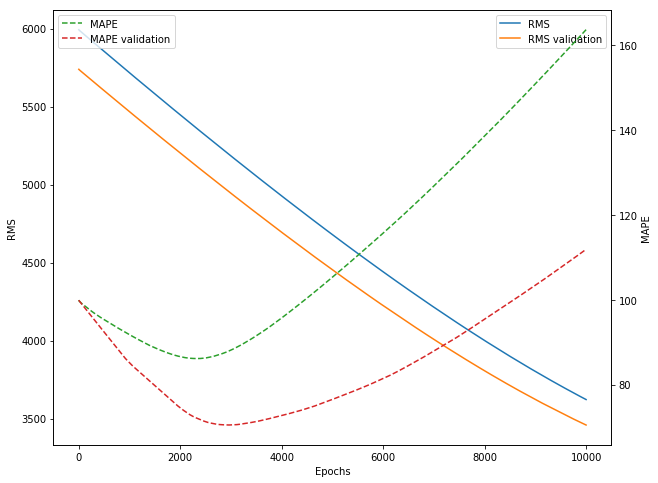

In [37]:
X = circular_database.drop(columns=['8012','8022'])
y = circular_database[['8012','8022']].sum(axis=1)
#create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = Sequential()
hist = History()

# topologia 23-23-10-5-1
model.add(Dense(23, activation='tanh', input_dim = X_train.shape[1]))
model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='linear'))

#sgd = optimizers.SGD(lr=.005, decay=1e-6, momentum=0.8, nesterov=True)
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='mse', 
              metrics=['mse', 'mape'])

model.fit(X_train, y_train, epochs = 10000, validation_split = .1, callbacks = [hist])

y_pred =  model.predict(X_test)
print('\nVariance score:\t%.2f\n' % r2_score(y_test, y_pred))

plt.figure(figsize=(10,8))
ax0 = plt.subplot(111)
ax0.plot(np.sqrt(hist.history['mean_squared_error']))
ax0.plot(np.sqrt(hist.history['val_mean_squared_error']))
plt.xlabel('Epochs')
plt.ylabel('RMS')
plt.legend(['RMS', 'RMS validation'])
ax1 = ax0.twinx()
ax1.plot(hist.history['mean_absolute_percentage_error'], '--C2')
ax1.plot(hist.history['val_mean_absolute_percentage_error'], '--C3')
plt.ylabel('MAPE')
plt.legend(['MAPE', 'MAPE validation'])